# Chapter 4: Balls in 2D Box: a Simplest Physics Engine

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Writing helper functions

In [3]:
def render_1(pos = POSITION, vel = VELOCITY, save= False, index = None):
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))
        plt.xlim(0,WIDTH)
        plt.ylim(0,HEIGHT)
        ball_1 = plt.Circle(pos, RADIUS, color='r')
        ax.add_patch(ball_1)
        ax.arrow(*pos, 
                 *vel, 
                 head_width=ARROW_HEAD_WIDTH, 
                 head_length=ARROW_HEAD_LENGTH, 
                 fc='k', ec='k')
        if save:
            plt.savefig("{}.png".format(index))
        plt.show()

def update_1(pos=POSITION, vel = VELOCITY, acc = None, delta_t = DELTA_T):
    # Note that all values are mutable so the update is in place
    for i in range(len(pos)):
        pos[i] += vel[i] * delta_t
    if acc:
        for i in range(len(pos)):
            vel[i] += acc[i] * delta_t

#### Testing helper function

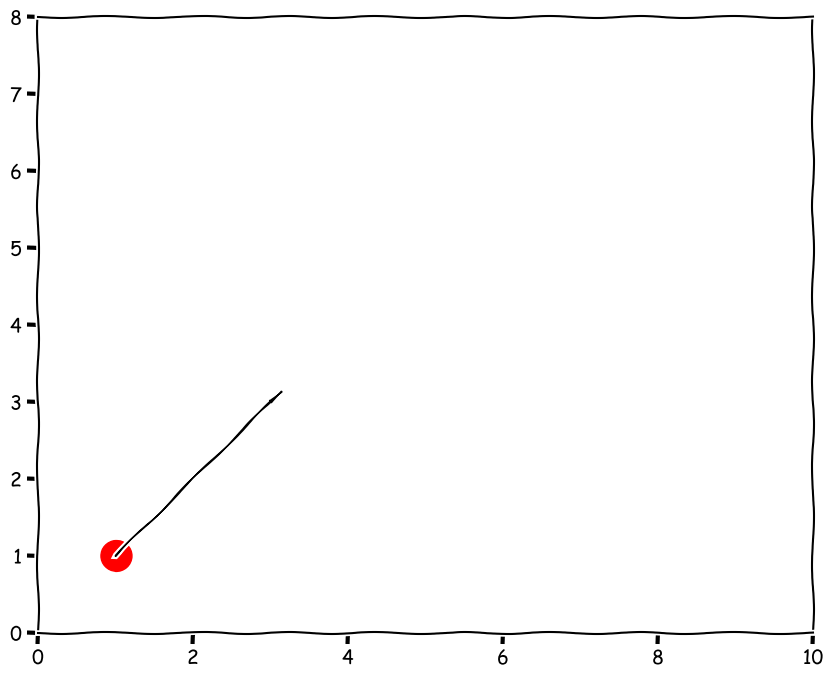

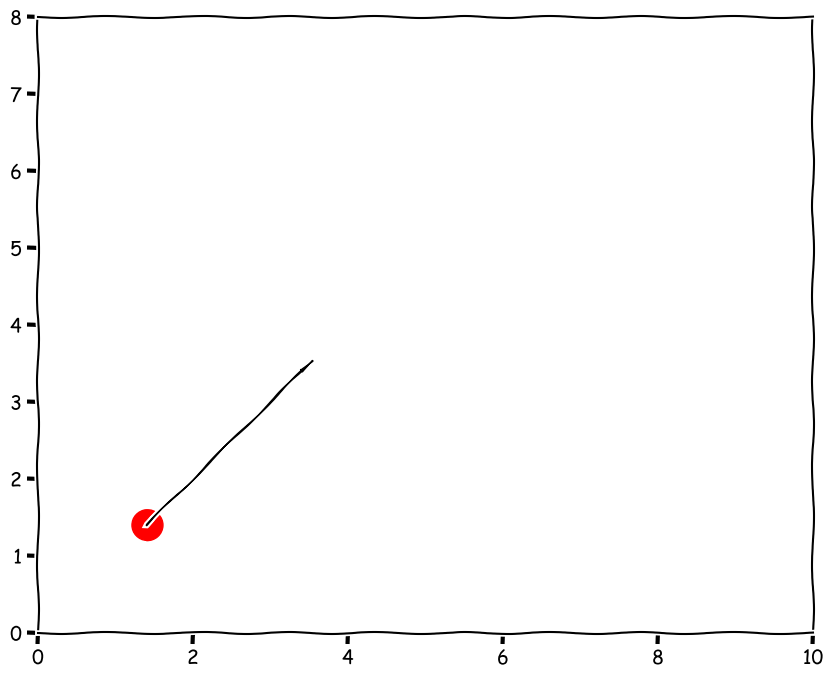

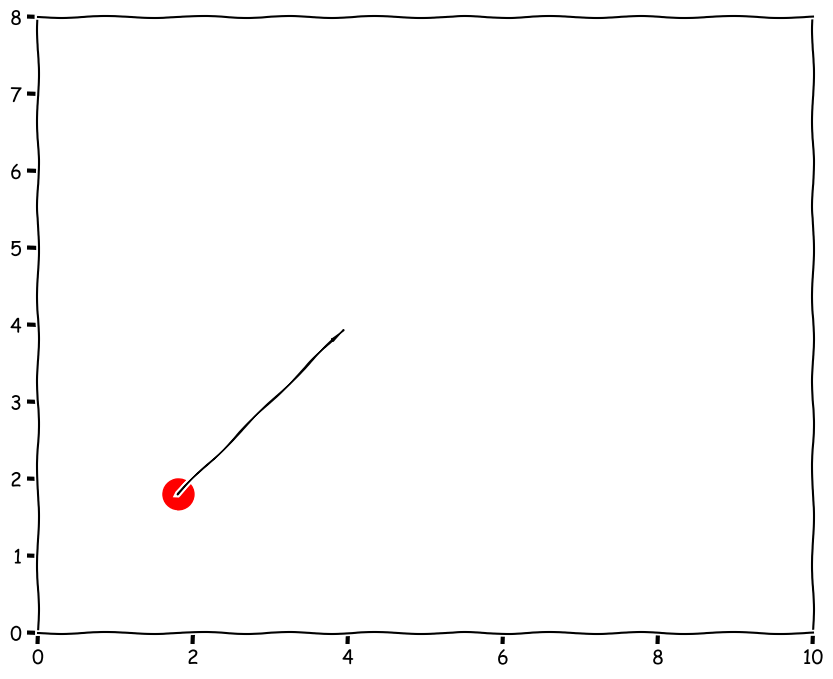

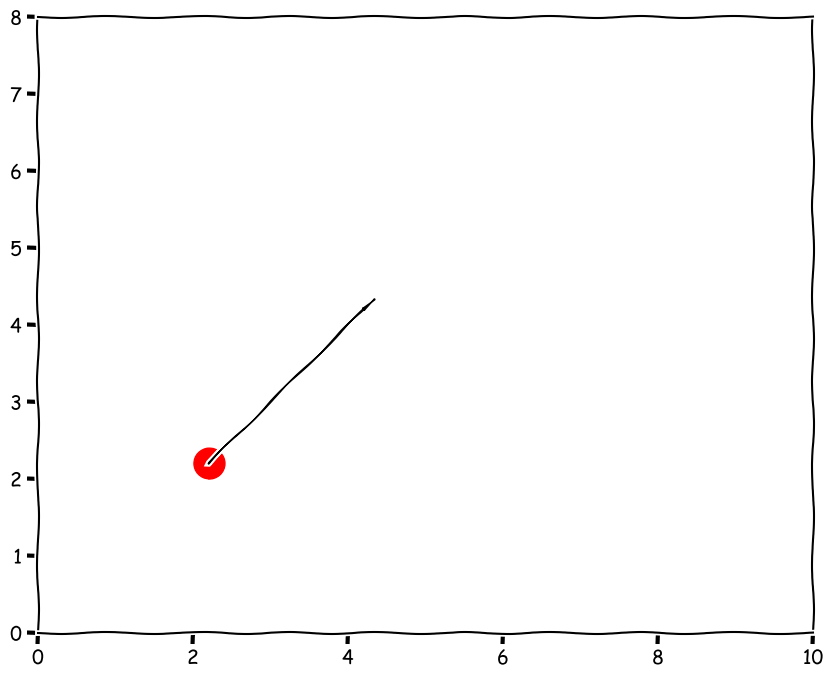

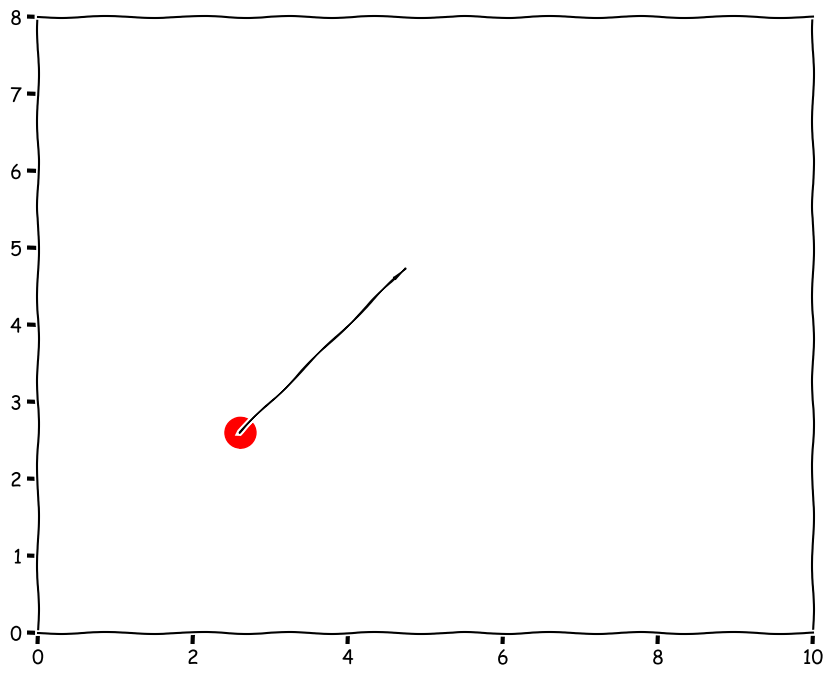

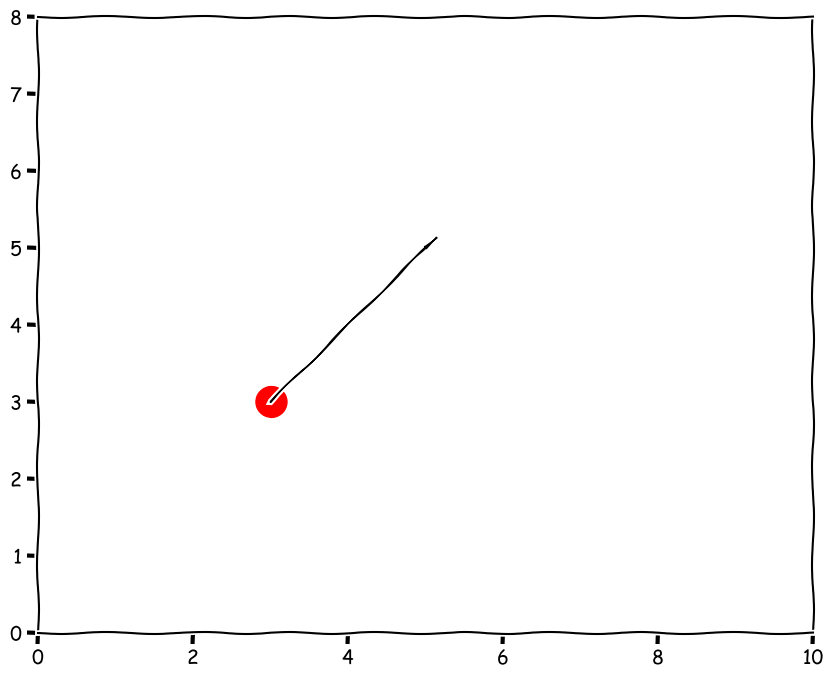

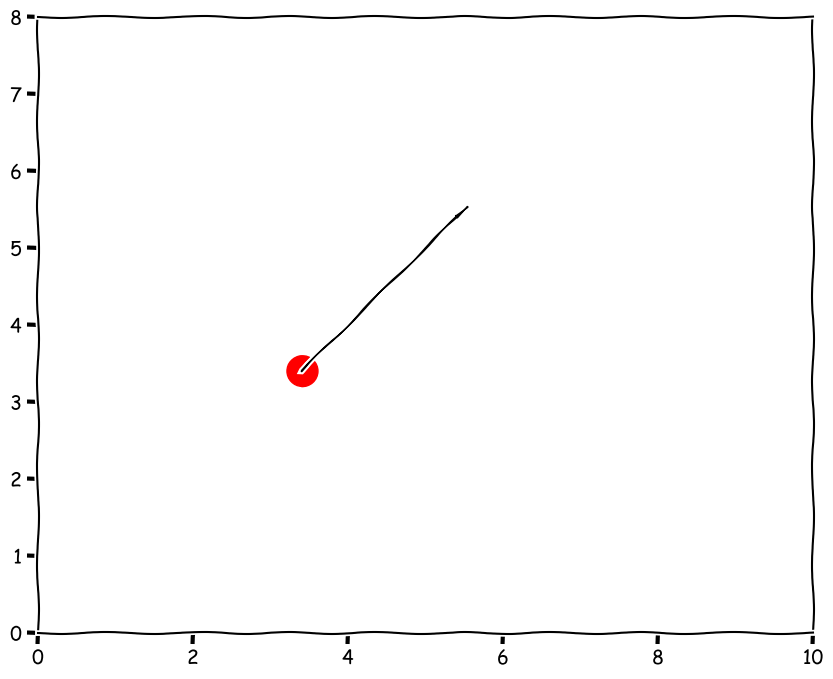

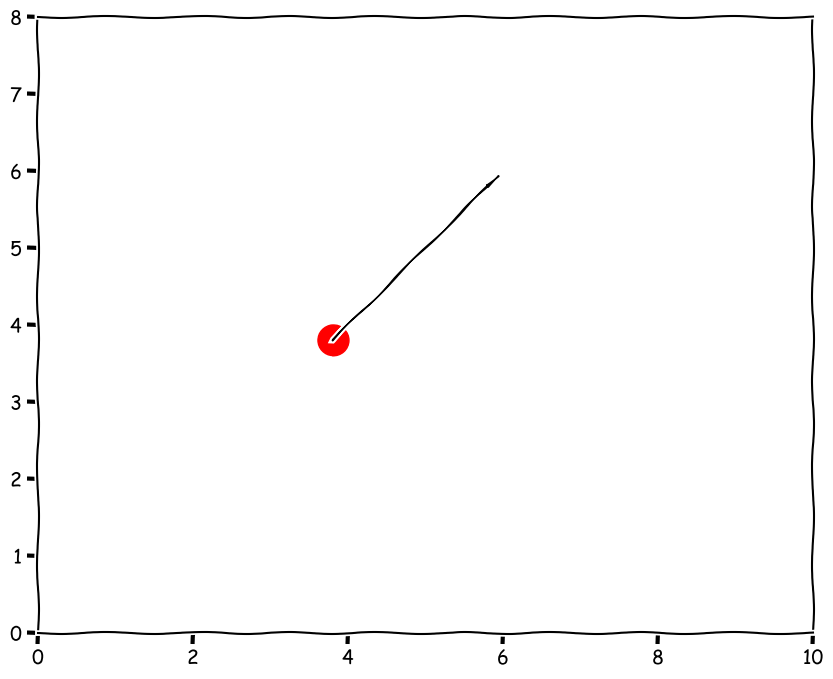

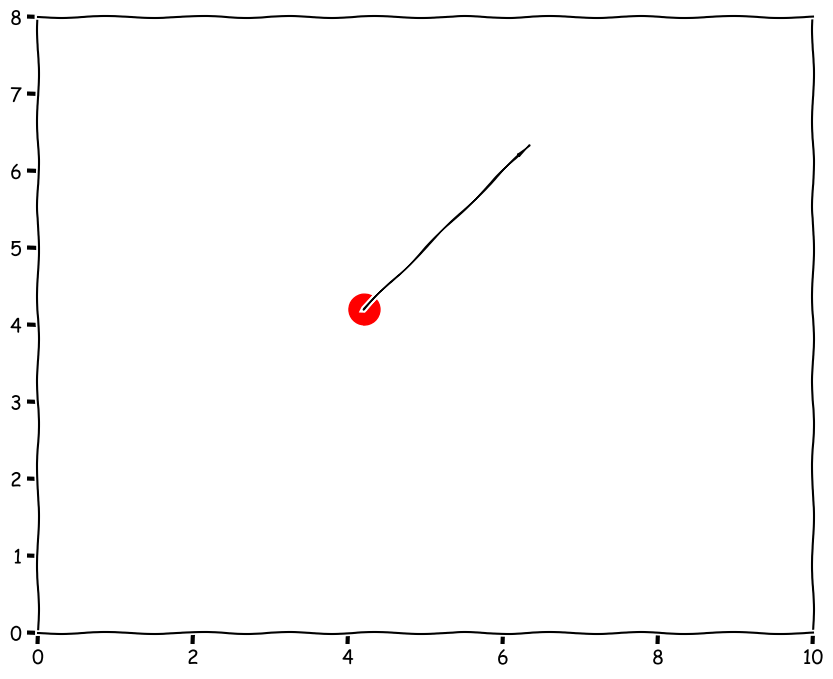

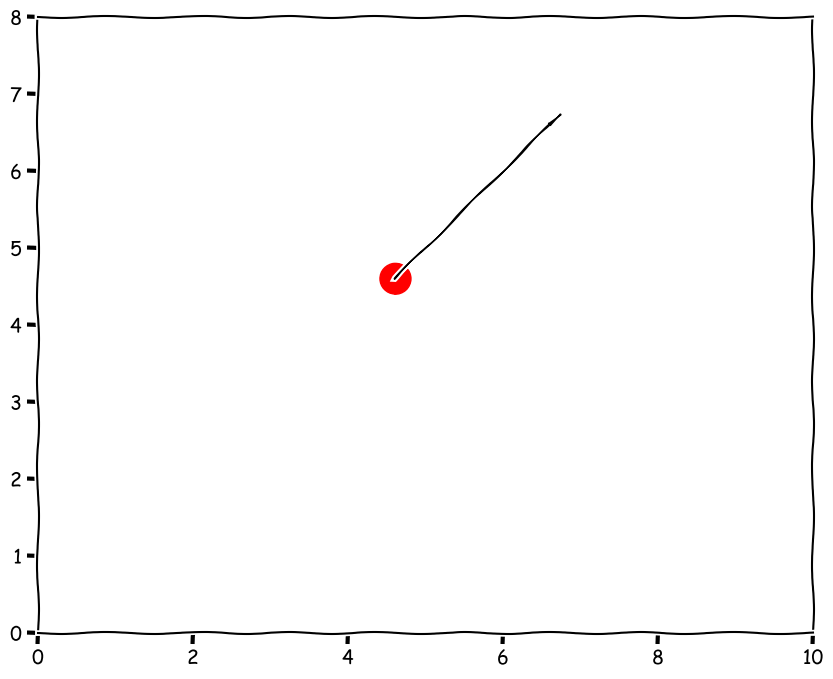

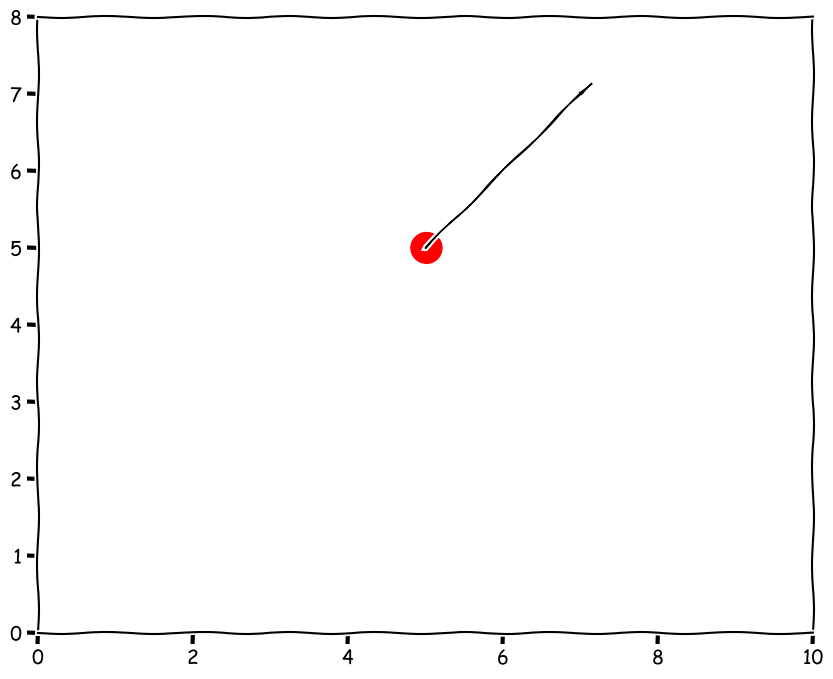

In [5]:
RADIUS = 0.2
POSITION = [1,1]
VELOCITY = [2,2]
WIDTH, HEIGHT = 10, 8
ARROW_HEAD_WIDTH, ARROW_HEAD_LENGTH = 0.05, 0.2
DELTA_T = 0.2
render_1(pos=POSITION, vel = VELOCITY)
for _ in range(10):
    update_1(pos=POSITION, vel = VELOCITY,delta_t = DELTA_T)
    render_1(pos=POSITION, vel = VELOCITY)

### Testing vertical downward acceleration

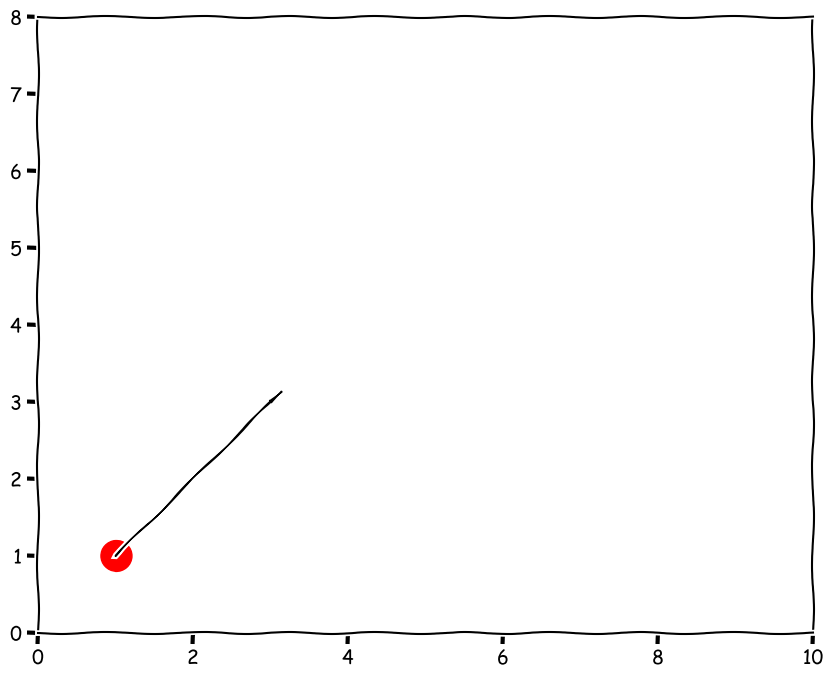

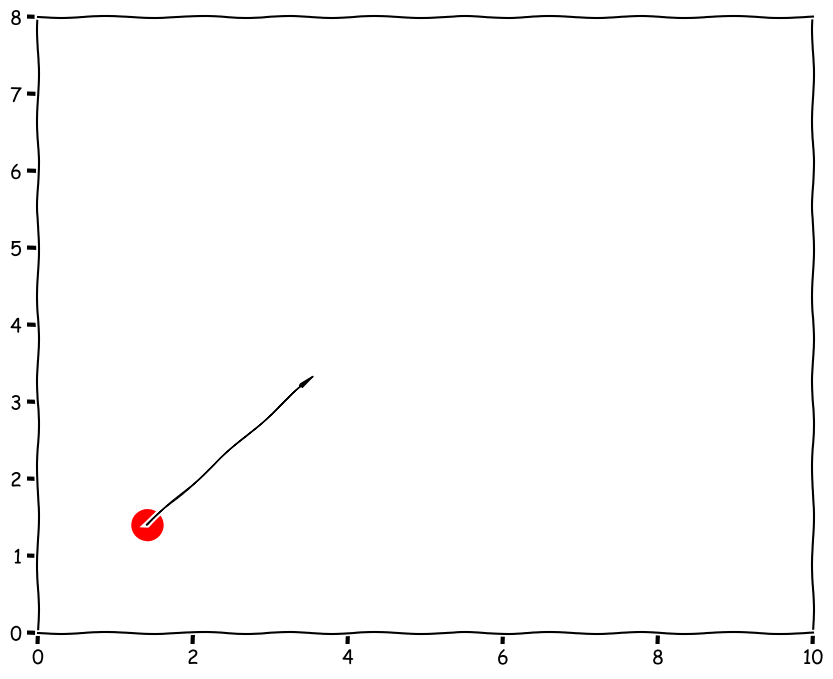

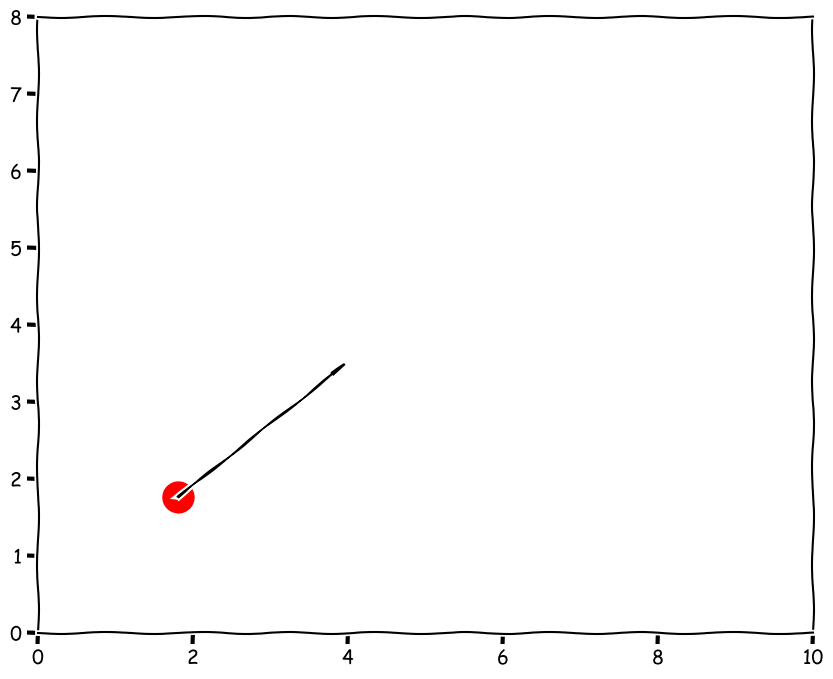

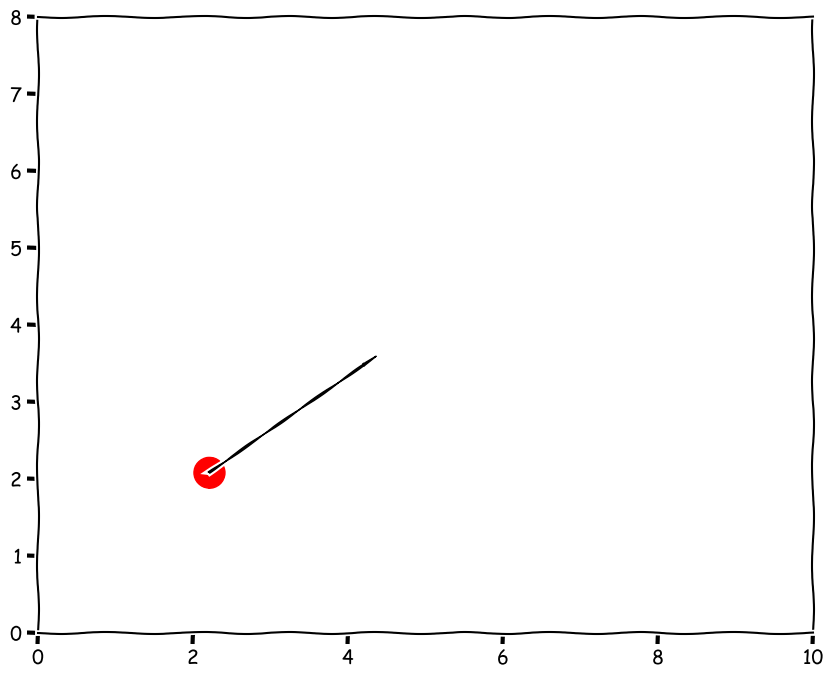

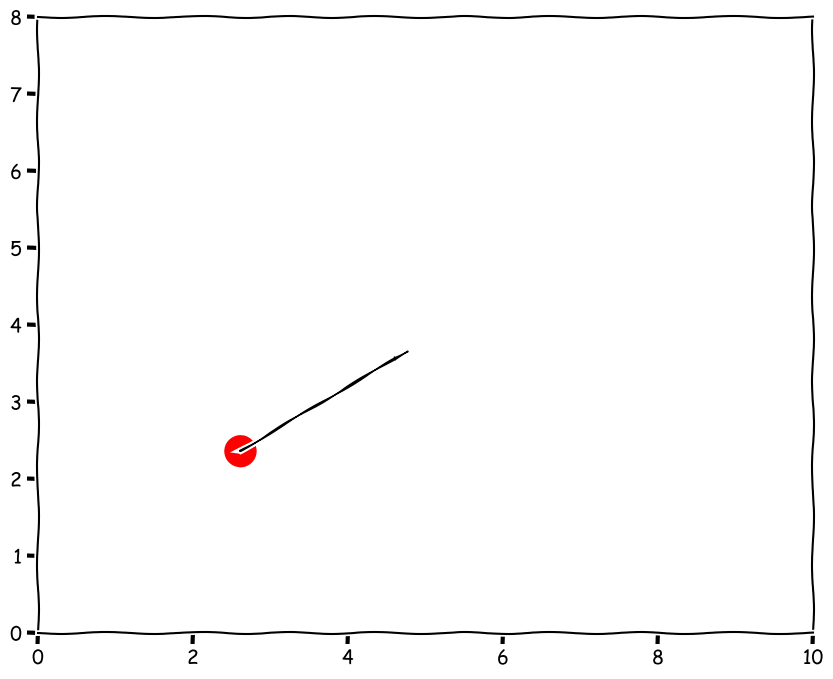

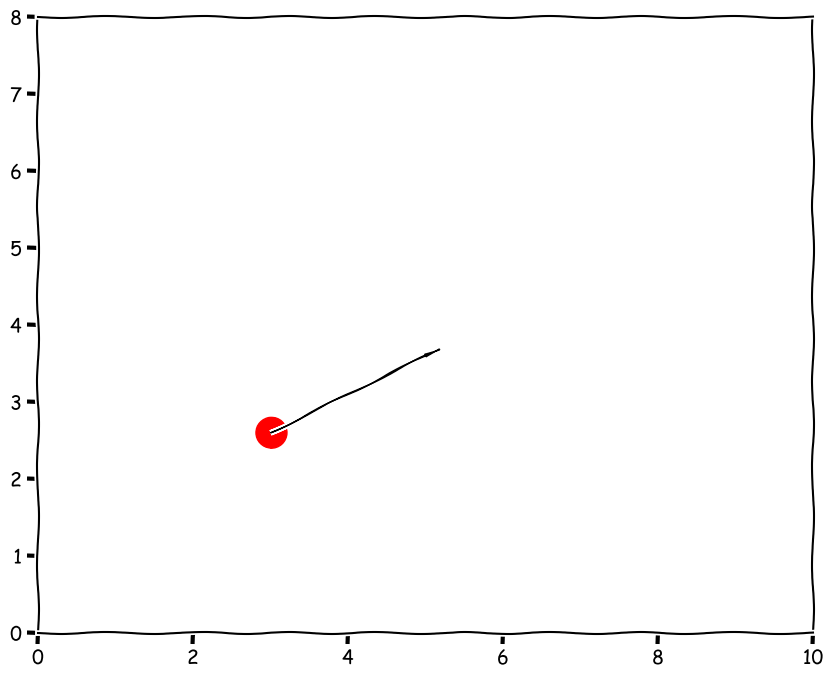

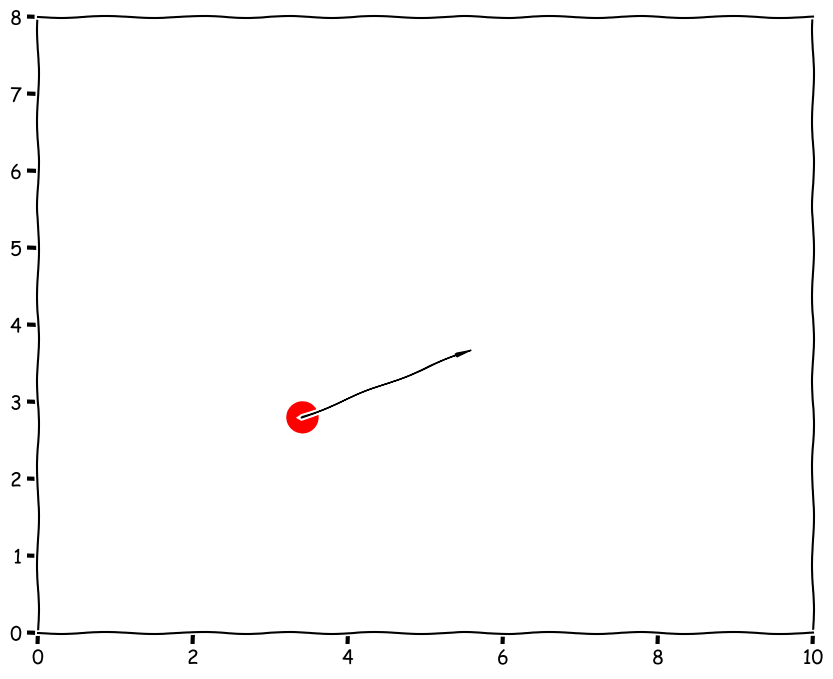

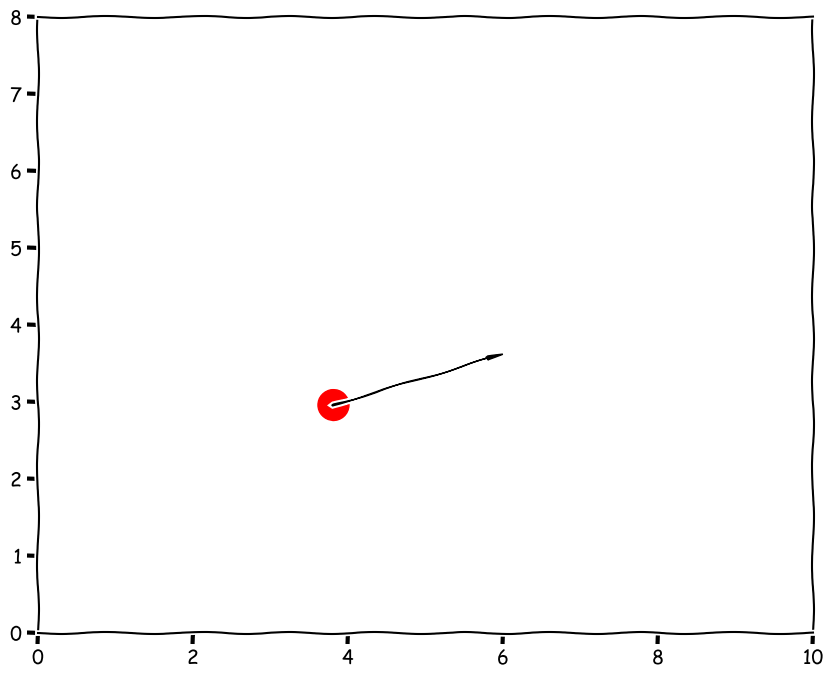

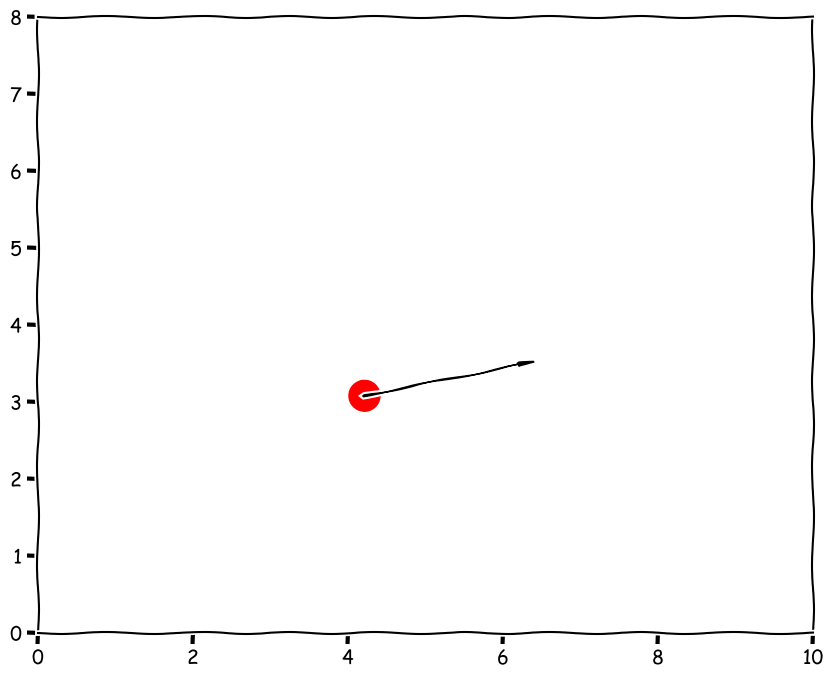

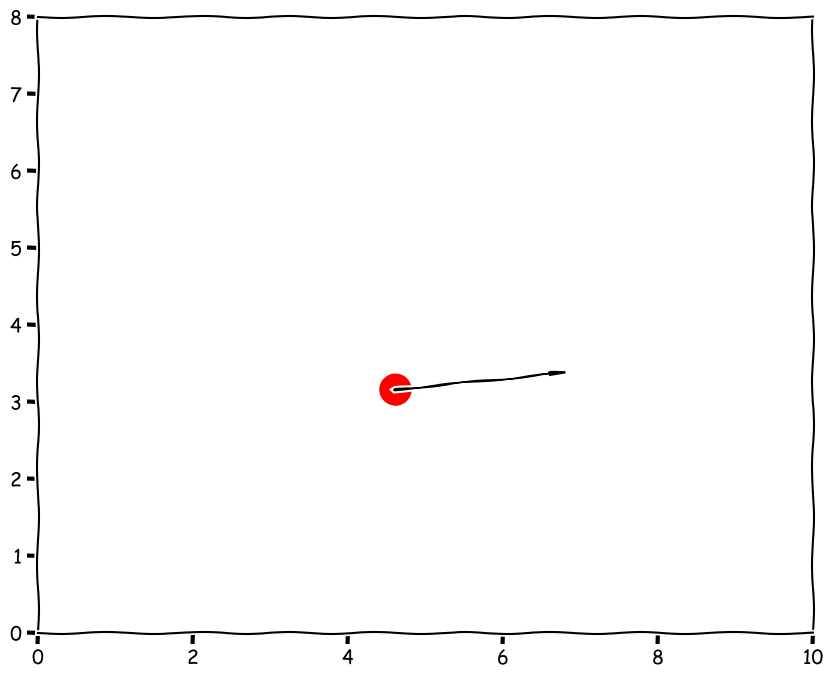

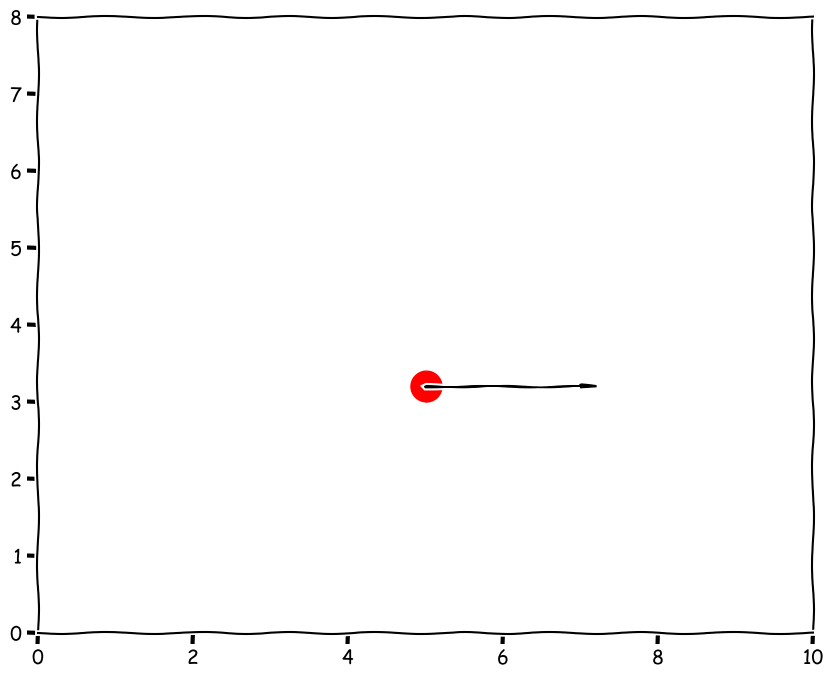

In [6]:
RADIUS = 0.2
POSITION = [1,1]
VELOCITY = [2,2]
ACCELERATION = [0,-1]
WIDTH, HEIGHT = 10, 8
ARROW_HEAD_WIDTH, ARROW_HEAD_LENGTH = 0.05, 0.2
DELTA_T = 0.2

render_1(pos=POSITION, vel = VELOCITY)
for _ in range(10):
    update_1(pos=POSITION, vel = VELOCITY, acc = ACCELERATION, delta_t = DELTA_T)
    render_1(pos=POSITION, vel = VELOCITY)

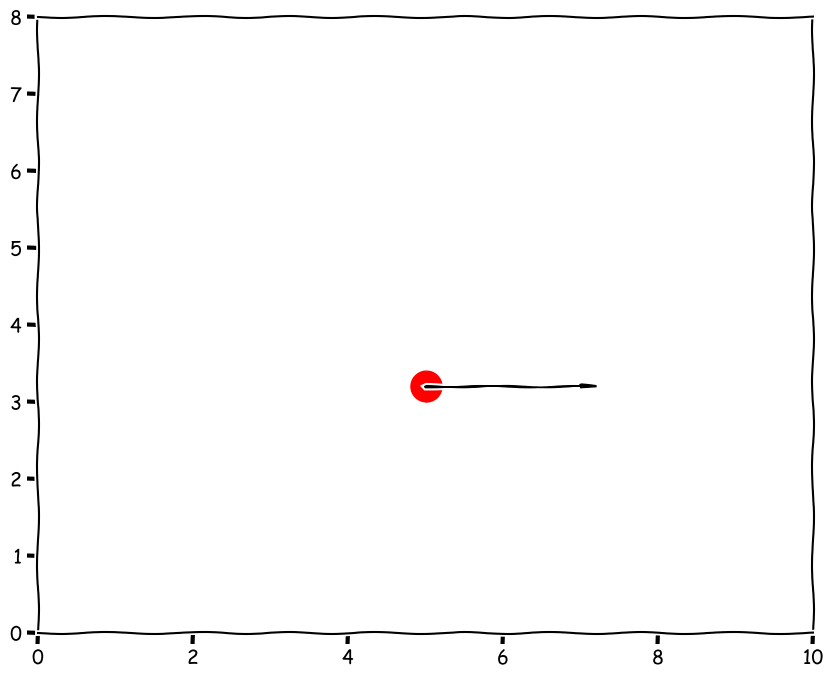

In [7]:
# In-book image, one ball in 2d box
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))
    plt.xlim(0,WIDTH)
    plt.ylim(0,HEIGHT)
    ball_1 = plt.Circle(POSITION, RADIUS, color='r')
    ax.add_patch(ball_1)
    ax.arrow(*POSITION, 
             *VELOCITY, 
             head_width=ARROW_HEAD_WIDTH, 
             head_length=ARROW_HEAD_LENGTH, 
             fc='k', ec='k')
    plt.plot()
    fig.savefig("one_ball_in_2d_box.jpg")

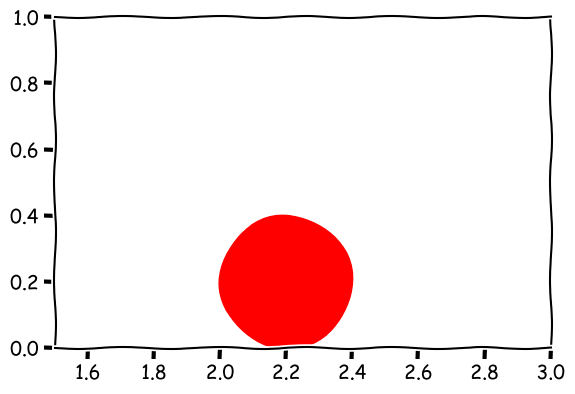

In [8]:
# In-book image: collision Illustration
with plt.xkcd():
    fig, ax = plt.subplots()
    plt.axis('scaled')
    plt.xlim(1.5,3)
    plt.ylim(0,1)
    ball_1 = plt.Circle([2.2,0.2], RADIUS, color='r')
    ax.add_patch(ball_1)

### Collision detection between wall and ball

In [9]:
def detect_collision_wall(pos = POSITION, vel = VELOCITY, radius = RADIUS, height = HEIGHT, width = WIDTH):
    # left wall
    if abs(pos[0]-0) < radius and vel[0] < 0:
        vel[0] = - vel[0]
        return
    # right wall
    if abs(width-pos[0])< radius and vel[0] > 0:
        vel[0] = -vel[0]
        return
    # upper wall 
    if abs(height-pos[1]) < radius and vel[1] > 0:
        vel[1] = -vel[1]
        return
    # lower wall
    if abs(pos[1]-0) < radius and vel[1] < 0:
        vel[1] = -vel[1]
        return

### Import `imageio` for gif creation

In [14]:
import imageio.v2 as imageio

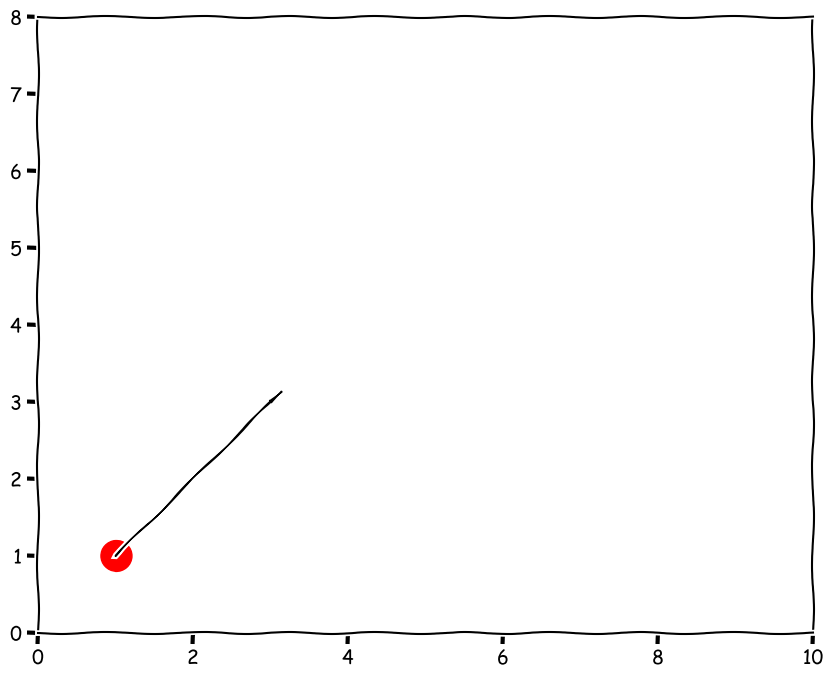

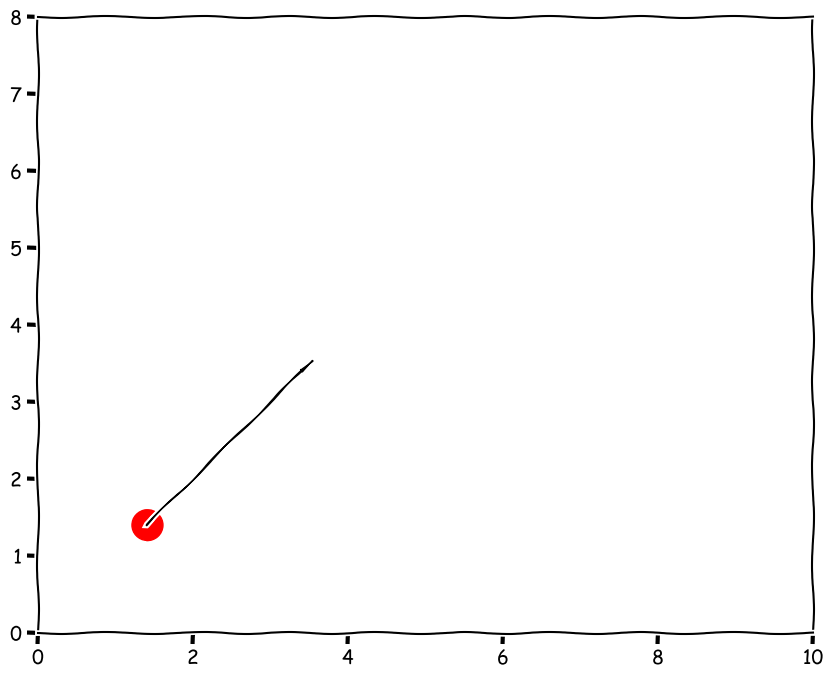

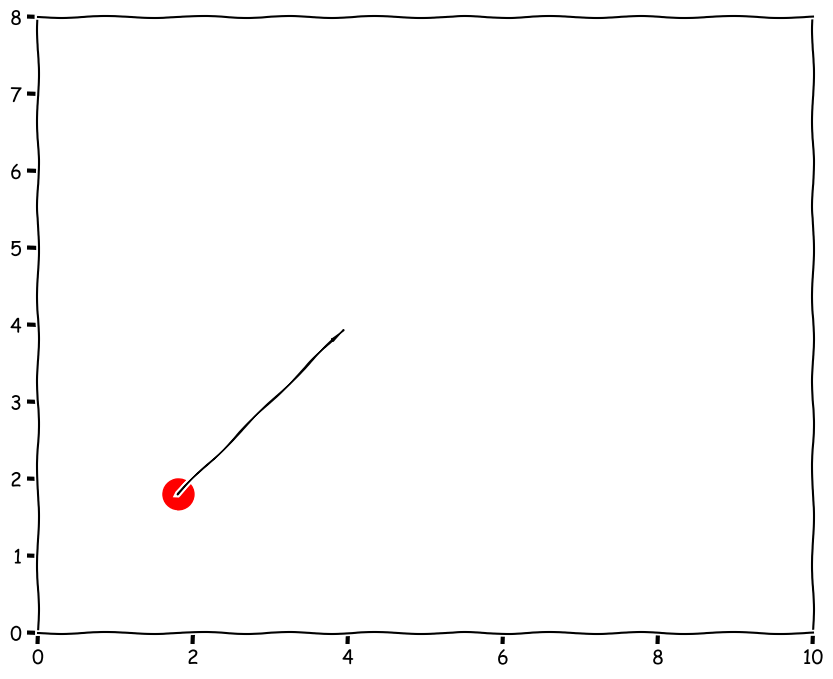

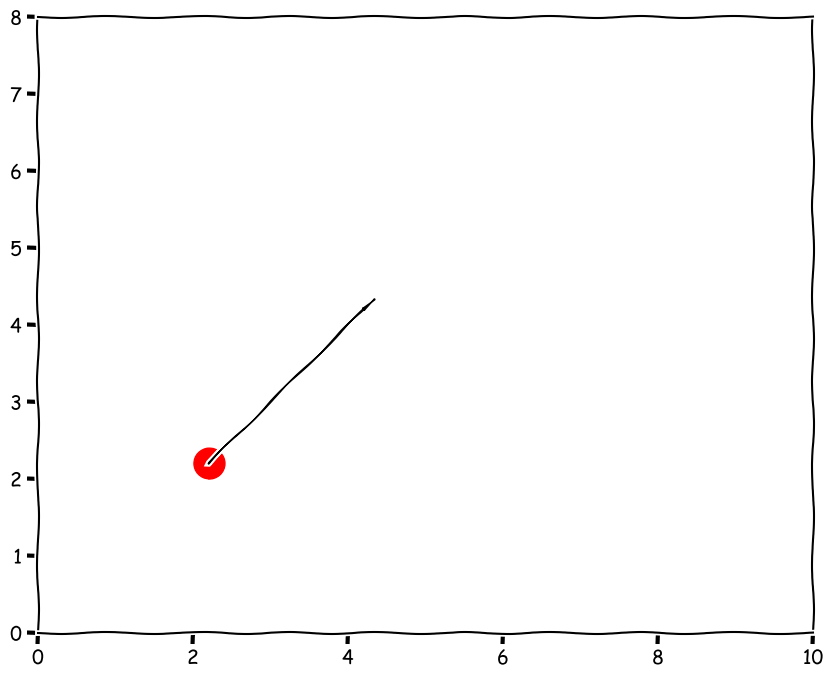

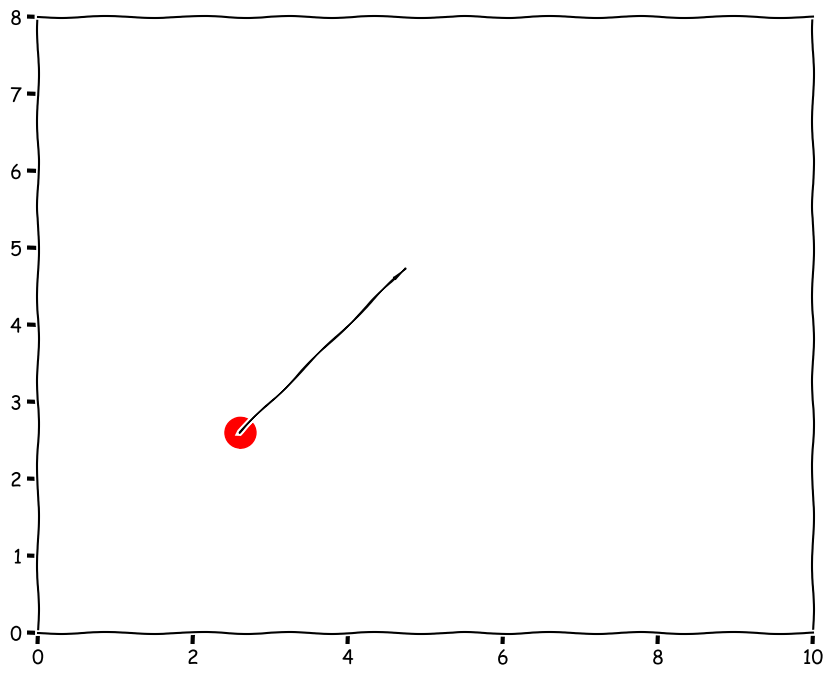

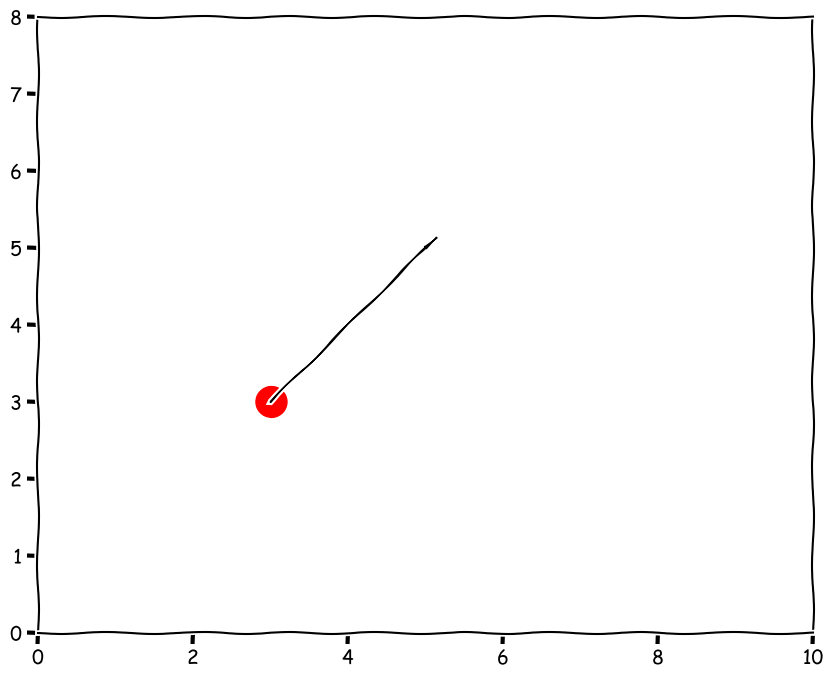

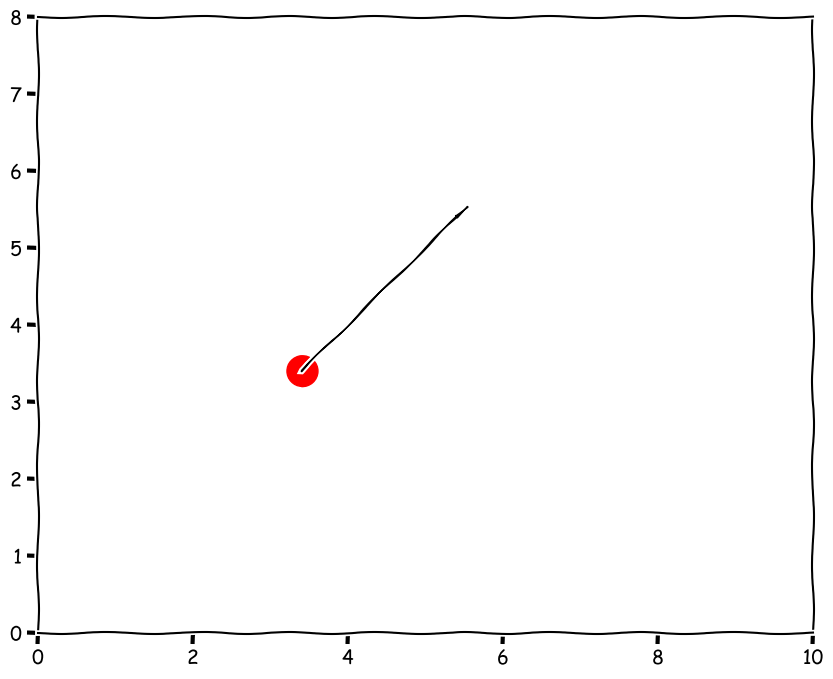

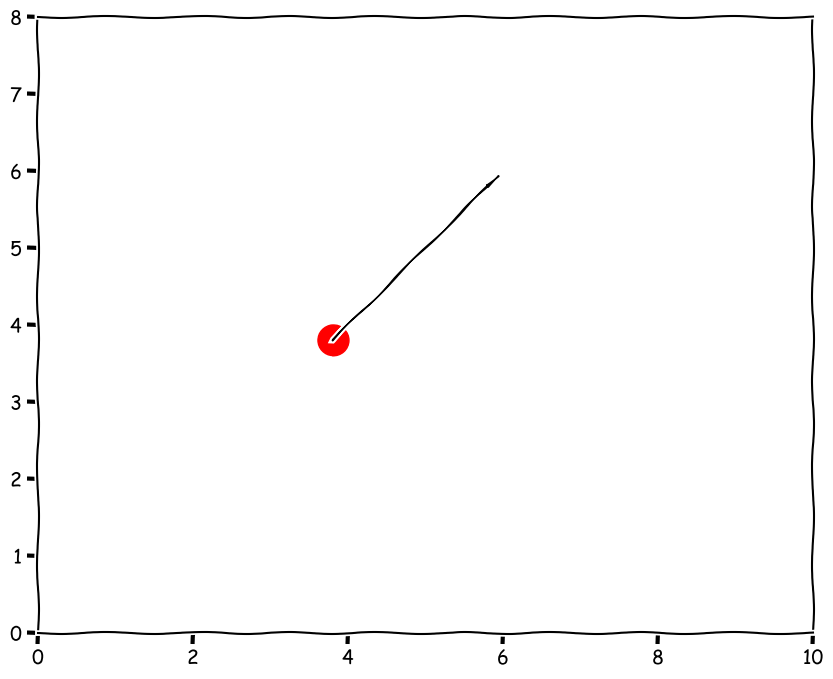

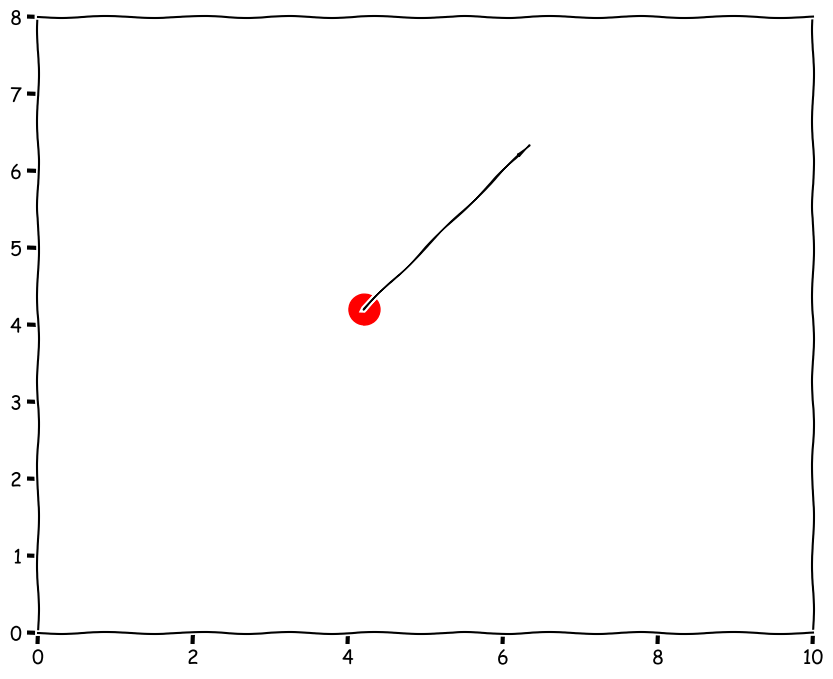

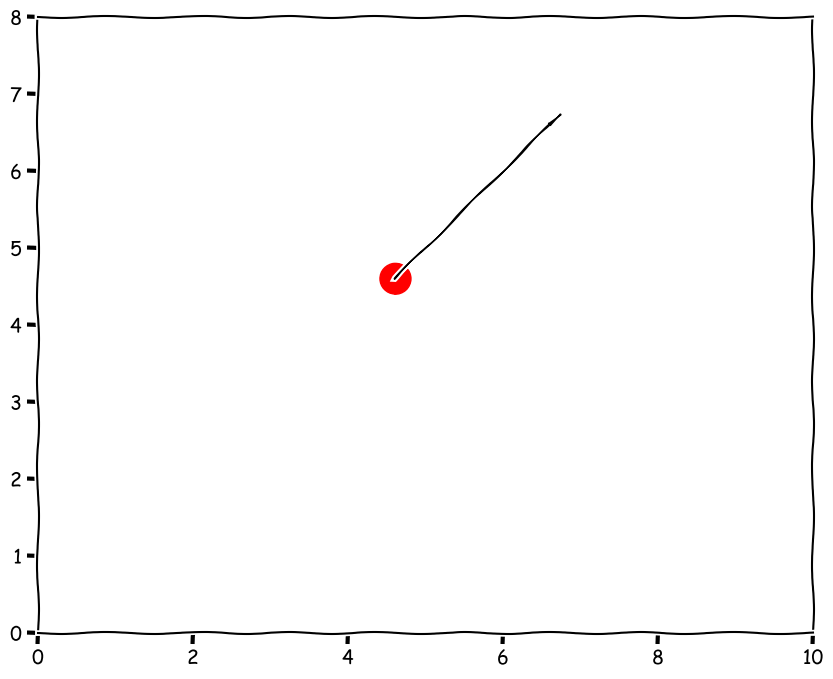

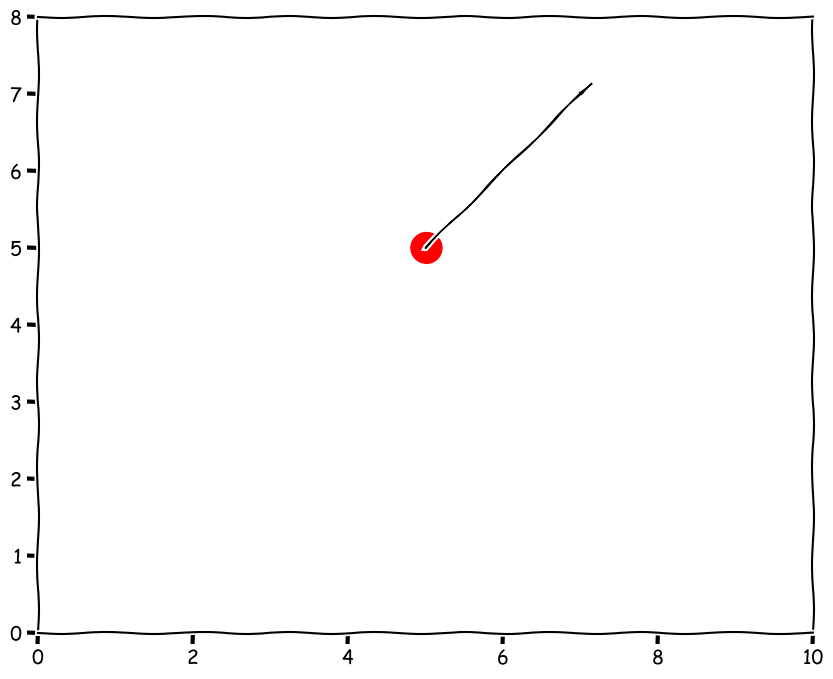

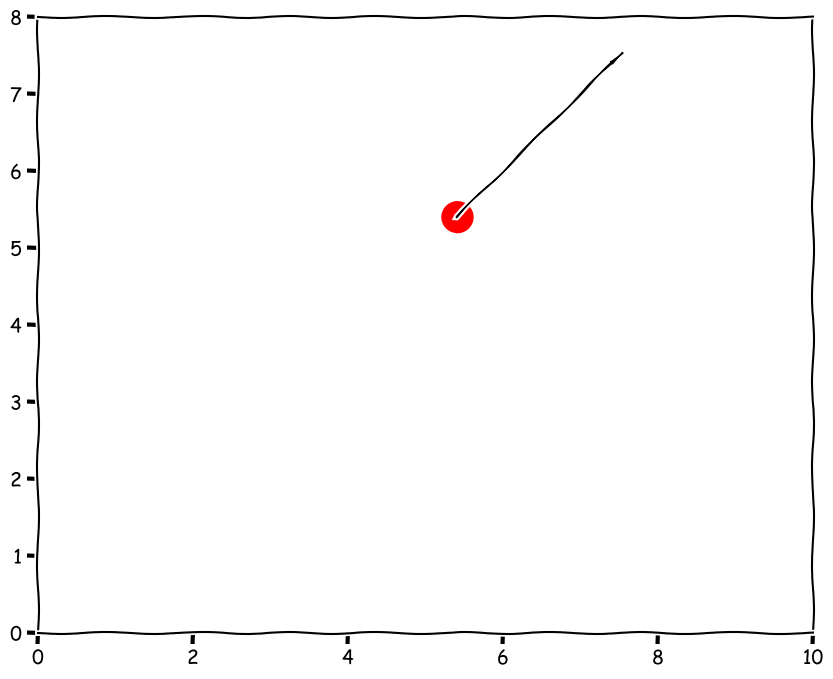

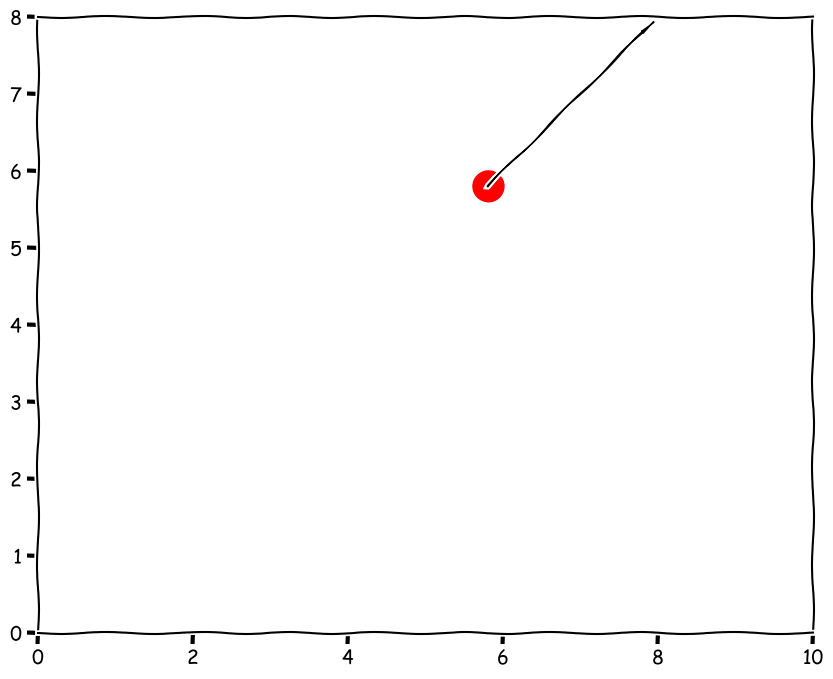

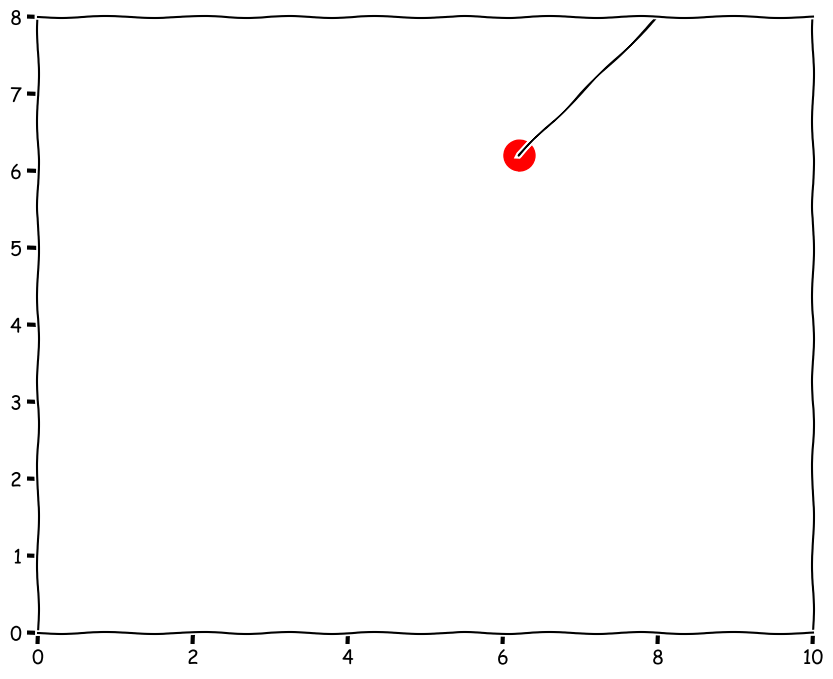

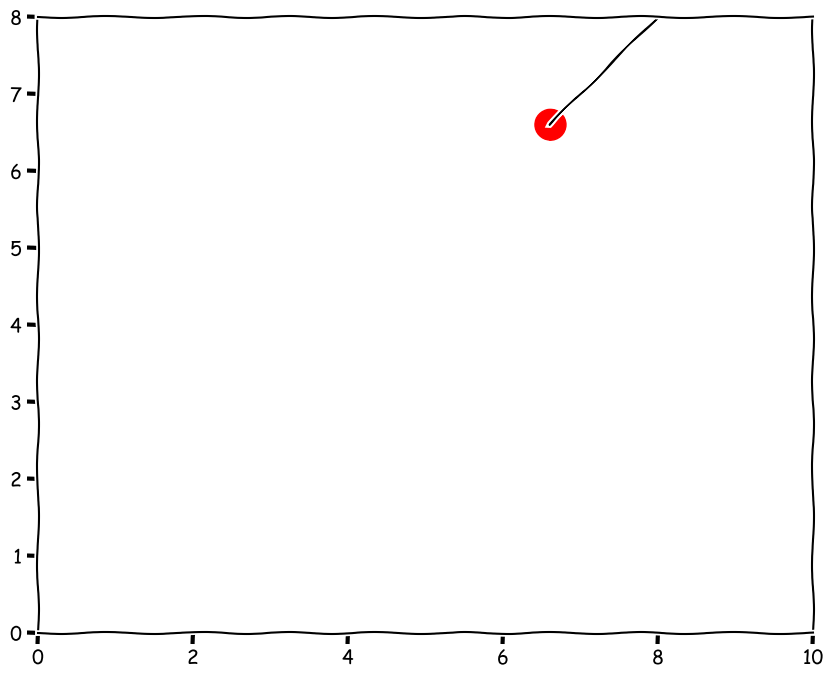

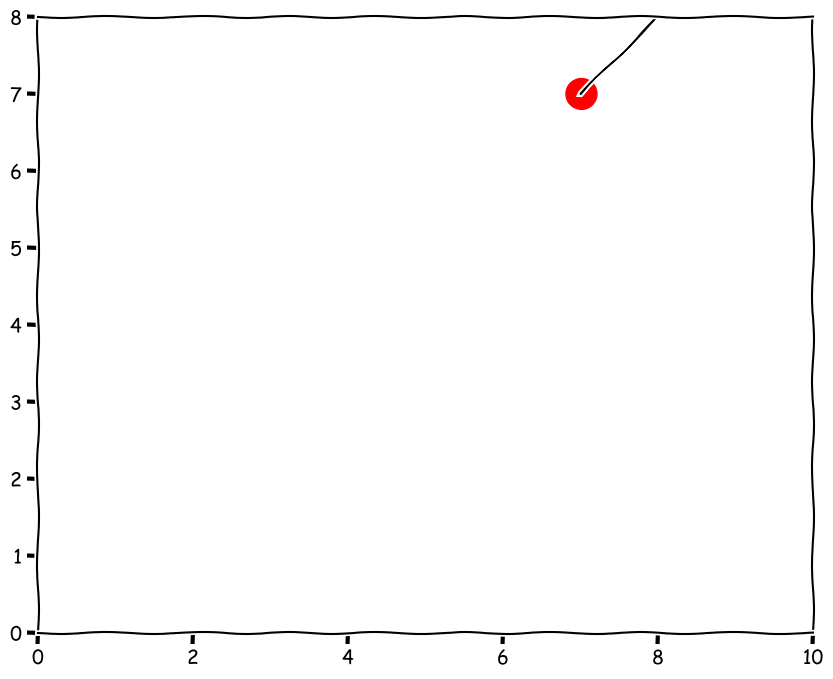

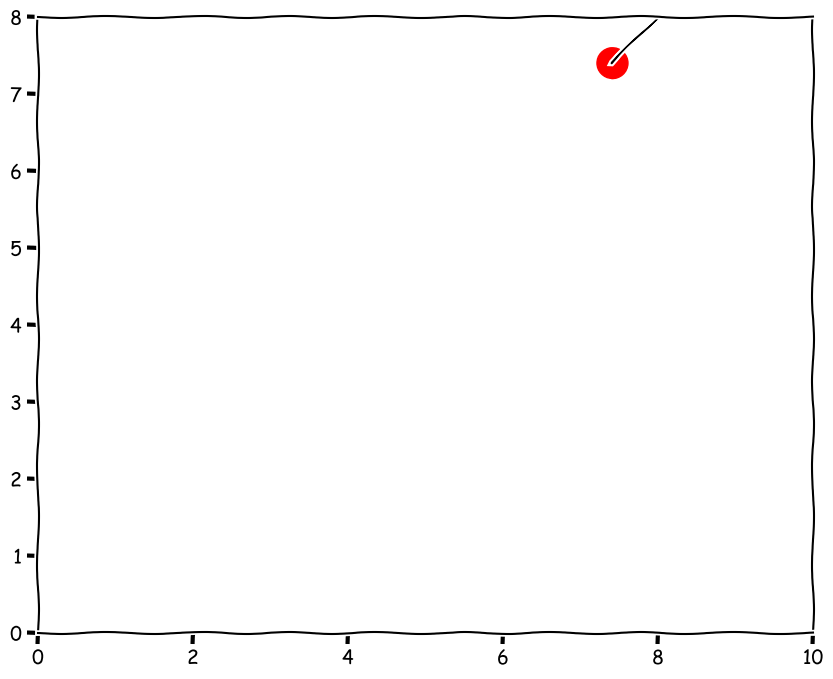

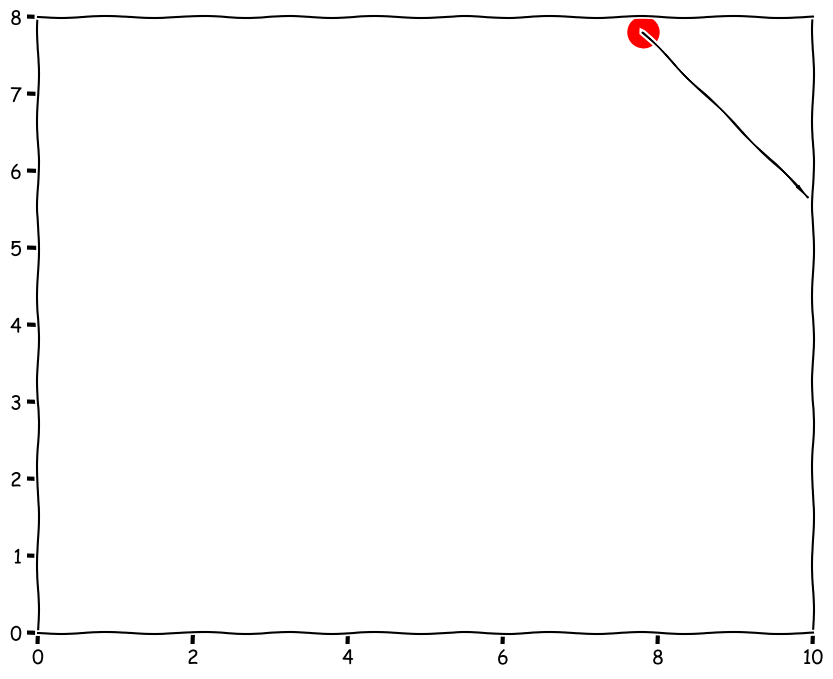

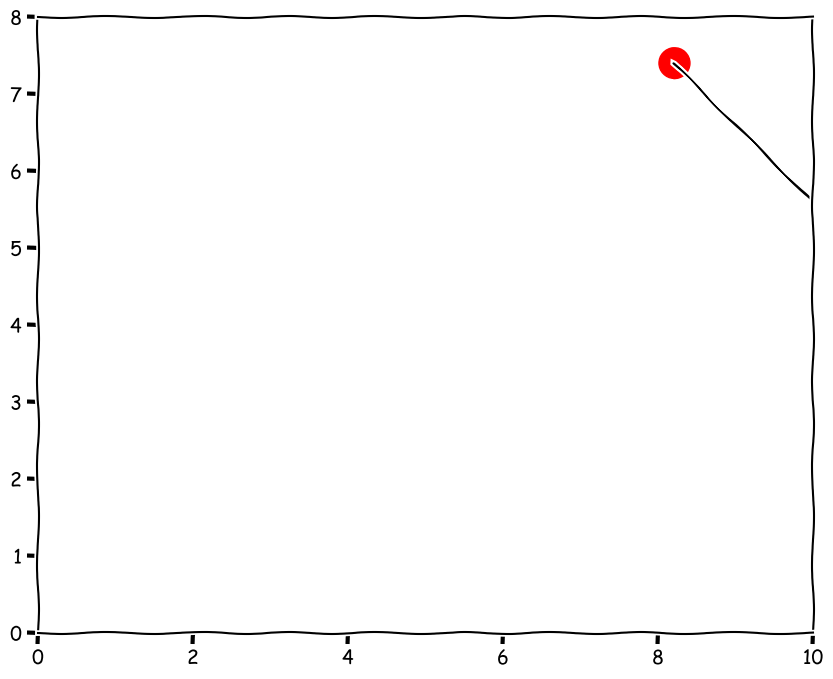

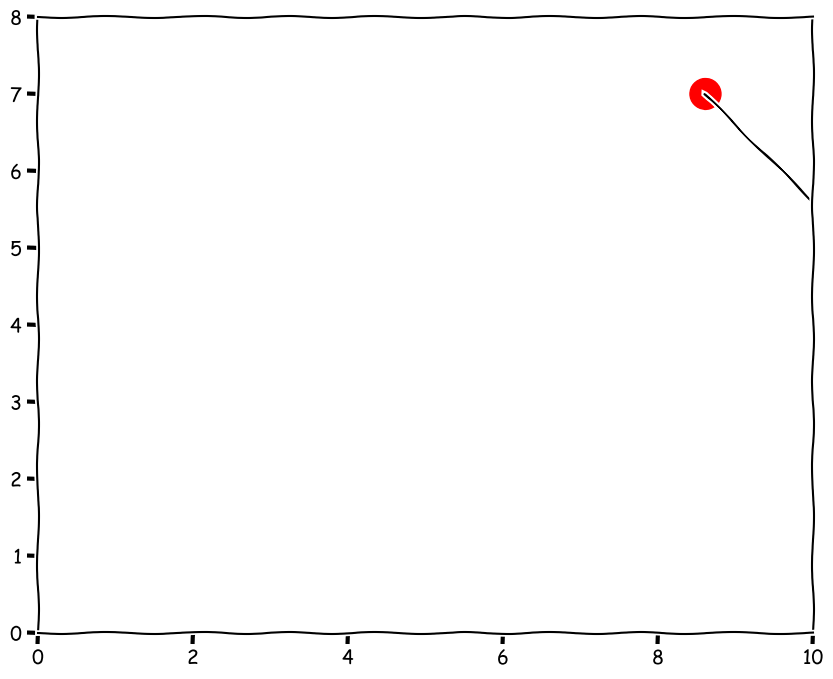

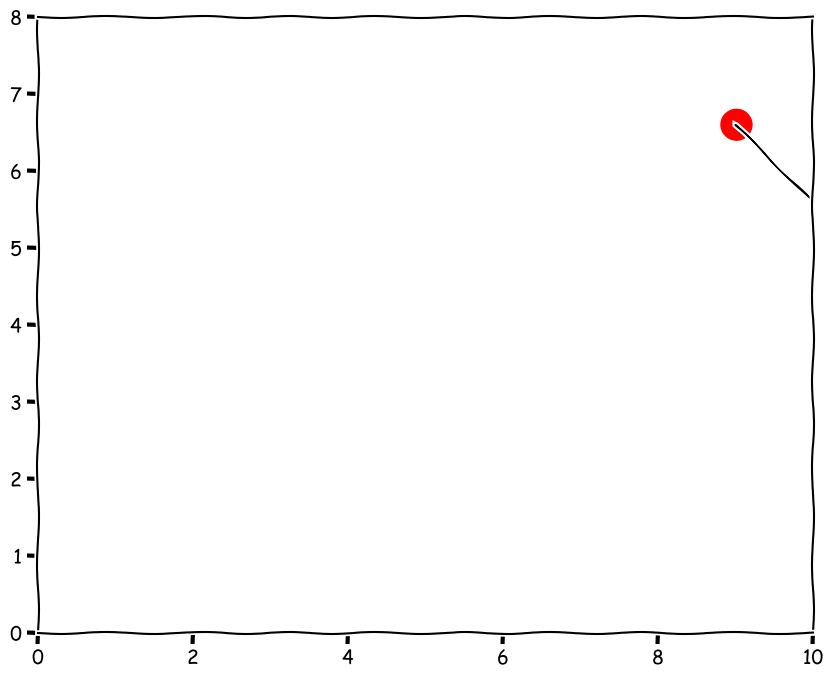

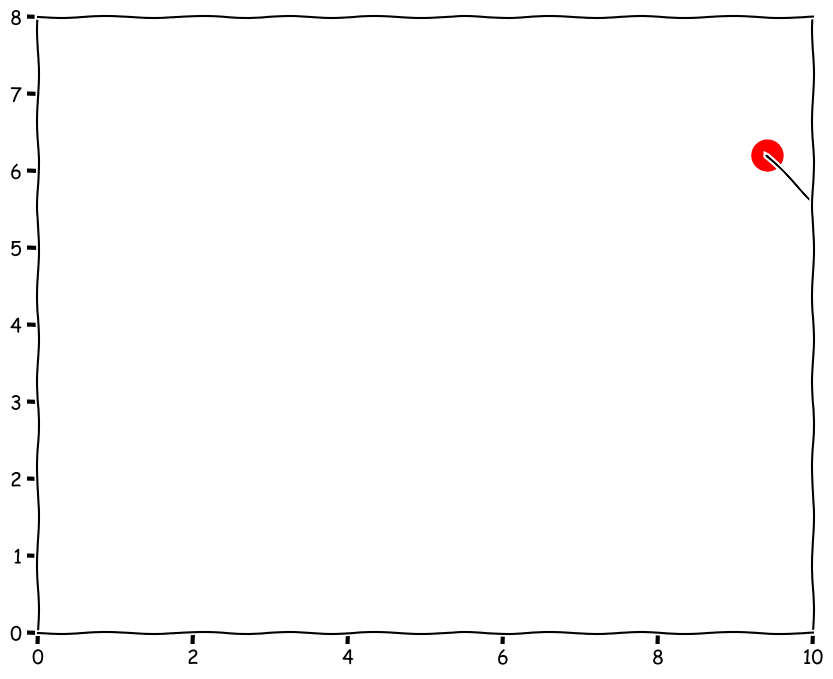

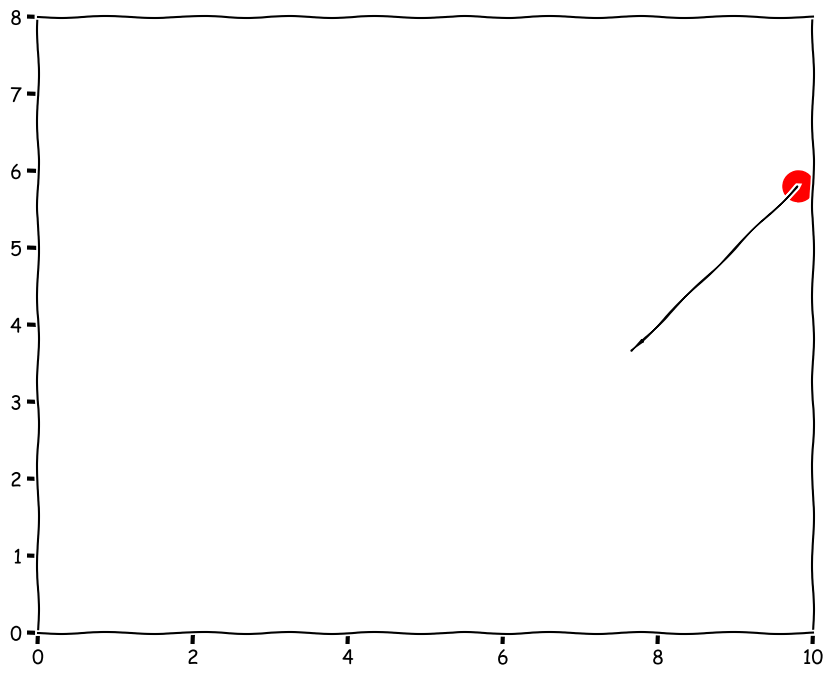

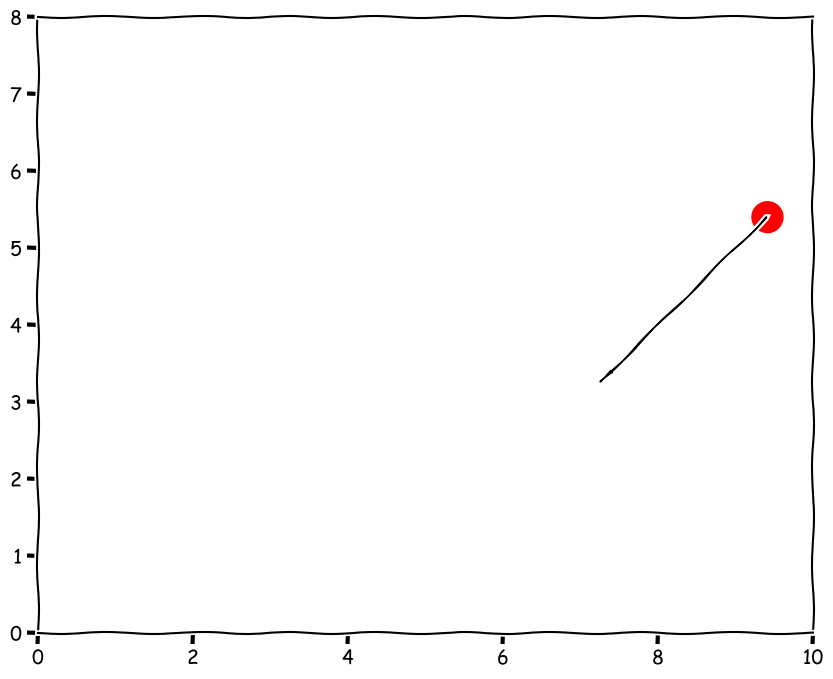

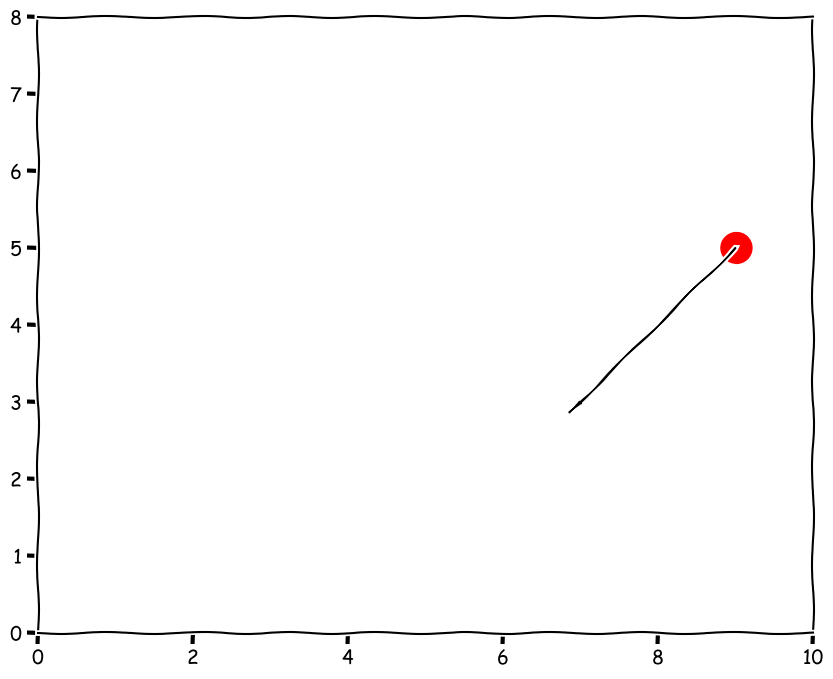

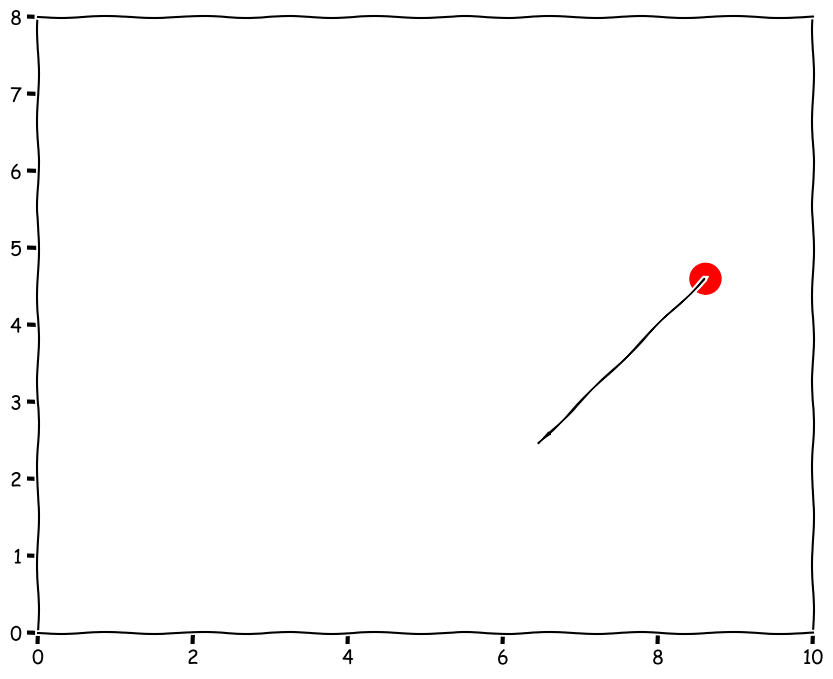

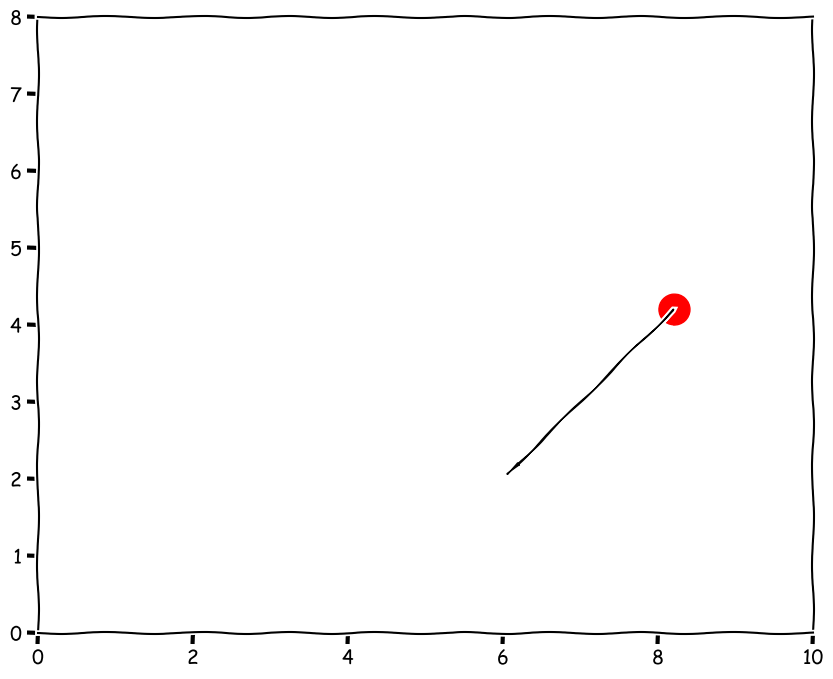

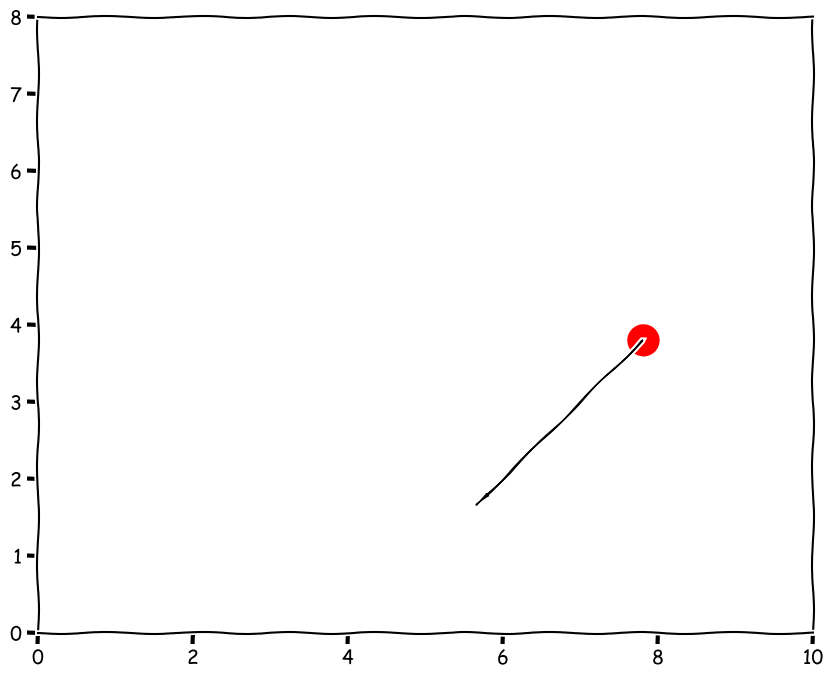

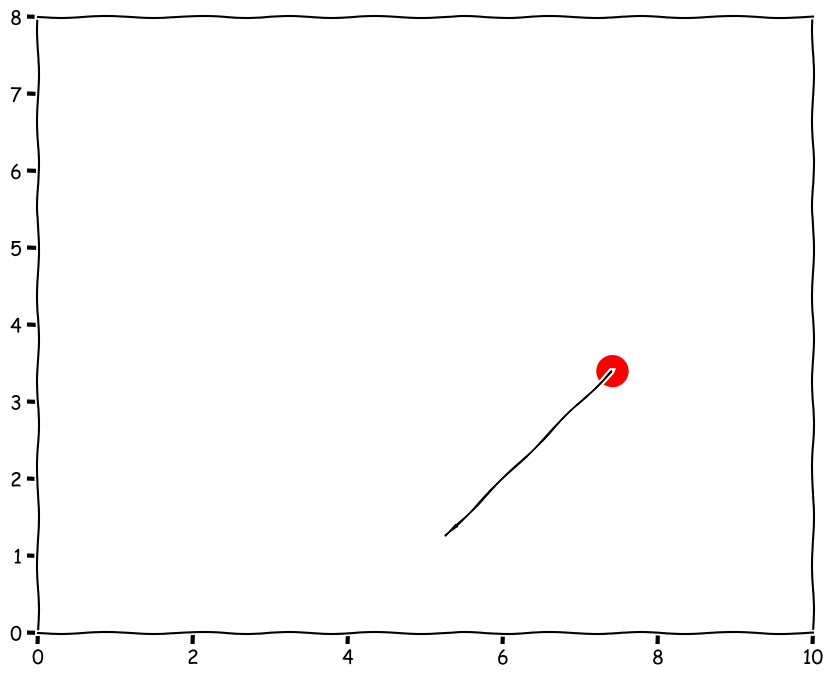

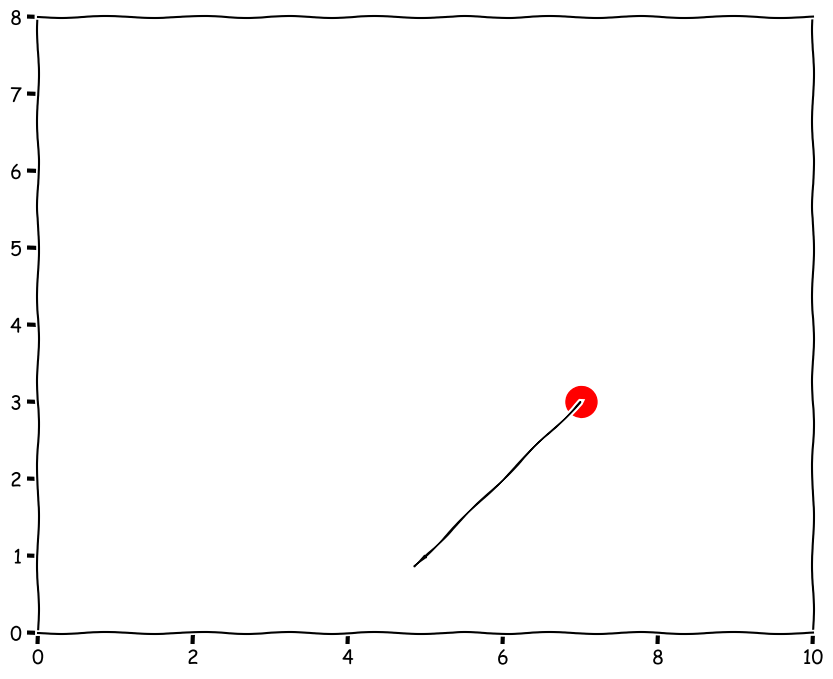

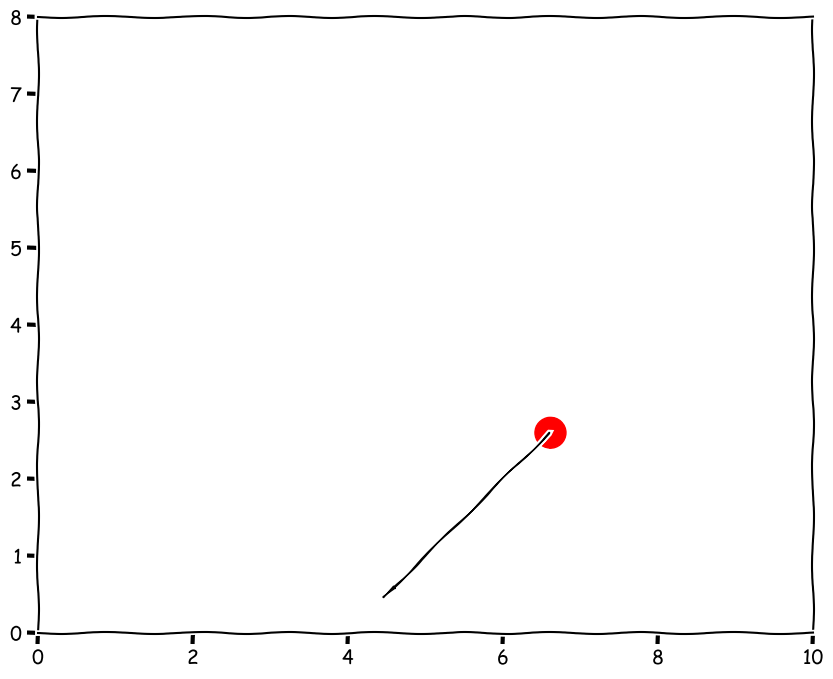

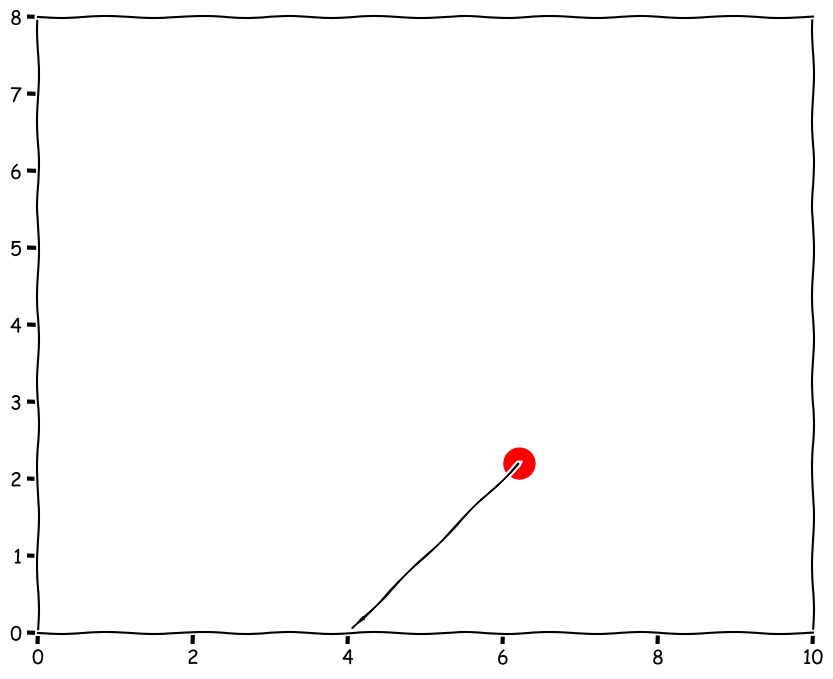

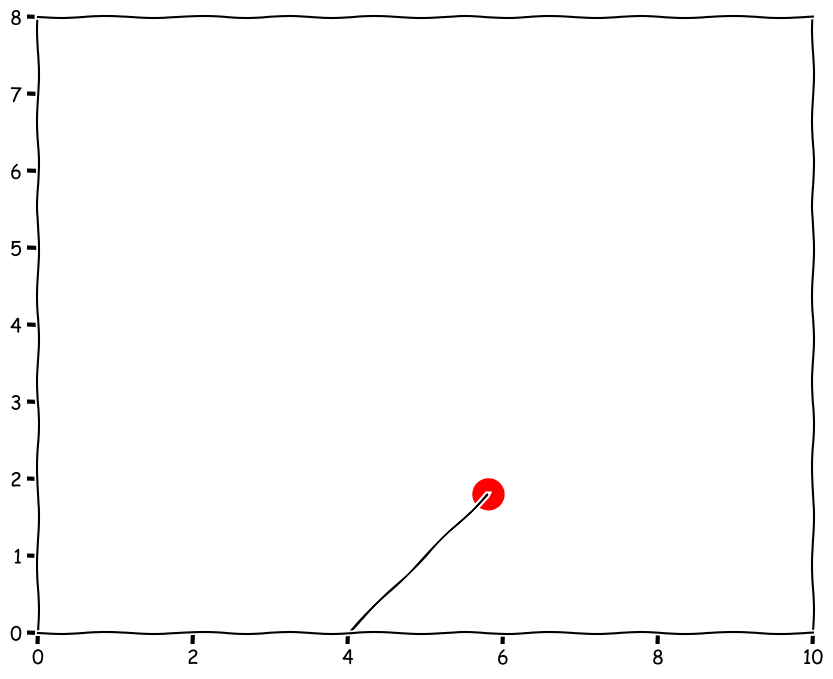

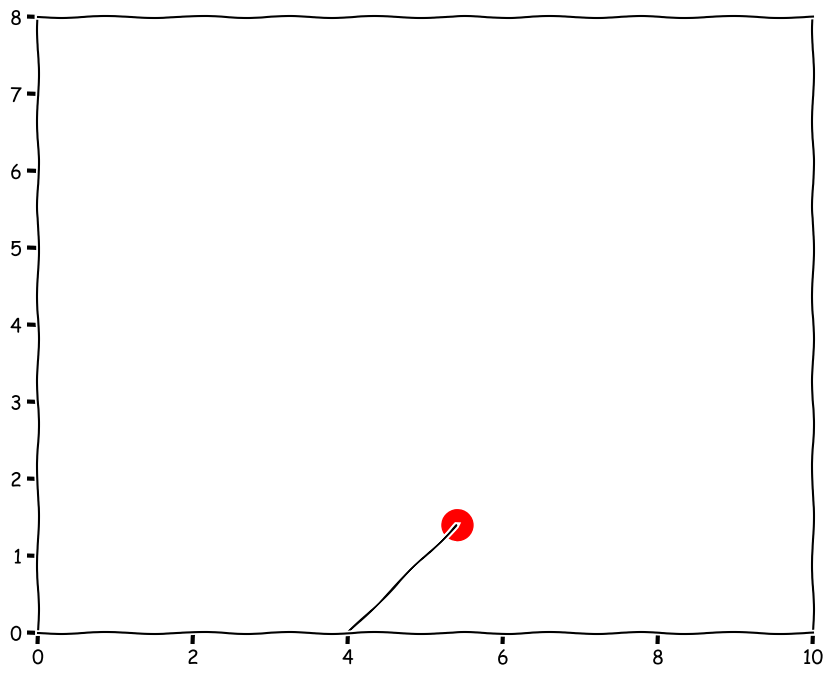

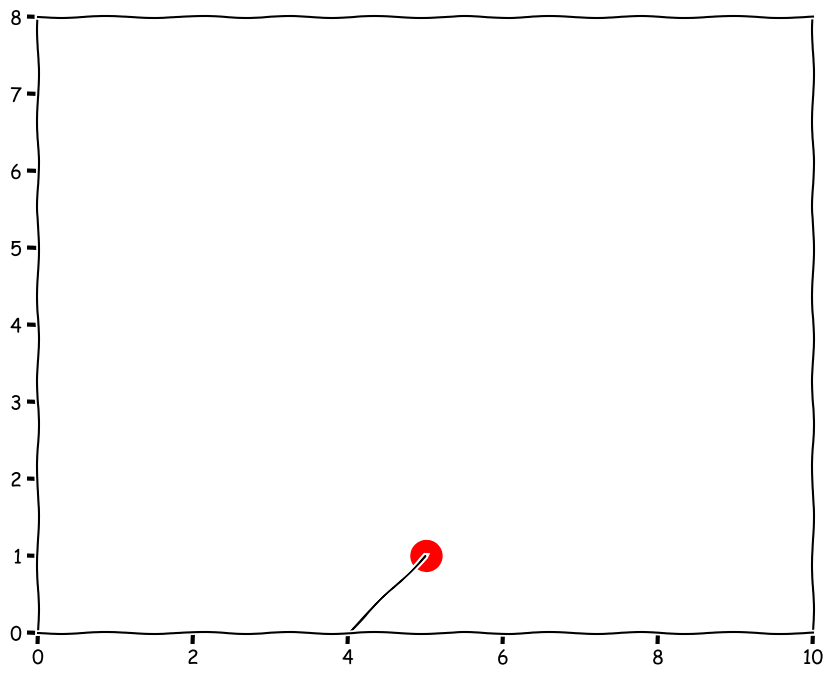

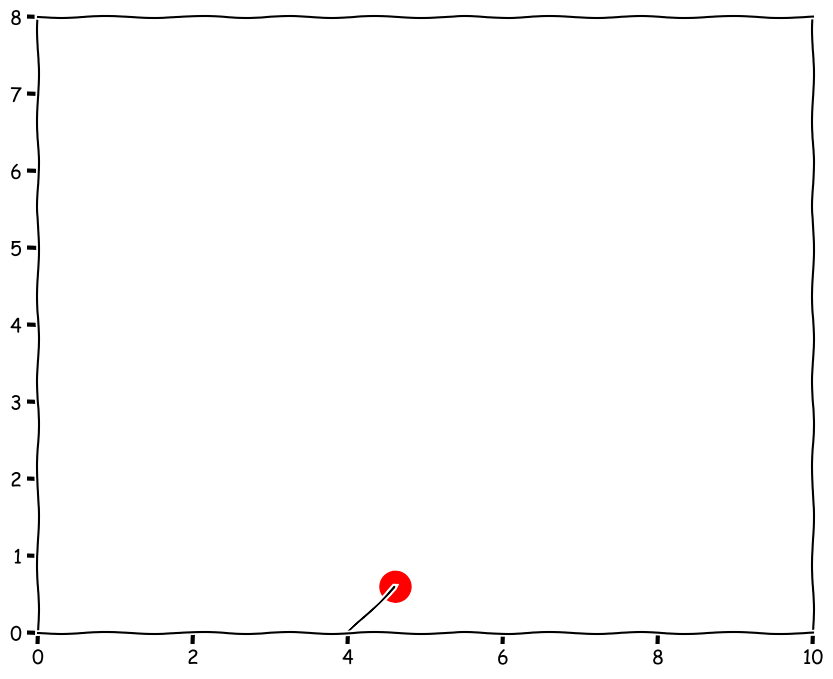

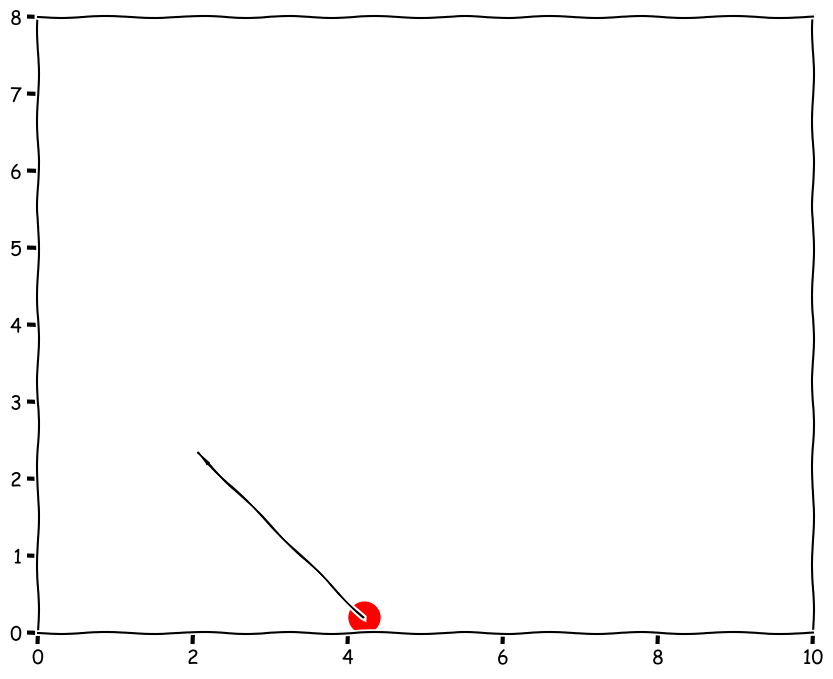

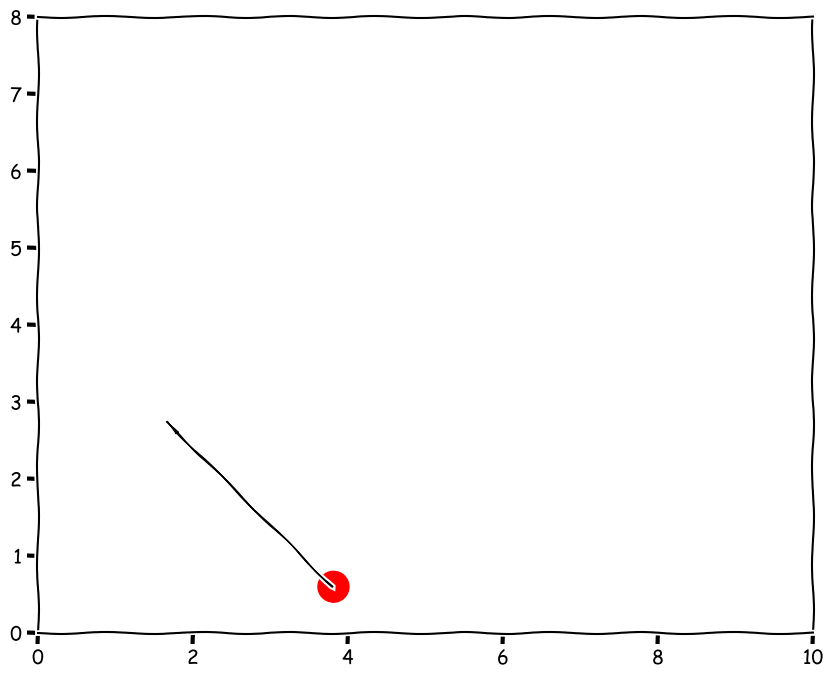

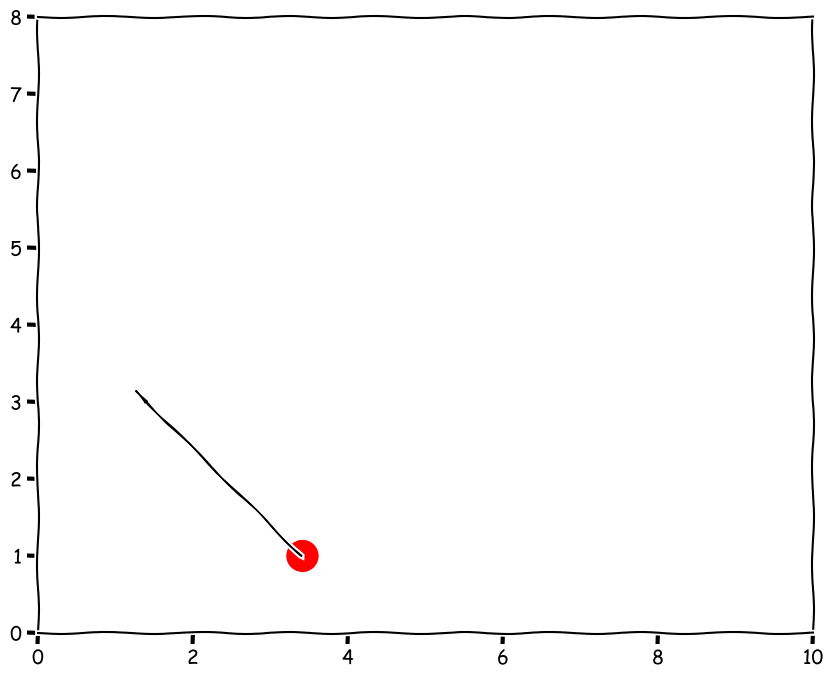

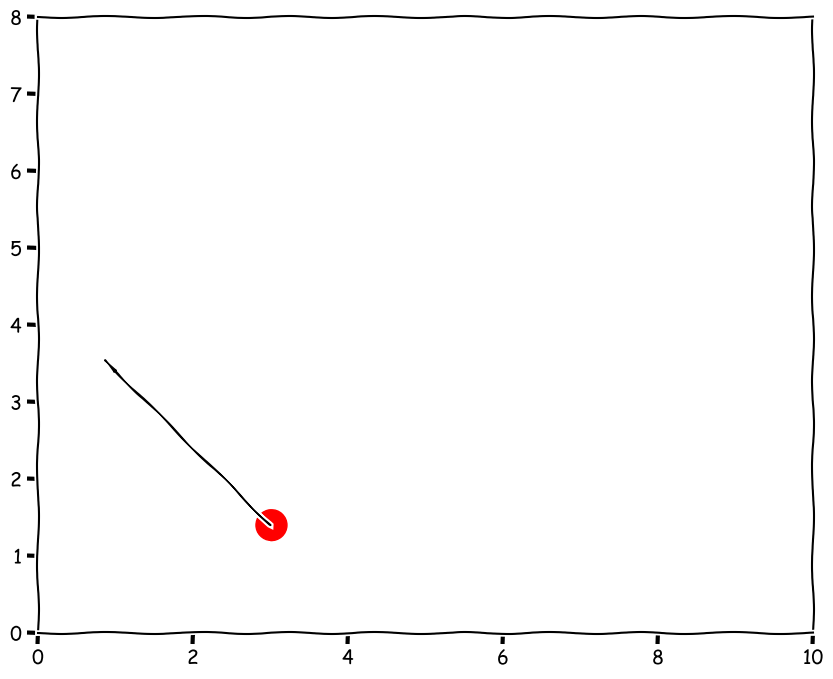

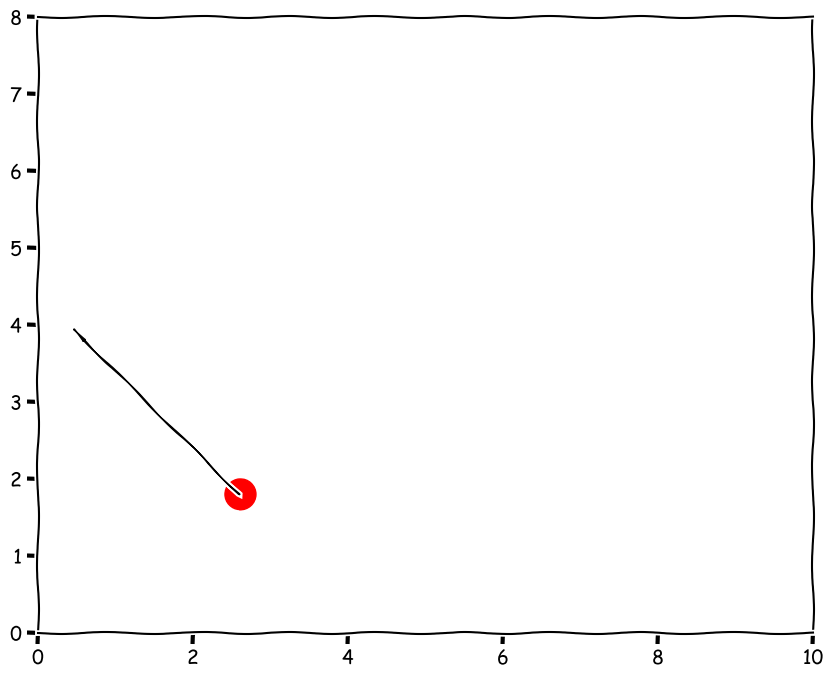

In [15]:
RADIUS = 0.2
POSITION = [1,1]
VELOCITY = [2,2]
WIDTH, HEIGHT = 10, 8
ARROW_HEAD_WIDTH, ARROW_HEAD_LENGTH = 0.05, 0.2
DELTA_T = 0.2

render_1(pos=POSITION, vel = VELOCITY)

filenames = []

for index in range(40):
    update_1(pos=POSITION, vel = VELOCITY,delta_t = DELTA_T)
    detect_collision_wall(pos = POSITION, vel = VELOCITY, radius = RADIUS, height = HEIGHT, width = WIDTH)
    render_1(pos=POSITION, vel = VELOCITY, index=index, save = True);
    filenames.append("{}.png".format(index))

In [16]:
with imageio.get_writer('one_ball_bounce.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

#### Now open `one_ball_bounce.gif` to check the visualization

### Boucning with gravity

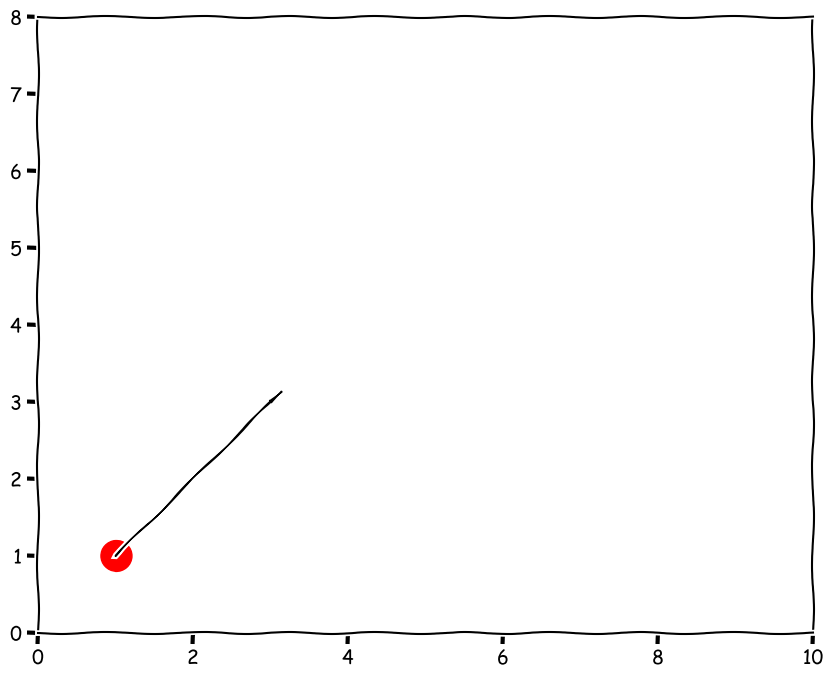

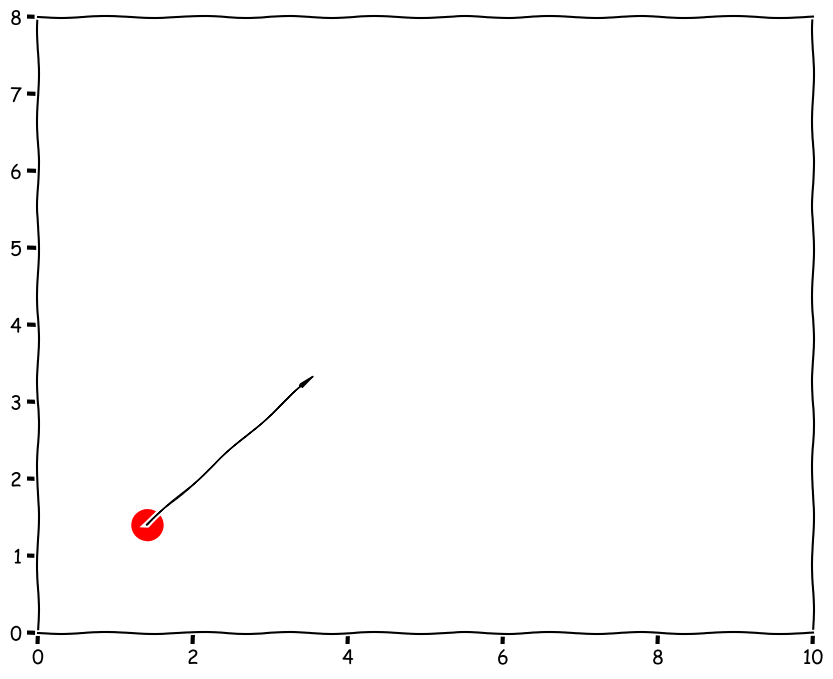

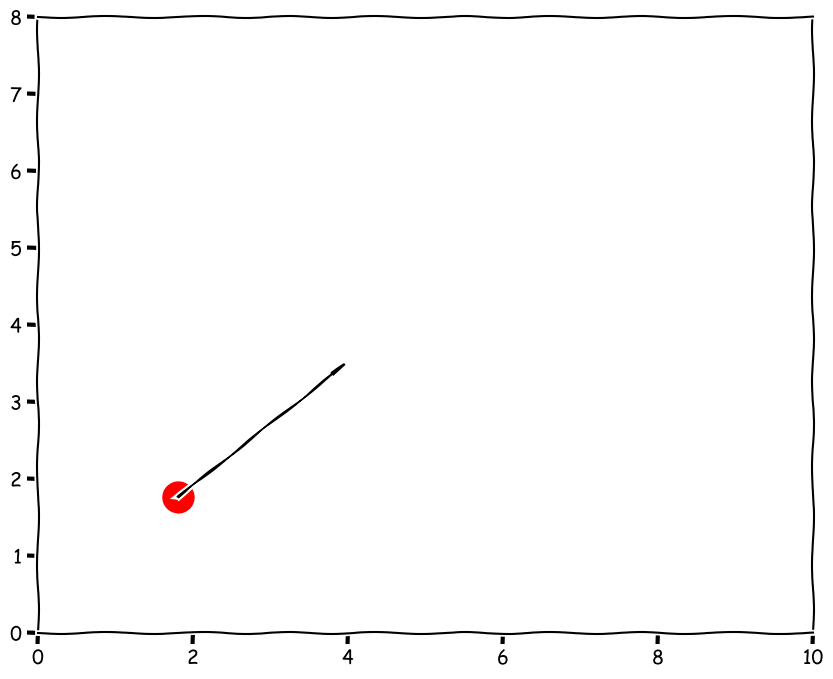

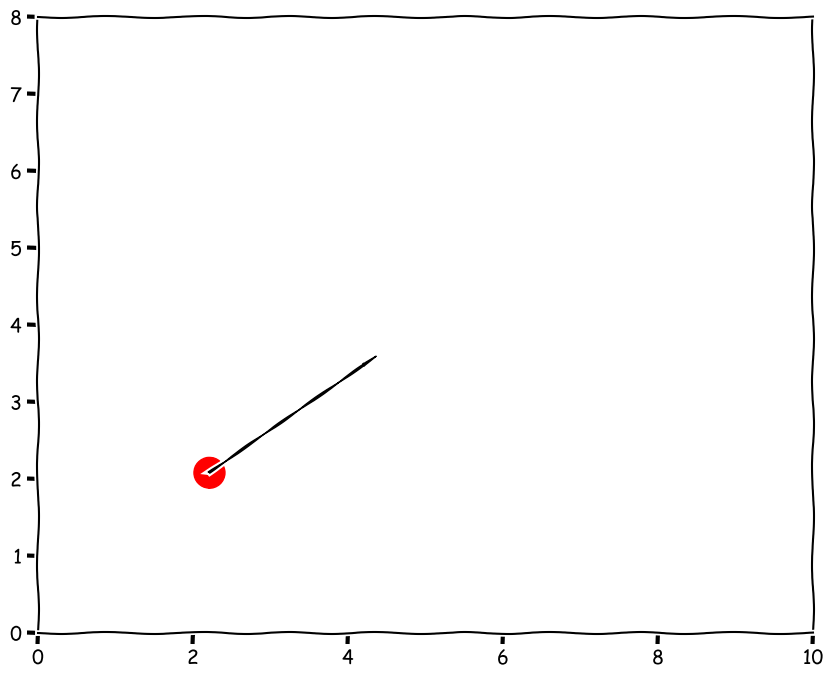

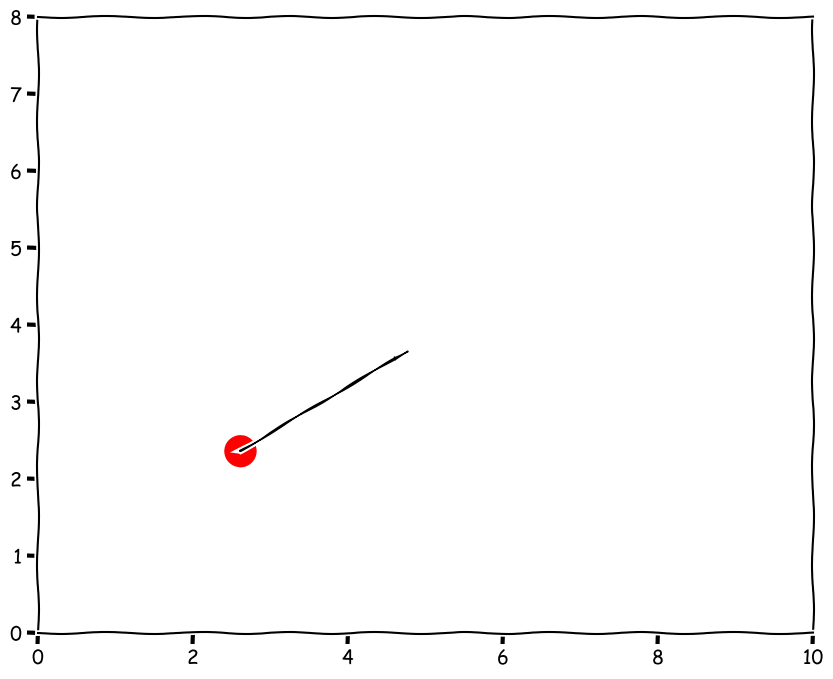

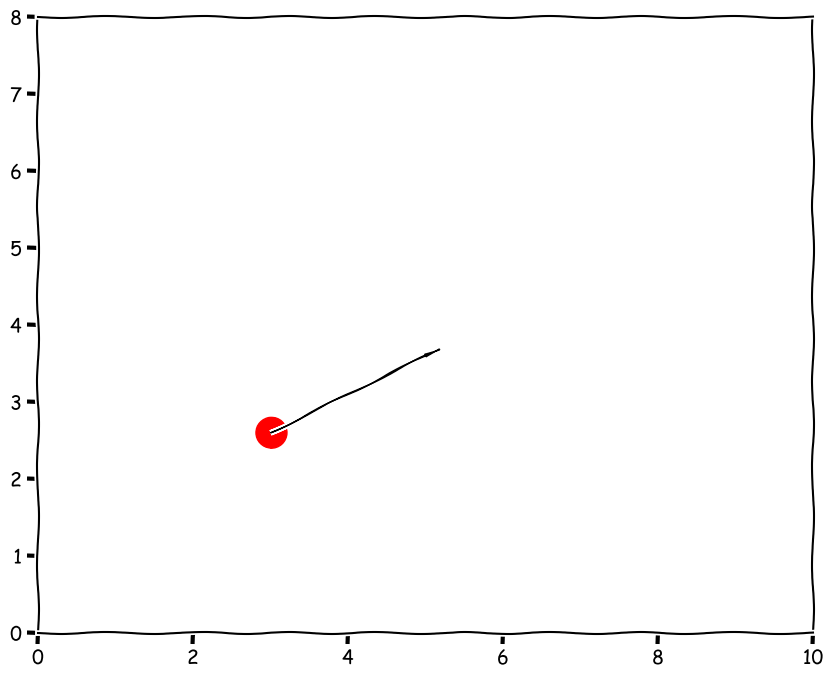

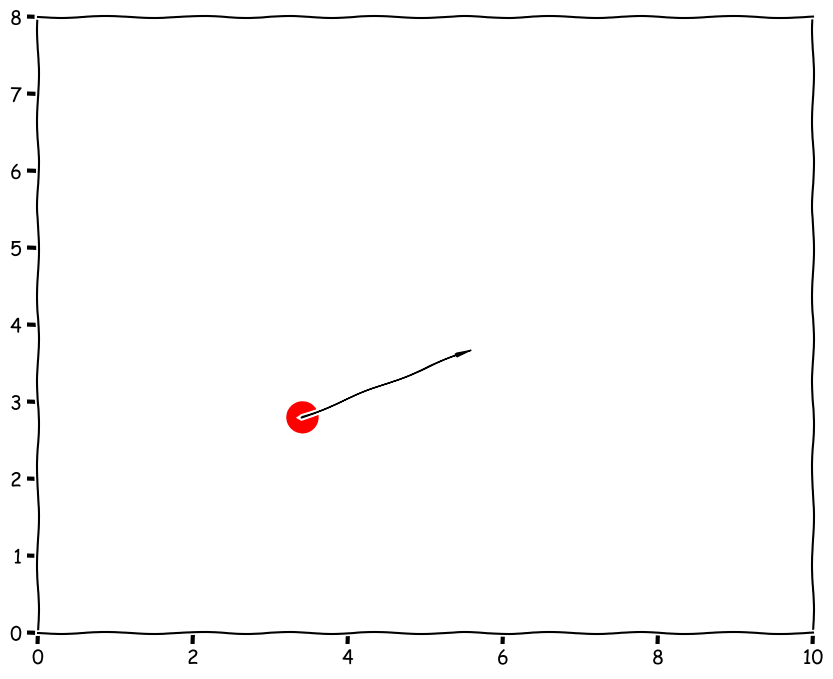

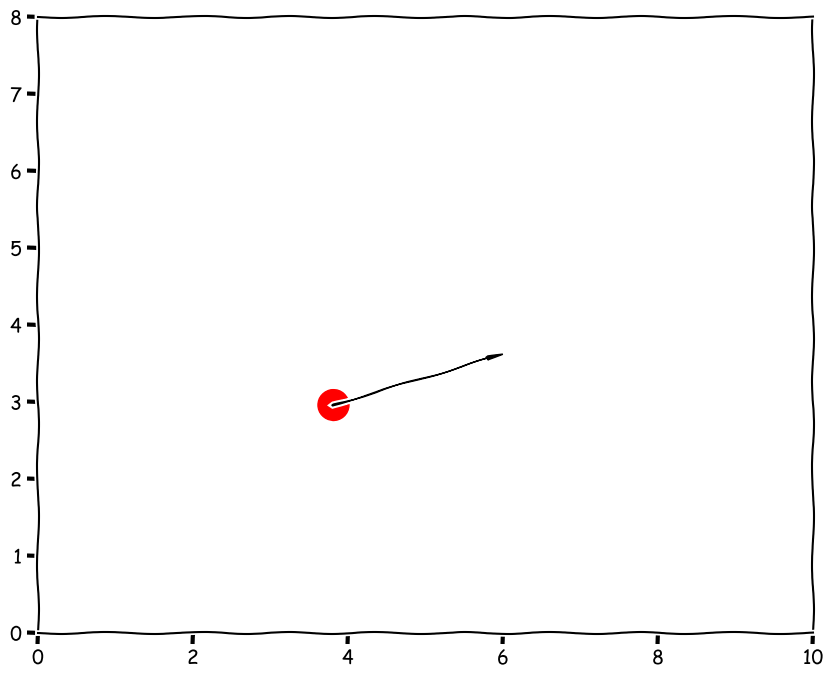

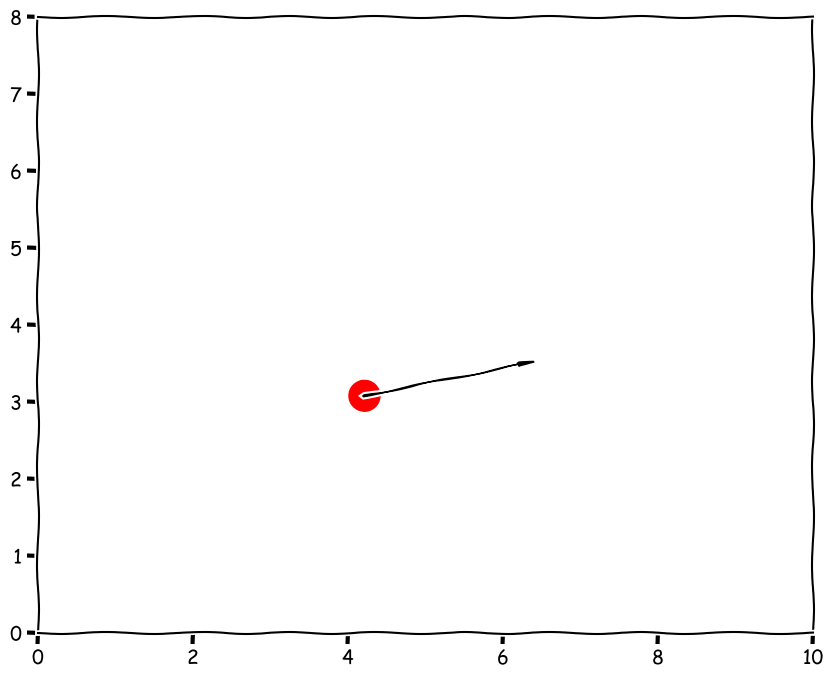

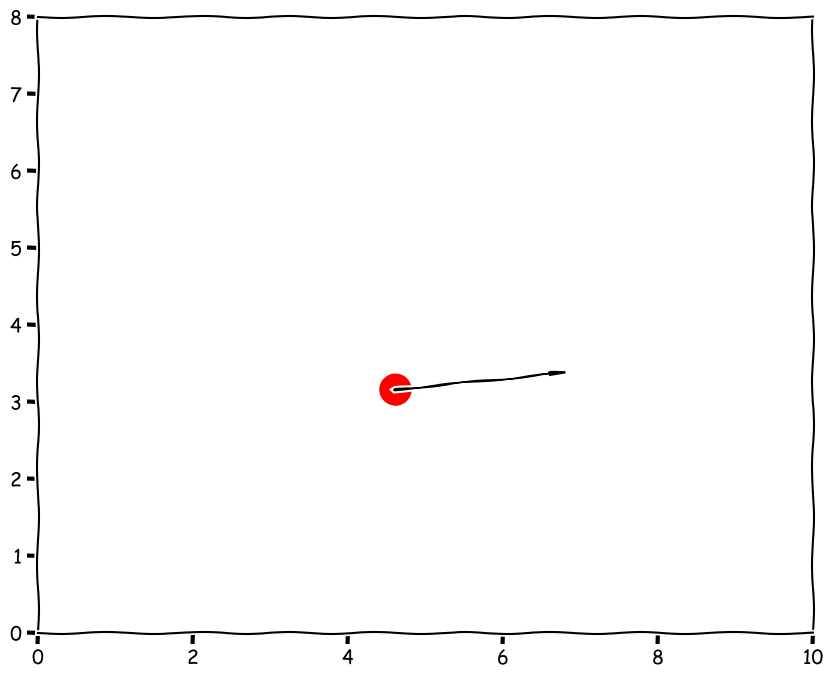

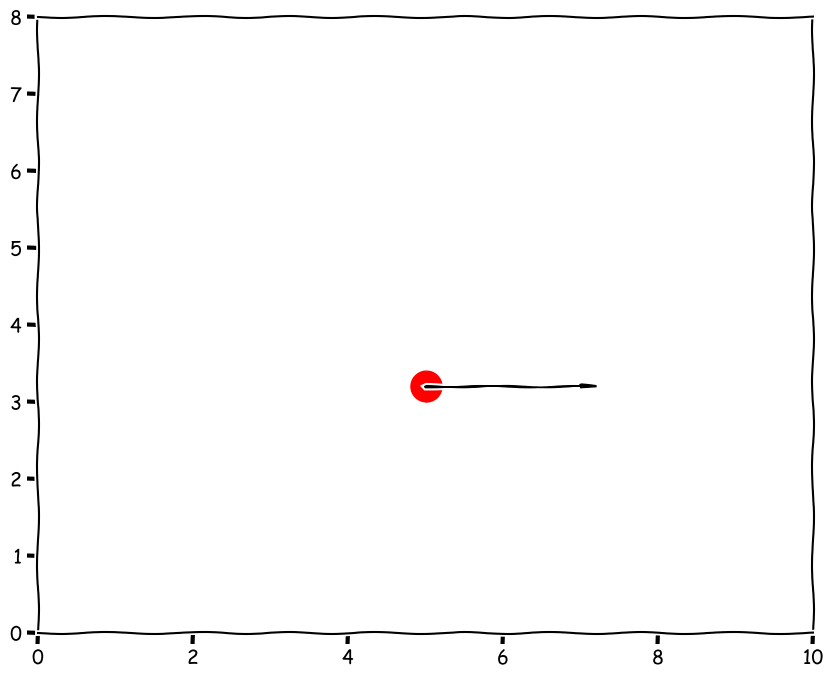

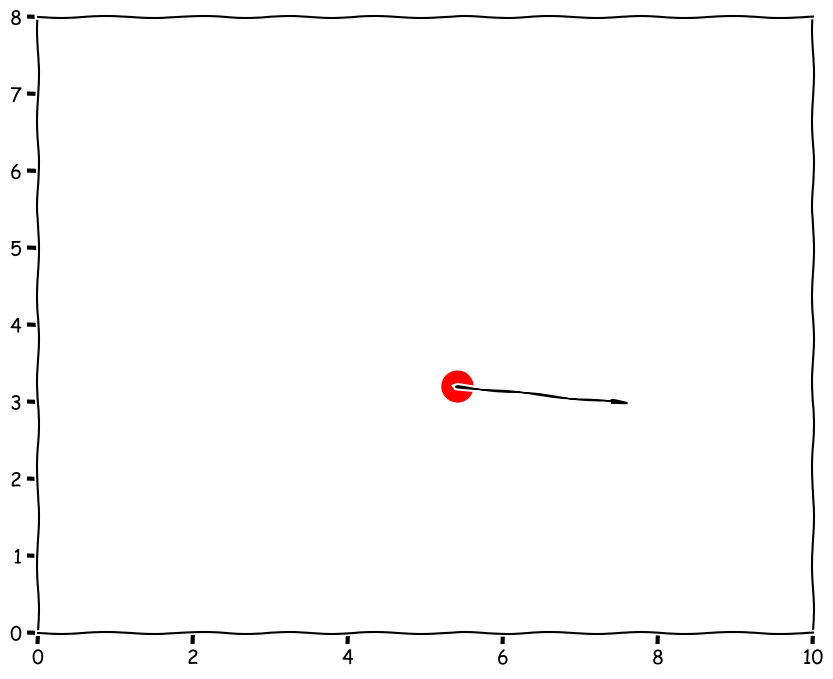

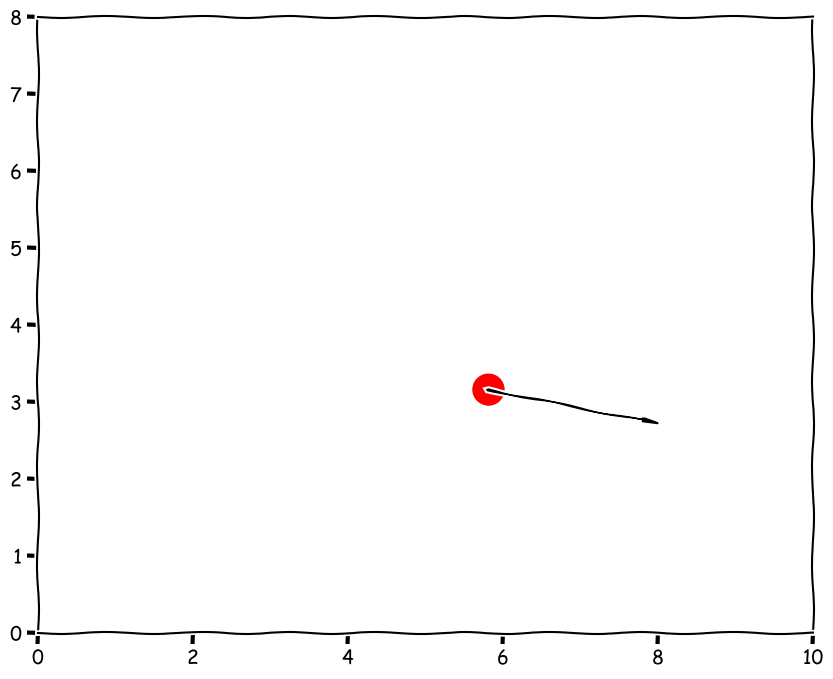

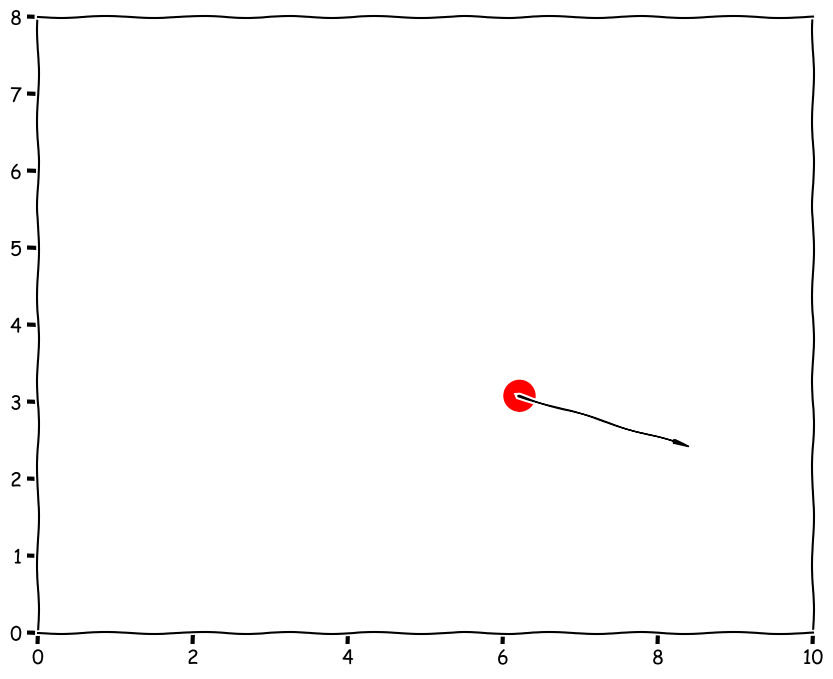

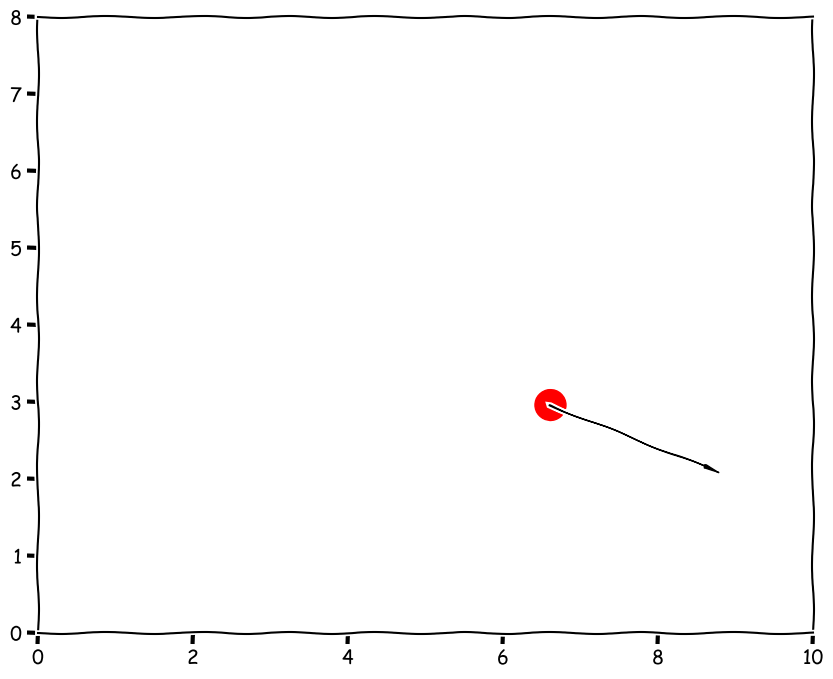

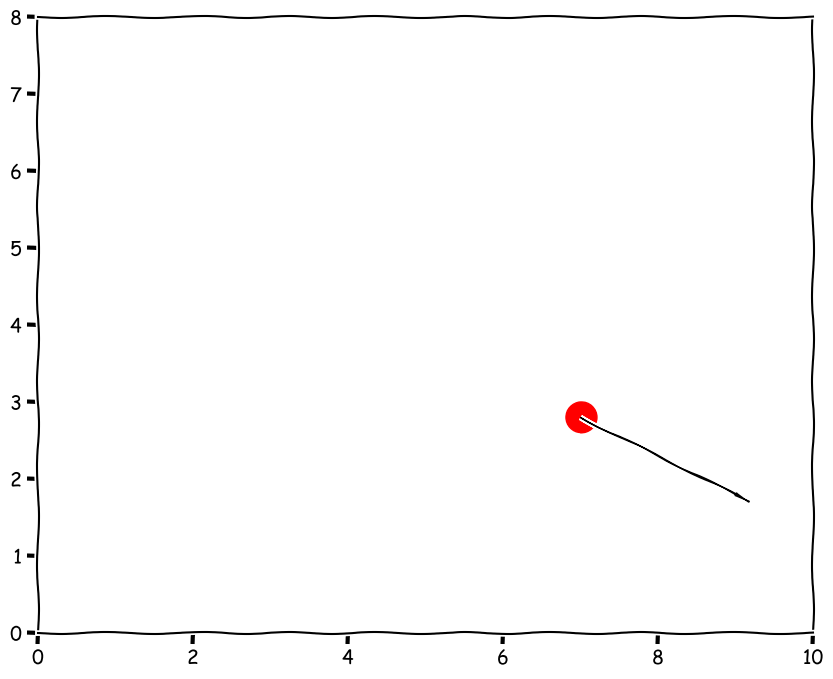

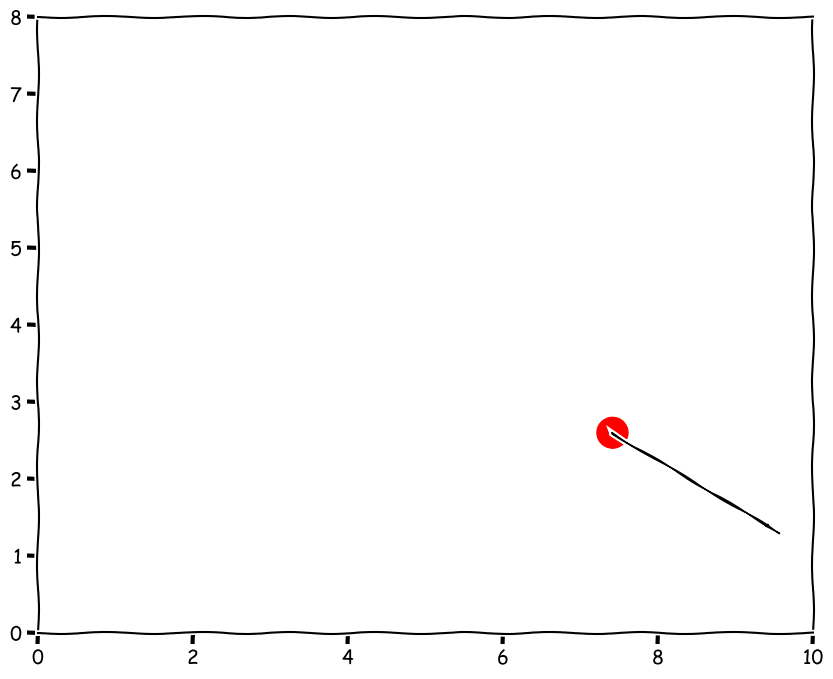

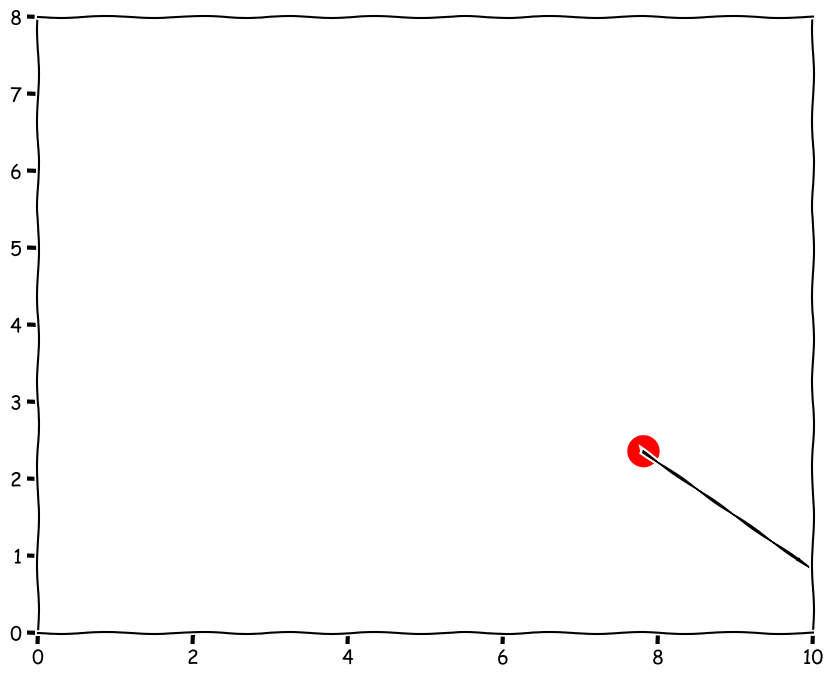

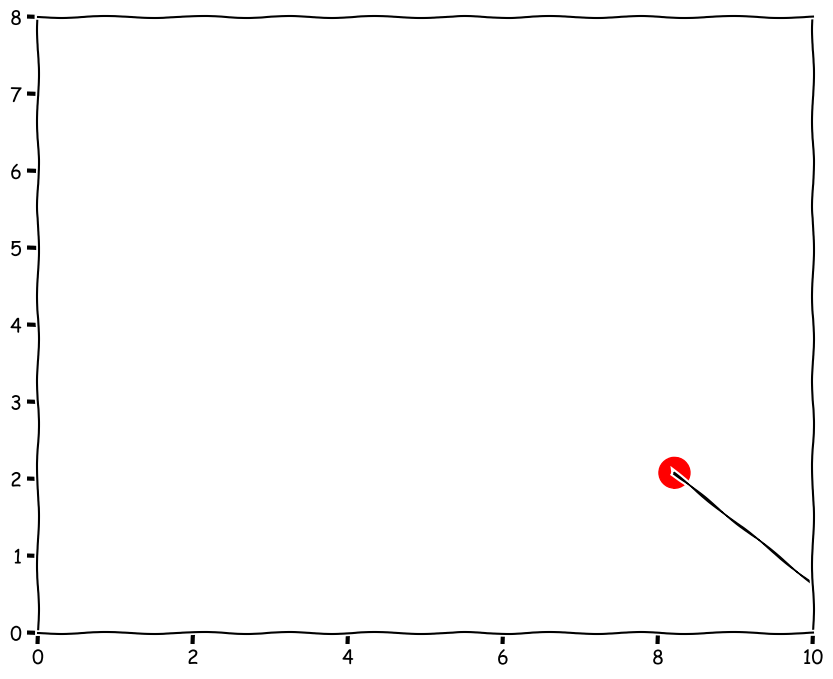

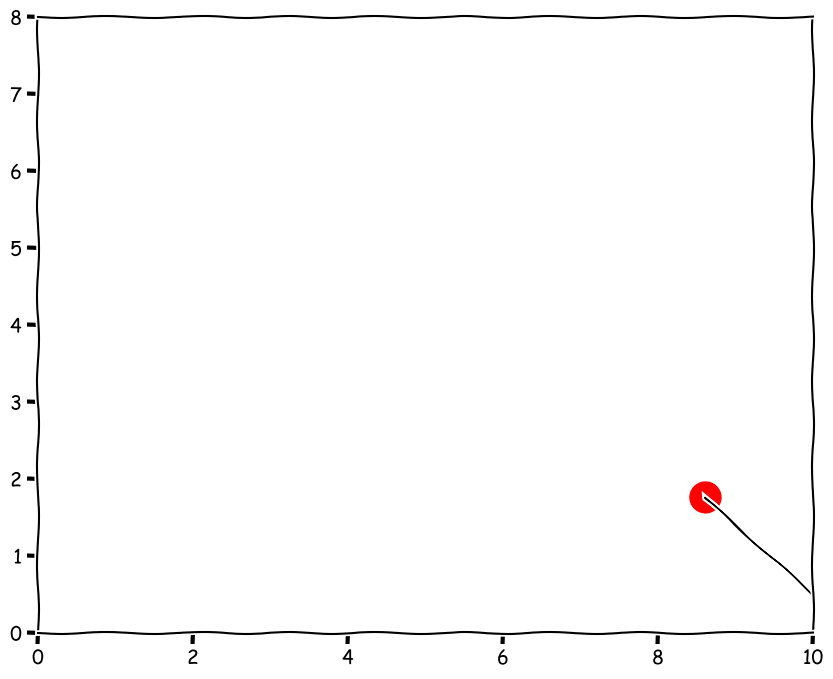

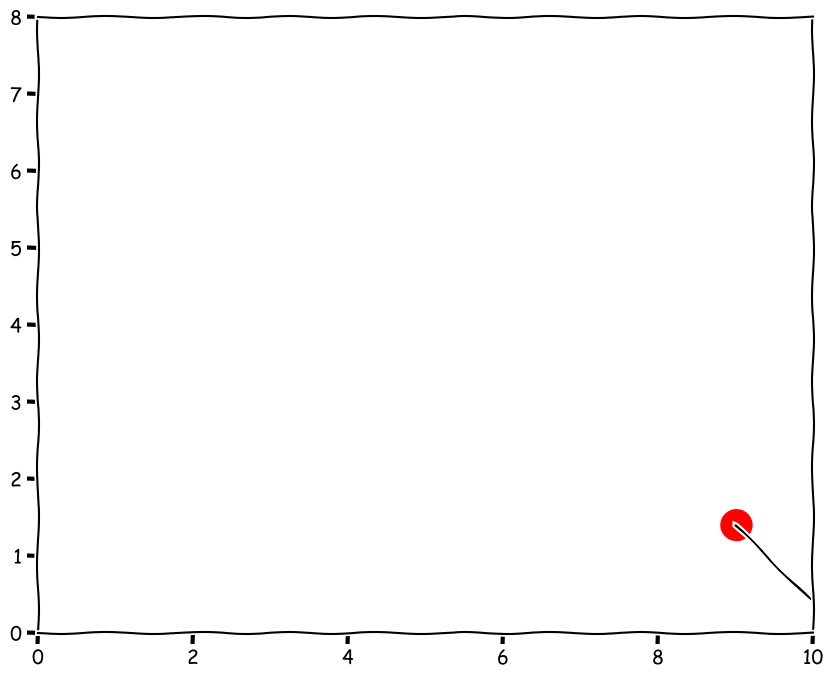

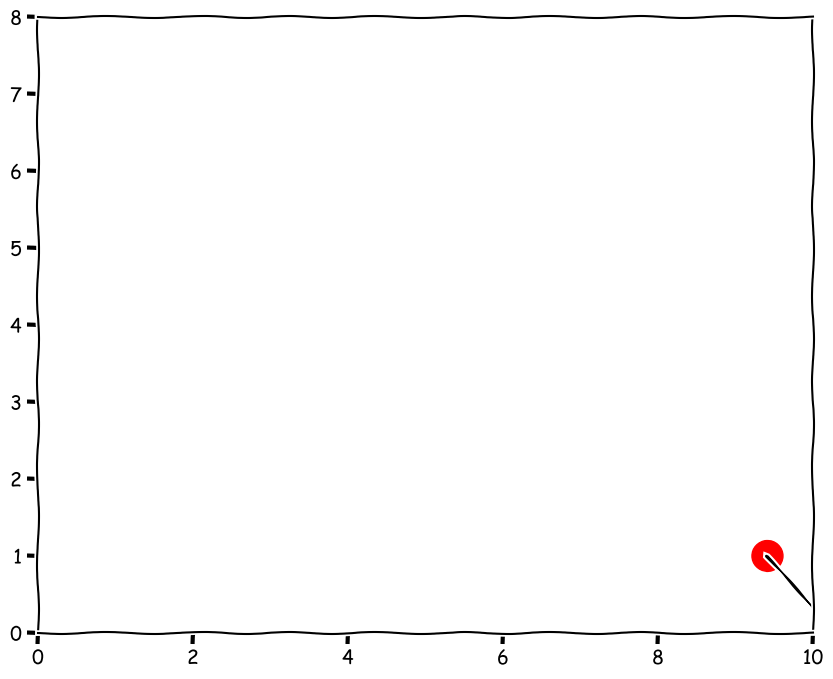

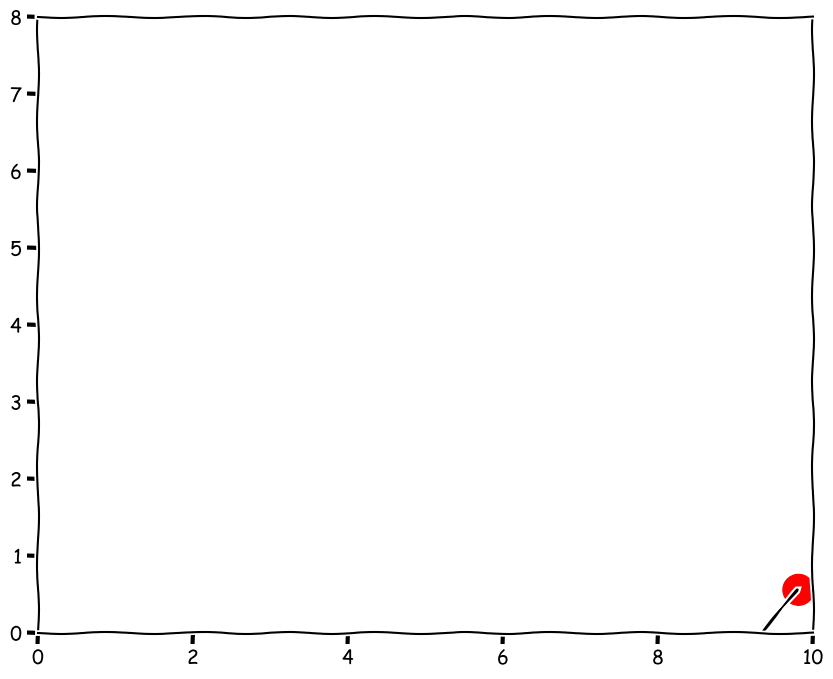

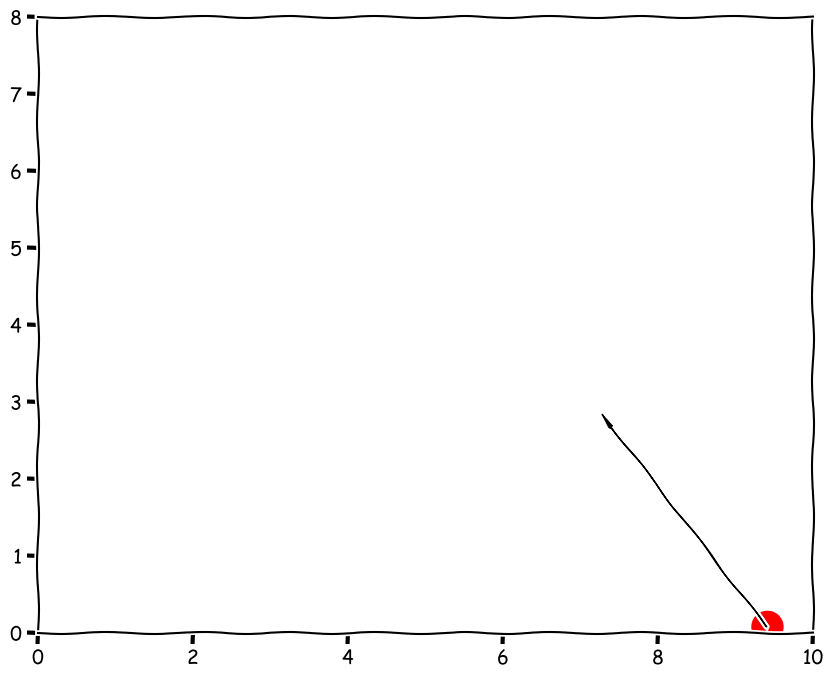

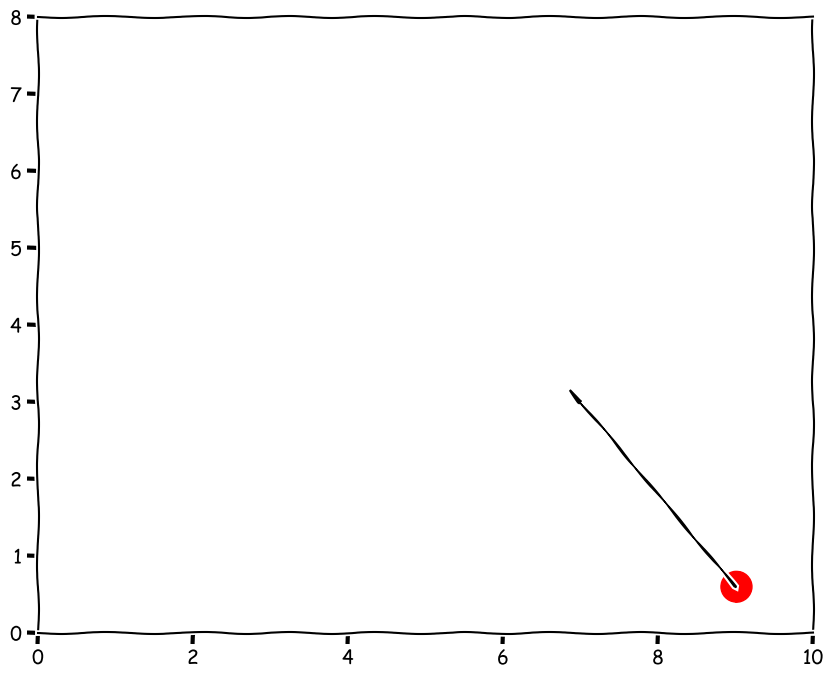

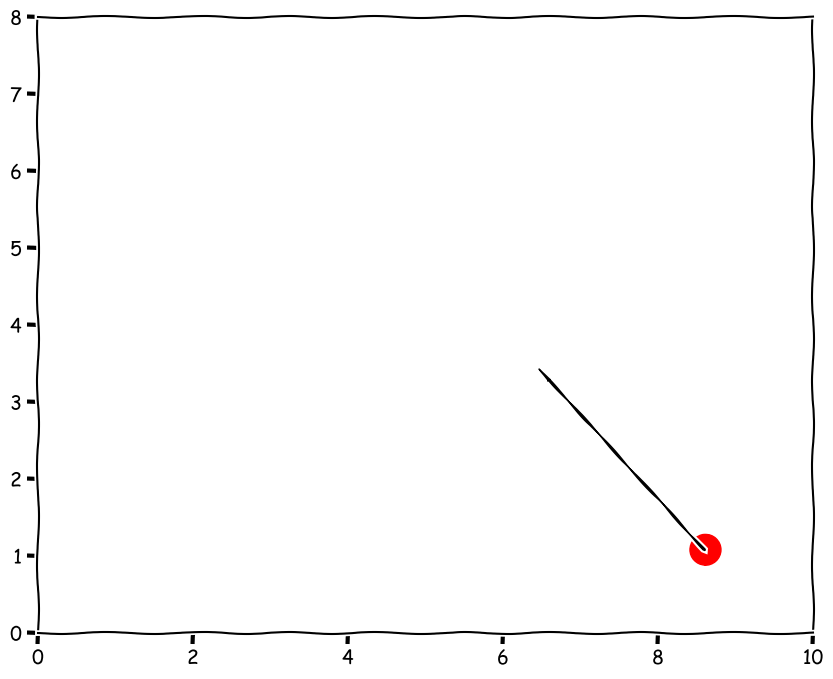

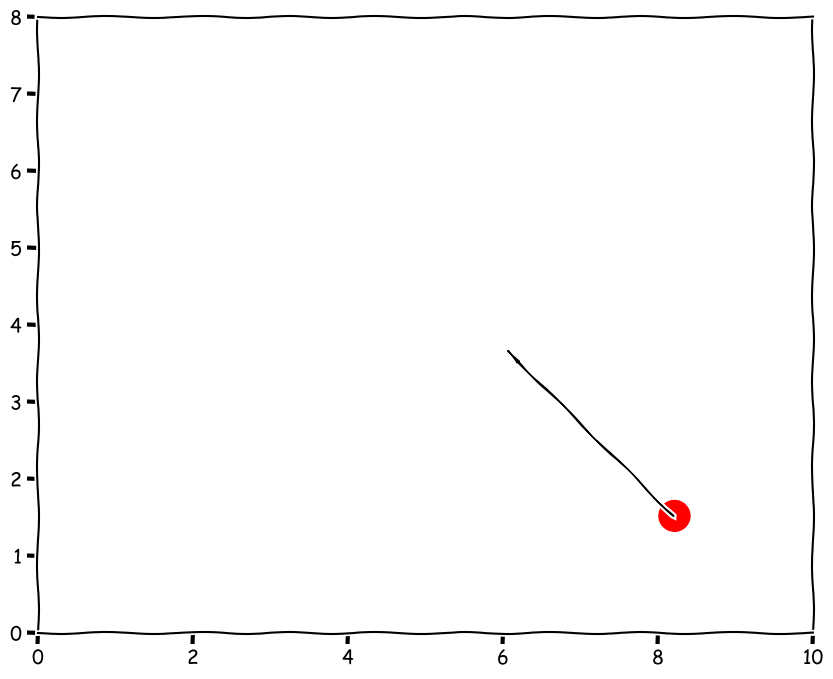

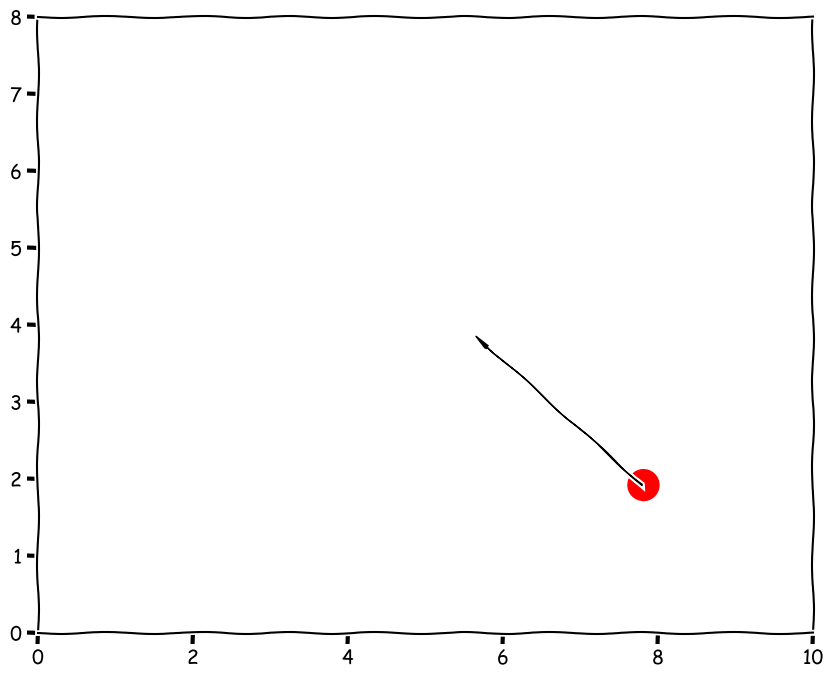

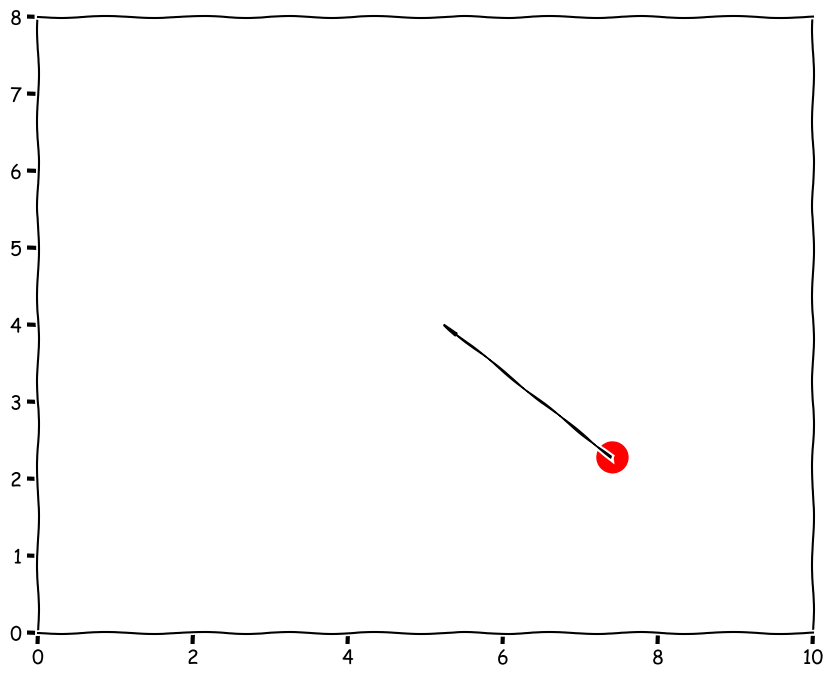

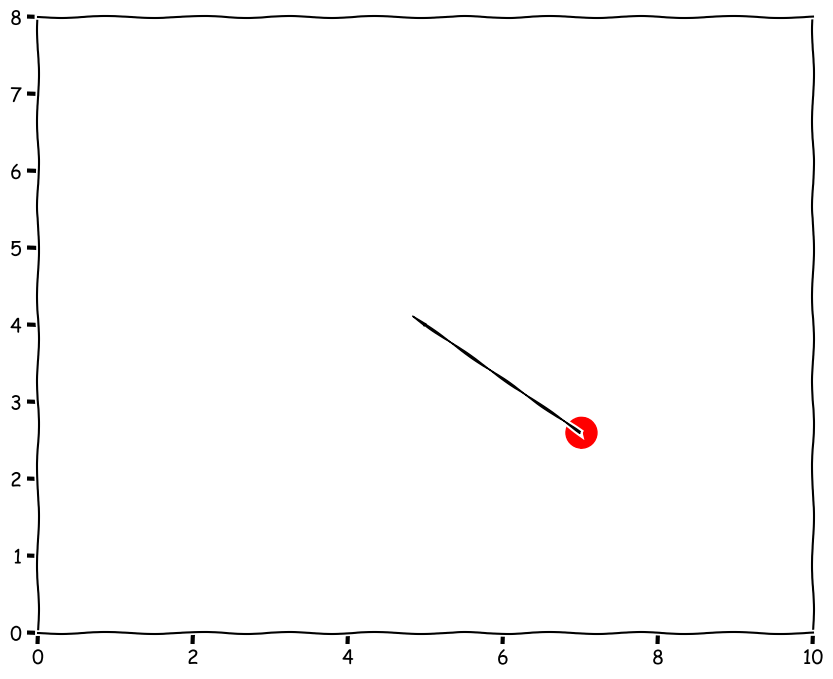

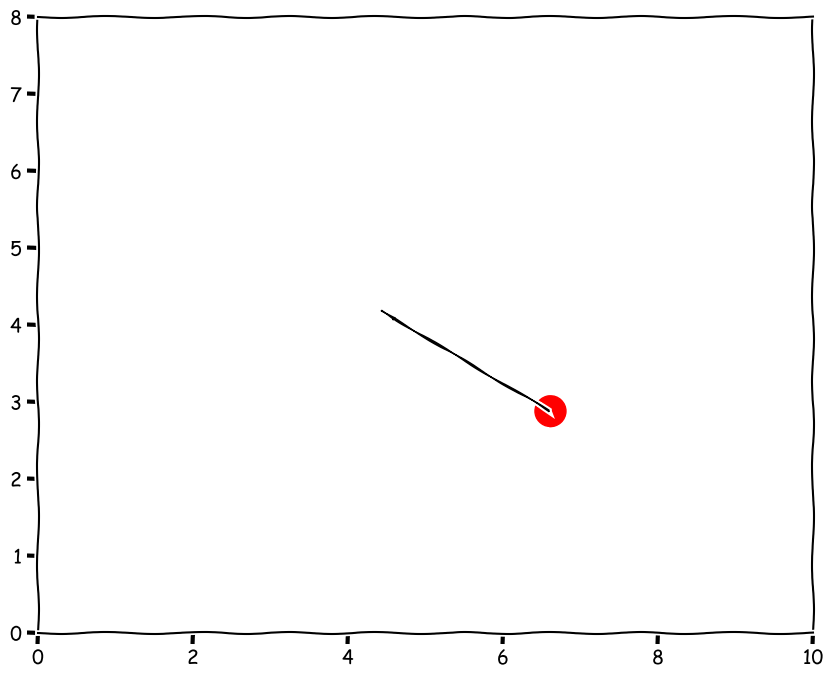

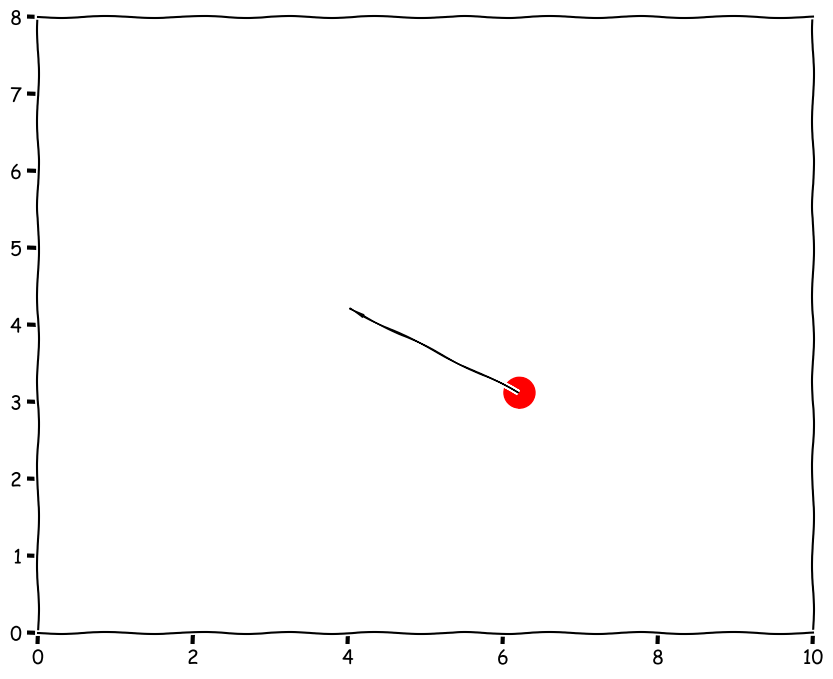

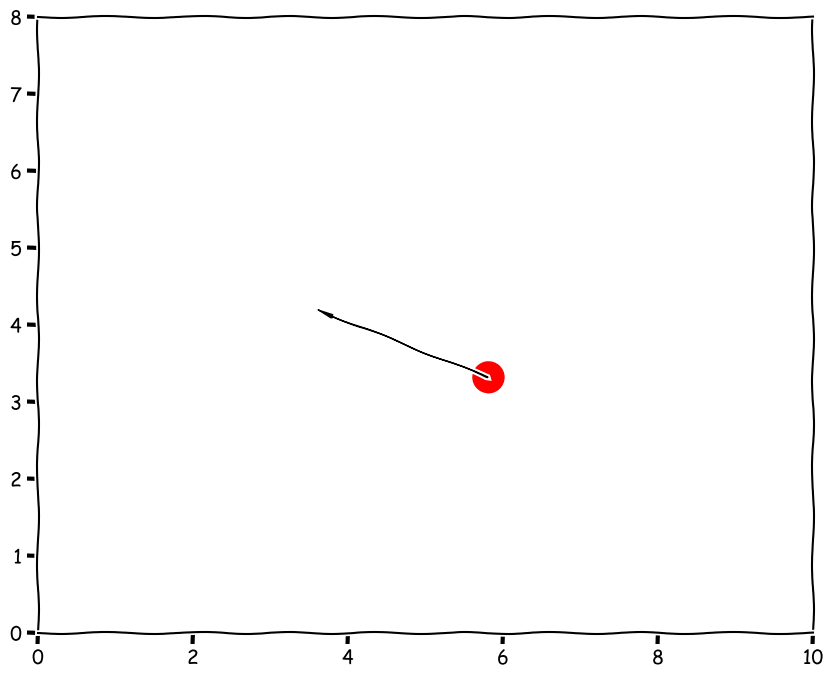

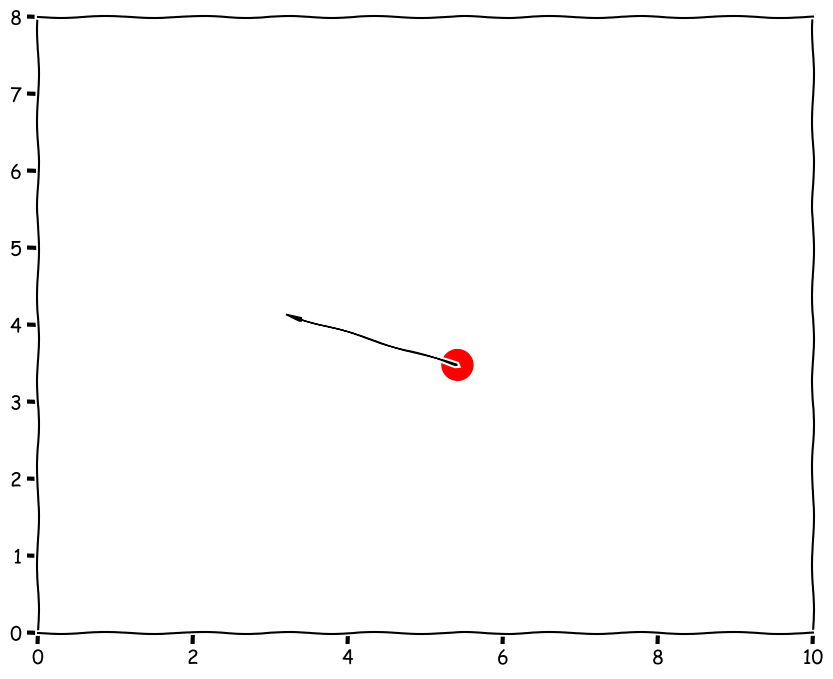

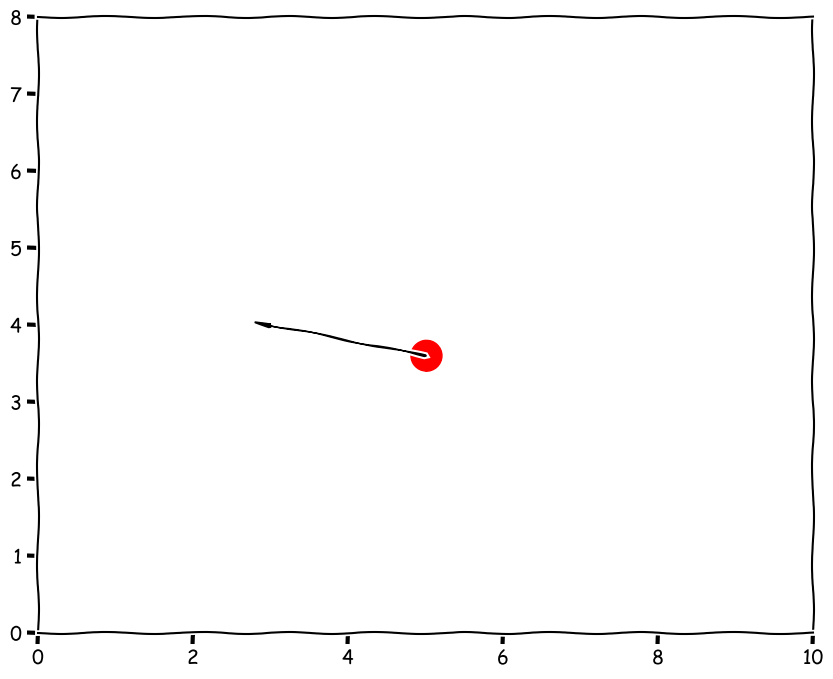

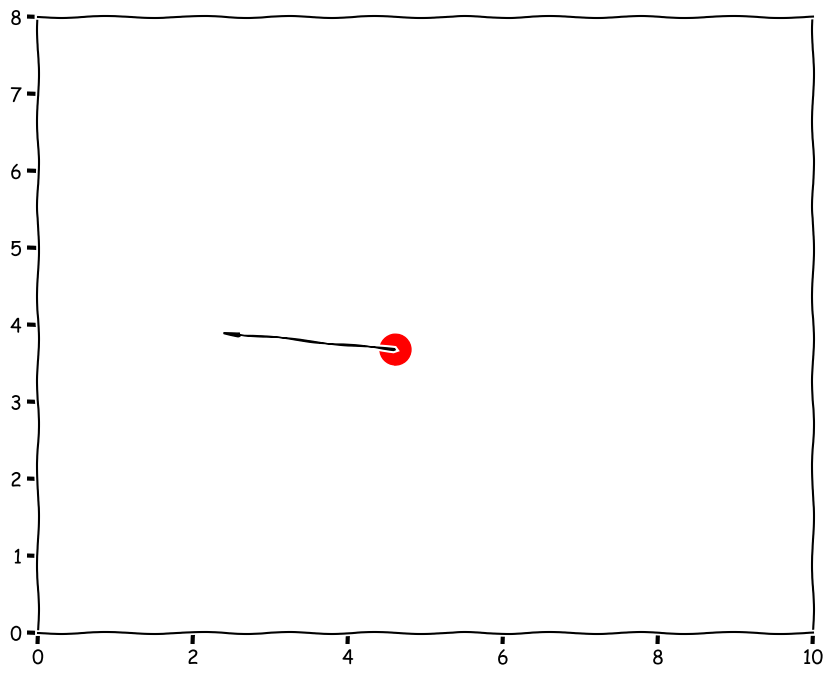

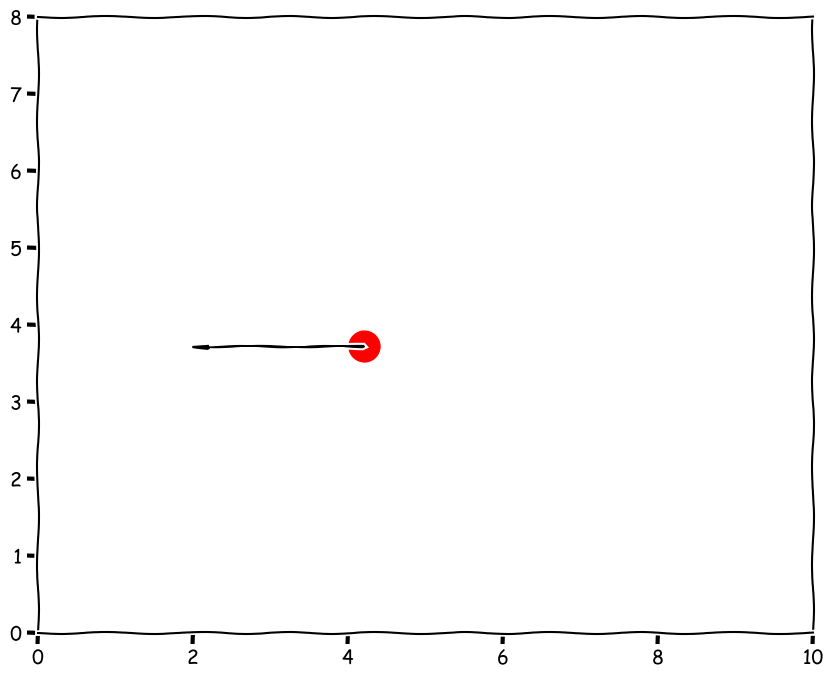

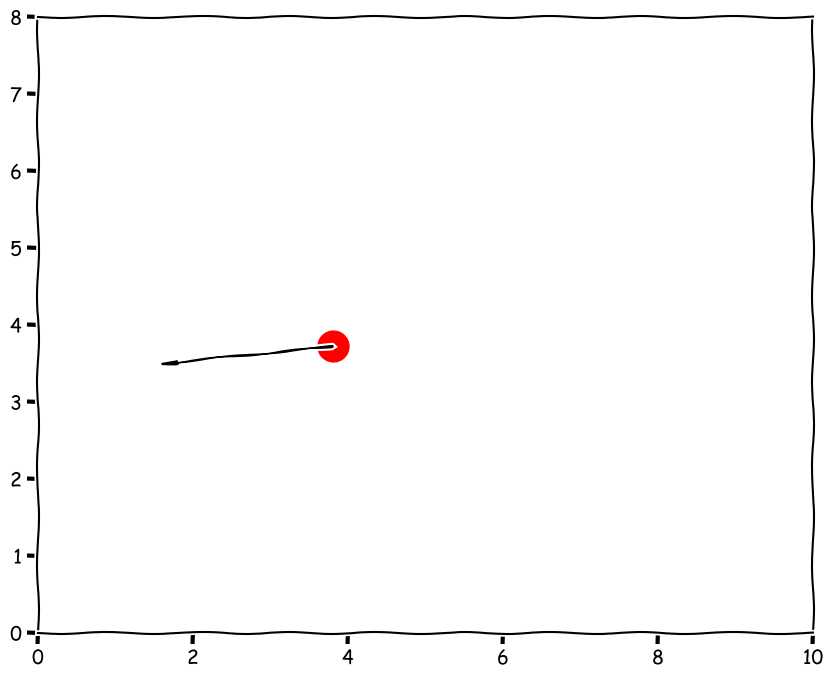

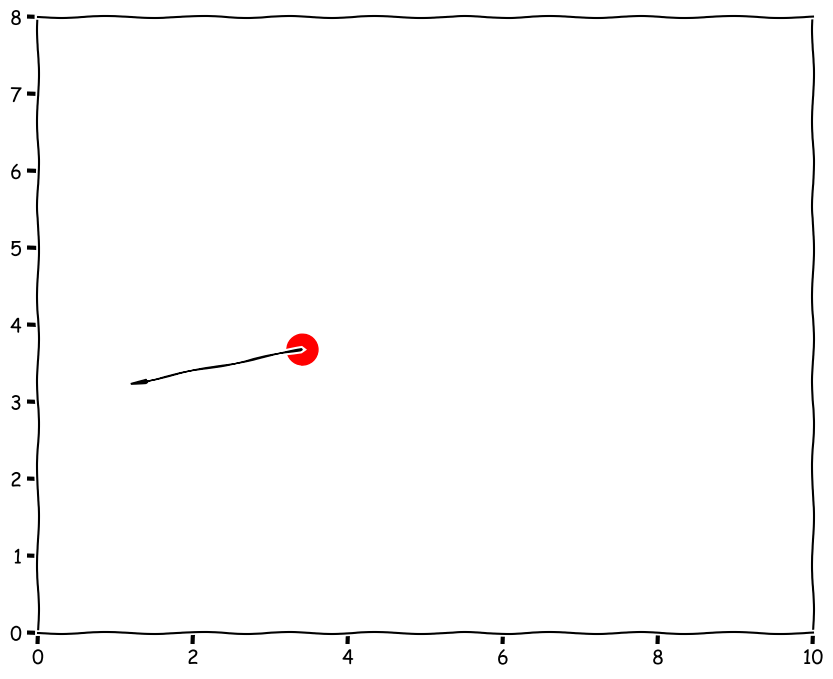

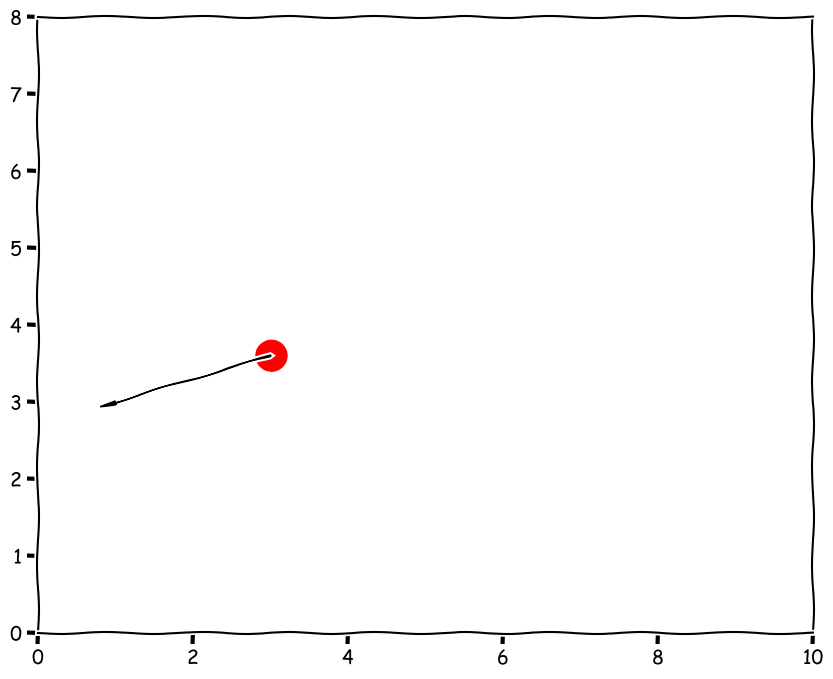

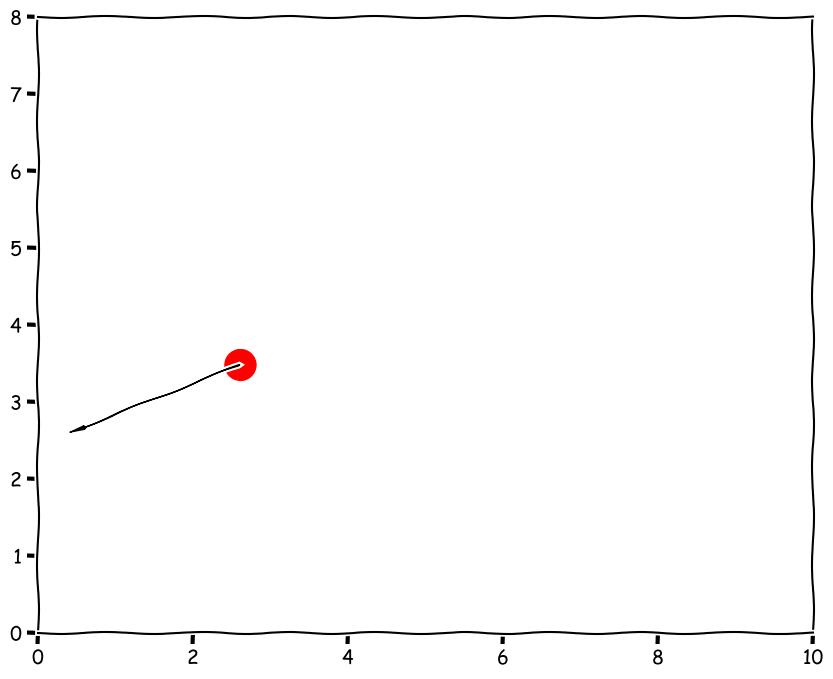

In [17]:
RADIUS = 0.2
POSITION = [1,1]
VELOCITY = [2,2]
ACCELERATION = [0,-1]
WIDTH, HEIGHT = 10, 8
ARROW_HEAD_WIDTH, ARROW_HEAD_LENGTH = 0.05, 0.2
DELTA_T = 0.2

render_1(pos=POSITION, vel = VELOCITY)

filenames = []

for index in range(40):
    update_1(pos=POSITION, vel = VELOCITY,delta_t = DELTA_T, acc=ACCELERATION)
    detect_collision_wall(pos = POSITION, vel = VELOCITY, radius = RADIUS, height = HEIGHT, width = WIDTH)
    render_1(pos=POSITION, vel = VELOCITY, index=index, save = True)
    filenames.append("{}.png".format(index))
    
with imageio.get_writer('one_ball_bounce_gravity.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### Two ball collision formula

\begin{align}
    v_{1}'' & = v_1 - \frac{2m_2}{m_1+m_2} \frac{<v_1-v_2,c_1 - c_2>}{||c_1 - c_2||^2}(c_1-c_2) \\
    v_{2}'' & = v_2 - \frac{2m_1}{m_1+m_2} \frac{<v_2-v_1,c_2 - c_1>}{||c_1 - c_2||^2}(c_2-c_1) 
\end{align}

### Define new render functions for better visualization with multiple balls

In [18]:
def render_2(pos = POSITION, vel = VELOCITY, radius = RADIUS, save= False, index = None):
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))
        plt.xlim(0,WIDTH)
        plt.ylim(0,HEIGHT)
        ball_1 = plt.Circle(pos, radius, color='r')
        ax.add_patch(ball_1)
        ax.arrow(*pos, 
                 *vel, 
                 head_width=ARROW_HEAD_WIDTH, 
                 head_length=ARROW_HEAD_LENGTH, 
                 fc='k', ec='k')
        if save:
            plt.savefig("{}.png".format(index))
        plt.show()
        
def render_3(positions, velocities, radii, save= False, index = None):
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))
        plt.xlim(0,WIDTH)
        plt.ylim(0,HEIGHT)
        assert(len(positions) == len(velocities))
        assert(len(velocities) == len(radii))
        for pos, vel, radius in zip(positions, velocities, radii):
            ball_1 = plt.Circle(pos, radius, color='r')
            ax.add_patch(ball_1)
            ax.arrow(*pos, 
                     *vel, 
                     head_width=ARROW_HEAD_WIDTH, 
                     head_length=ARROW_HEAD_LENGTH, 
                     fc='k', ec='k')
        if save:
            plt.savefig("{}.png".format(index))
        plt.show()

### In-book calculation example

\begin{align}
    v_{1}'' & = v_1 - \frac{2m_2}{m_1+m_2} \frac{<v_1-v_2,c_1 - c_2>}{||c_1 - c_2||^2}(c_1-c_2) \\
    v_{2}'' & = v_2 - \frac{2m_1}{m_1+m_2} \frac{<v_2-v_1,c_2 - c_1>}{||c_1 - c_2||^2}(c_2-c_1) 
\end{align}

\begin{align}
    v_{1}'' & = v_1 - \frac{2m_2}{m_1+m_2} \frac{<v_1-v_2,c_1 - c_2>}{||c_1 - c_2||^2}(c_1-c_2) \\
            & = (0.5,0.5) - \frac{2*3}{2+3}\frac{<(0.5,0.5)- (-0.5,1), (2,3) - (2.5,3)>}{||(2,3) - (2.5,3)||^2}((2,3) - (2.5,3))\\
            & = (-0.7,0.5)
\end{align}

\begin{align}
    v_{2}'' & = v_2 - \frac{2m_1}{m_1+m_2} \frac{<v_2-v_1,c_2 - c_1>}{||c_1 - c_2||^2}(c_2-c_1)  \\
            & = (-0.5,1) - \frac{2*2}{2+3}\frac{<(-0.5,1) - (0.5,0.5) , (2.5,3) - (2,3)>}{||(2.5,3) - (2,3)||^2}((2.5,3) - (2,3))\\
            & = (0.3,1)
\end{align}

### Code refactoring

In [ ]:
from dataclasses import dataclass

@dataclass
class Box:
    height: float
    width: float
    

@dataclass
class Ball:
    pos: [float, float]
    vel: [float, float]
    mass: float
    radius: float
        
    def update(self, acc = None, delta_t = 0.2) -> None:
        for i in range(len(self.pos)):
            self.pos[i] += self.vel[i] * delta_t
        if acc:
            for i in range(len(self.pos)):
                self.vel[i] += acc[i] * delta_t
        
    def detect_ball_collision(self, other) -> None:
        distance = np.sqrt((self.pos[0] - other.pos[0])**2 + (self.pos[1] - other.pos[1])**2)
        if self.radius + other.radius >= distance:
            self.ball_collision_update(other)
    
    def ball_collision_update(self, other)-> None:
        '''
        Implement the ball collision logic making use of symmetry.
        
        ball_1: self
        ball_2: other
        
        '''
        mass_factor_1 = 2*other.mass/(self.mass + other.mass)
        mass_factor_2 = 2*self.mass/(self.mass + other.mass)
        
        velocity_diff = [self.vel[0] - other.vel[0], self.vel[1] - other.vel[1]]
        center_diff = [self.pos[0] - other.pos[0], self.pos[1] - other.pos[1]]
        squared_center_diff = sum([diff**2 for diff in center_diff])
        
        velocity_factor = np.dot(velocity_diff, center_diff)/squared_center_diff
        
        self.vel[0] -= mass_factor_1 * velocity_factor * center_diff[0]
        self.vel[1] -= mass_factor_1 * velocity_factor * center_diff[1]
        
        other.vel[0] += mass_factor_2 * velocity_factor * center_diff[0]
        other.vel[1] += mass_factor_2 * velocity_factor * center_diff[1]
    
    def detect_box_collision(self, box: Box) -> None:
        # left wall
        if abs(self.pos[0]-0) < self.radius and self.vel[0] < 0:
            self.vel[0] = -self.vel[0]
            return
        # right wall
        if abs(box.width-self.pos[0])< self.radius and self.vel[0] > 0:
            self.vel[0] = -self.vel[0]
            return
        # upper wall 
        if abs(box.height-self.pos[1]) < self.radius and self.vel[1] > 0:
            self.vel[1] = -self.vel[1]
            return
        # lower wall
        if abs(self.pos[1]-0) < self.radius and self.vel[1] < 0:
            self.vel[1] = -self.vel[1]
            return
 

### Create a system class and implement the sweep-prune algorithm

In [19]:
from typing import List, Tuple

@dataclass
class System:
    box: Box
    balls: List[Ball]
    acc: float = None
    delta_t: float = 0.2
        
    def init_balls(self):
        raise NotImplementedError
        
    def update(self):
        
        # ball-ball collision detection
        candidates = self.sweep_prune()
        for pair_idx in candidates:
                self.balls[pair_idx[0]].detect_ball_collision(self.balls[pair_idx[1]])
        
        # ball-wall collision detection
        
        for ball in self.balls:
            ball.detect_box_collision(self.box)
        
        # update velocity
        for ball in self.balls:
            ball.update(self.acc, self.delta_t)
            
    def sweep_prune(self)-> List[Tuple[int, int]]:
        # return a list of indices of balls that may collide
        self.balls.sort(key = lambda ball: ball.pos[0]) # sort by x position
        active_balls = []
        candidates = []
        for idx, ball in enumerate(self.balls):
            if not active_balls:
                active_balls.append(idx)
            else:
                closest_ball = self.balls[active_balls[-1]]
                if closest_ball.pos[0] + closest_ball.radius >= ball.pos[0] - ball.radius:
                    candidates.append((active_balls[-1],idx))
                    active_balls.append(idx)
                else:
                    active_balls = [idx]
        return candidates
            
            
            
    def render(self, save= False, file_name = None, return_array = False):
        with plt.xkcd():
            fig, ax = plt.subplots(figsize=(self.box.width, self.box.height))
            if return_array:
                from matplotlib.backends.backend_agg import FigureCanvasAgg
                canvas = FigureCanvasAgg(fig)
            ax.set_xlim(0,self.box.width)
            ax.set_ylim(0,self.box.height)
            for ball in self.balls:
                pos, vel, radius = ball.pos, ball.vel, ball.radius
                ball_patch = plt.Circle(pos, radius, color='r')
                ax.add_patch(ball_patch)
                ax.arrow(*pos, 
                         *vel, 
                         fc='k', ec='k')
            if save:
                plt.savefig("{}.png".format(file_name))
            if return_array:
                # Retrieve a view on the renderer buffer
                canvas.draw()
                buf = canvas.buffer_rgba()
                # convert to a NumPy array
                return np.asarray(buf)
    def generate_gif(self, file_name = "multiple_ball_collision.gif", steps = 20):
        with imageio.get_writer(file_name, mode='I') as writer:
            for _ in range(steps):
                system.update()
                image = system.render(return_array = True)
                writer.append_data(image)

### Generate a 5-ball system
There are some outputs which you should ignore and check the `5_ball_system.gif`.

Can you figure out why some intermediate results don't make sense?

/var/folders/tt/nn178hhx2ndfc5mwzr92m0rr0000gn/T/ipykernel_15546/3511020479.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(self.box.width, self.box.height))


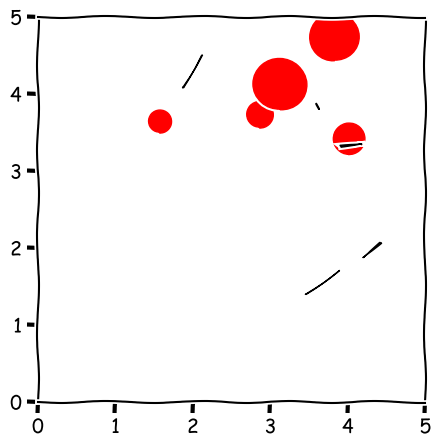

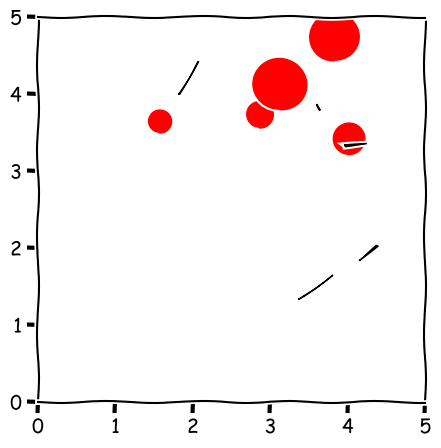

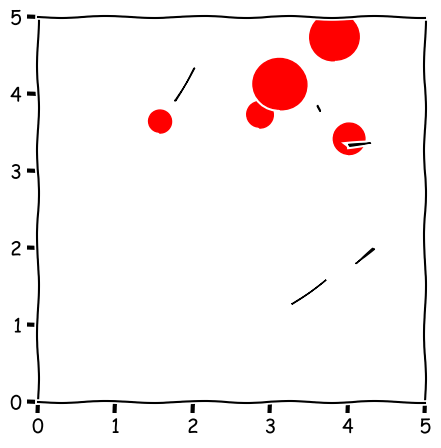

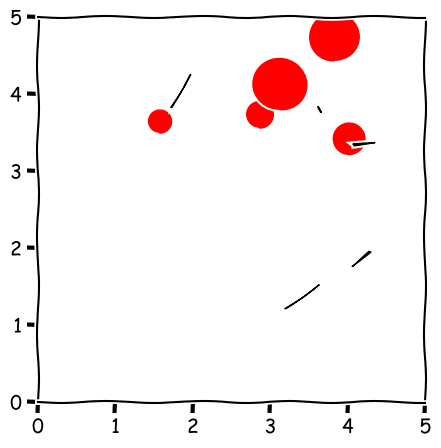

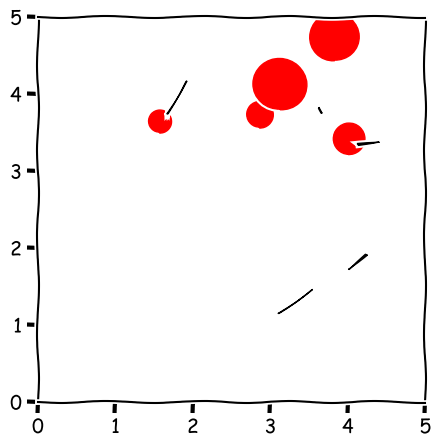

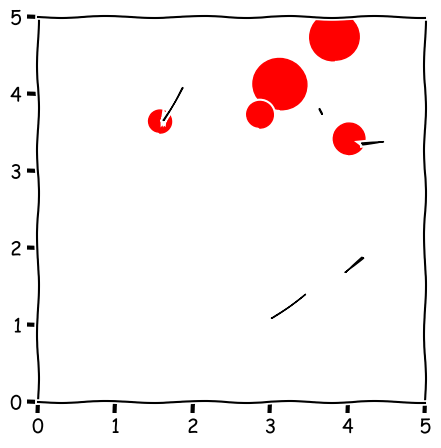

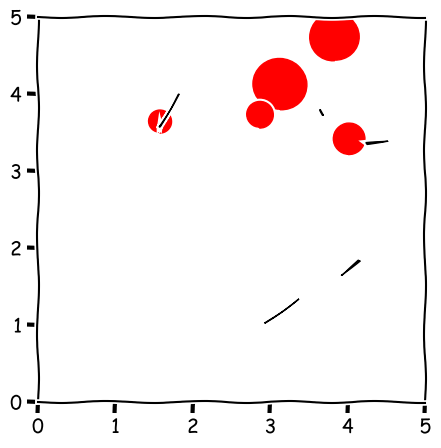

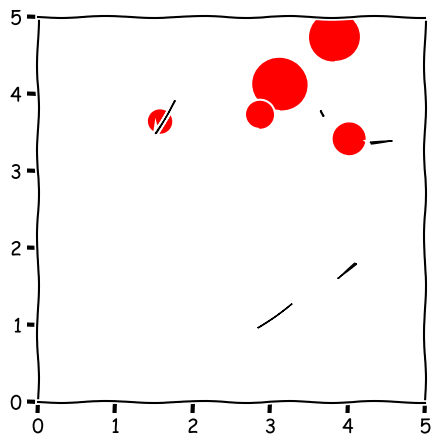

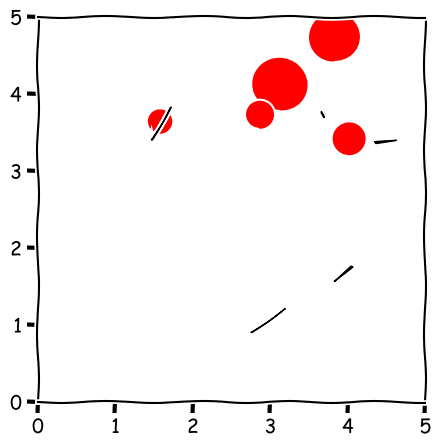

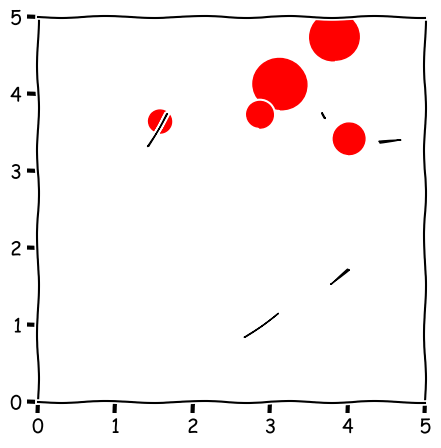

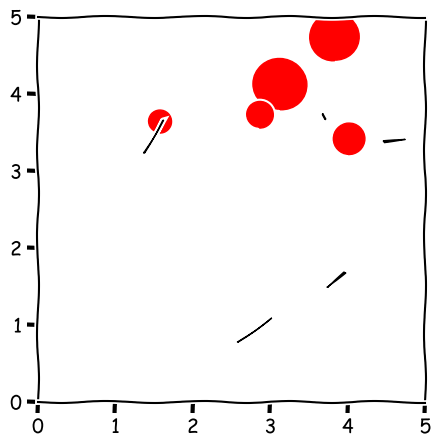

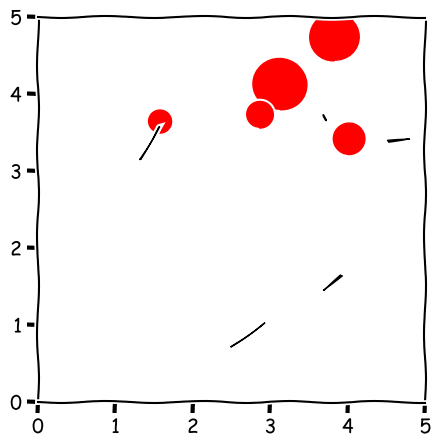

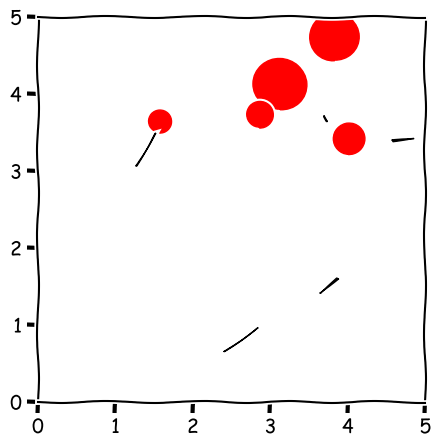

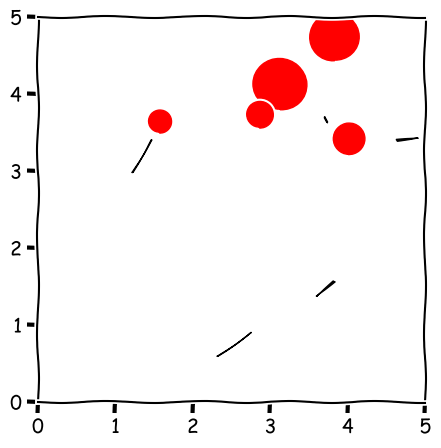

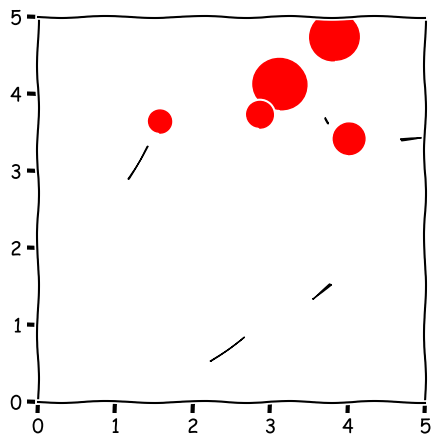

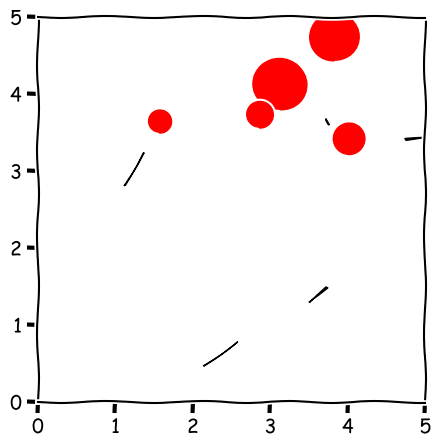

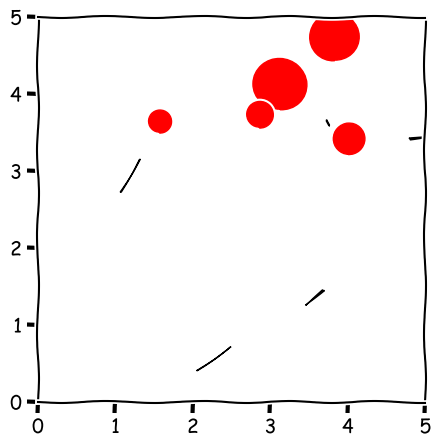

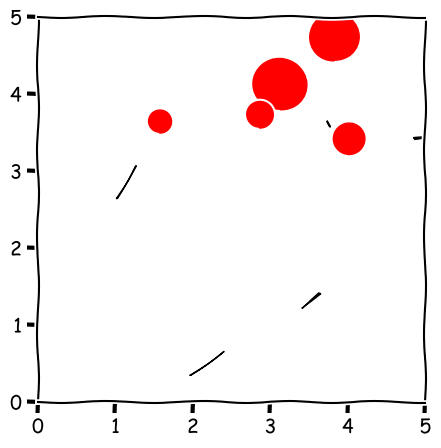

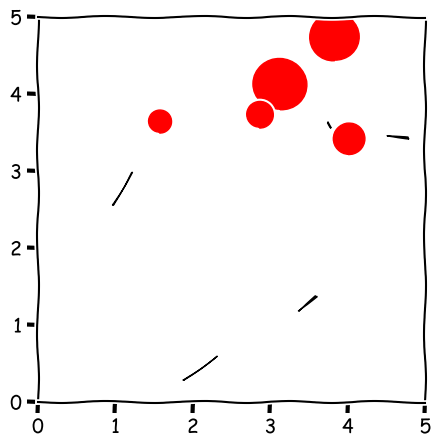

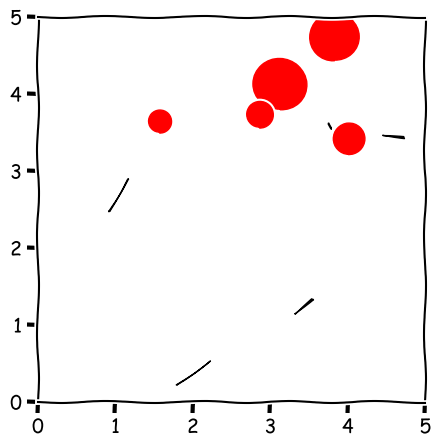

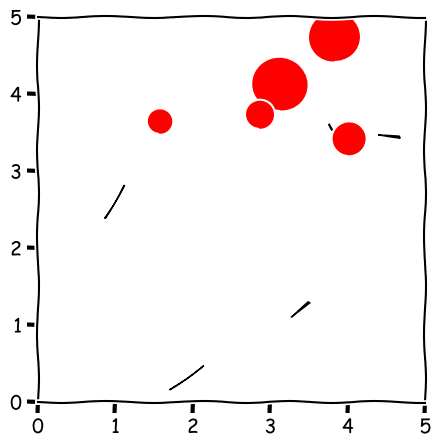

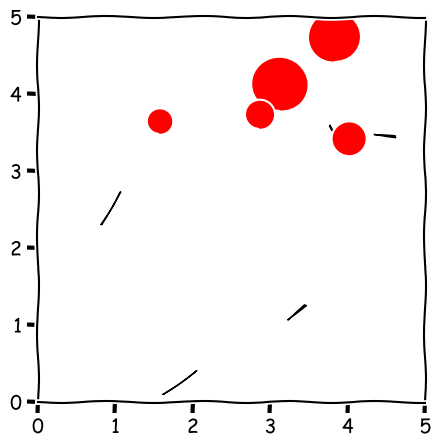

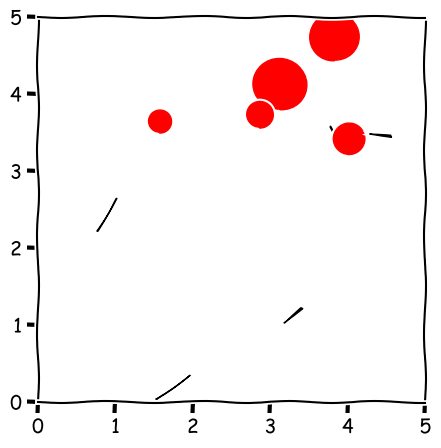

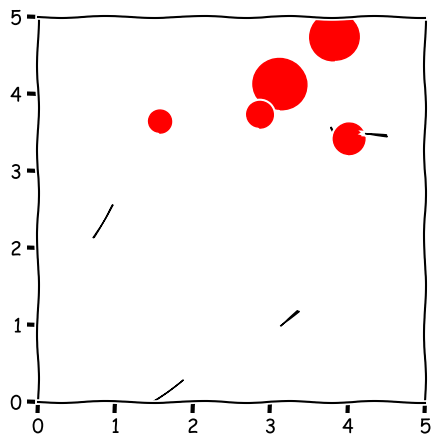

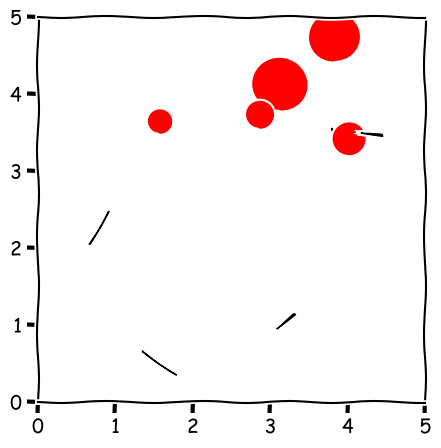

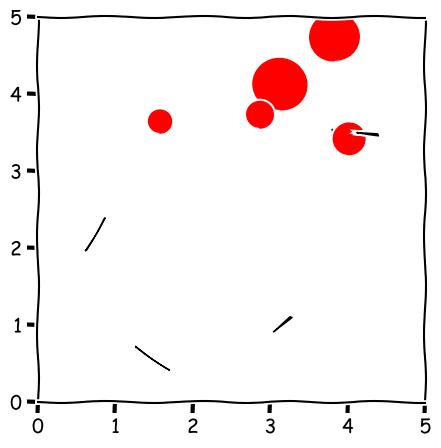

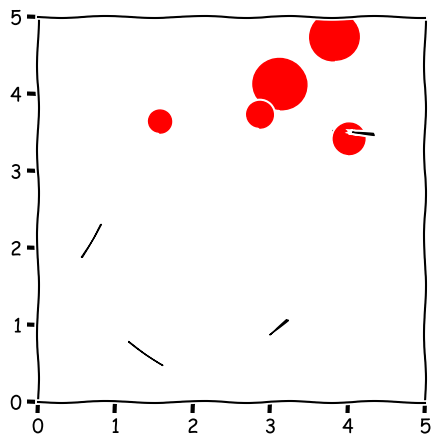

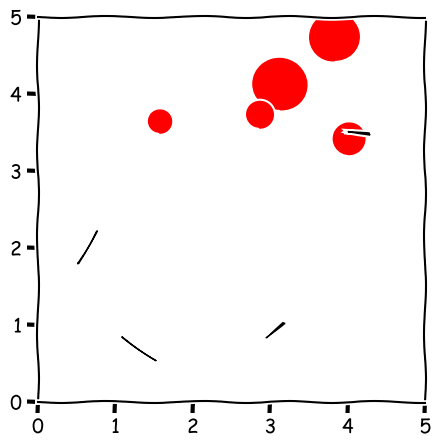

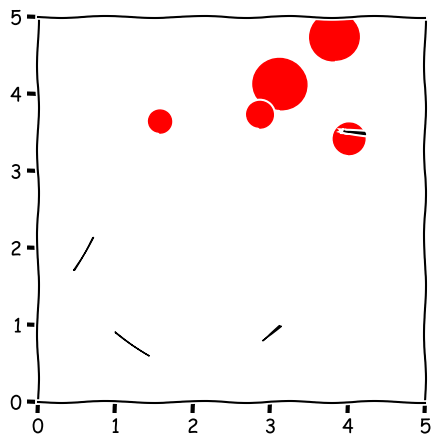

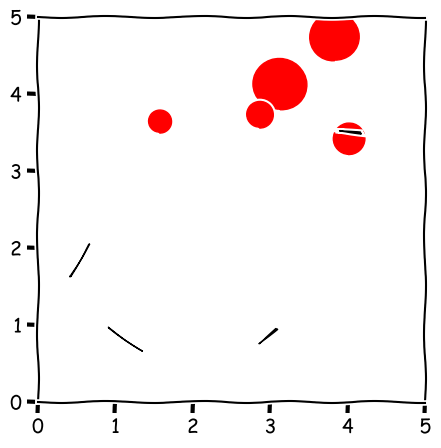

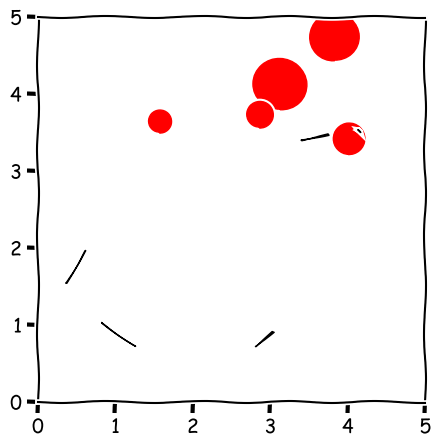

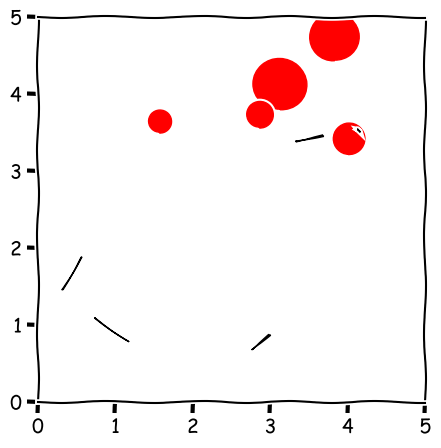

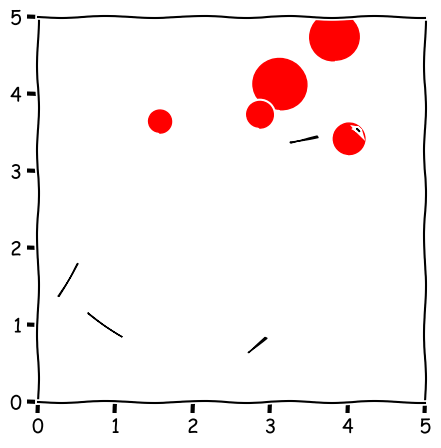

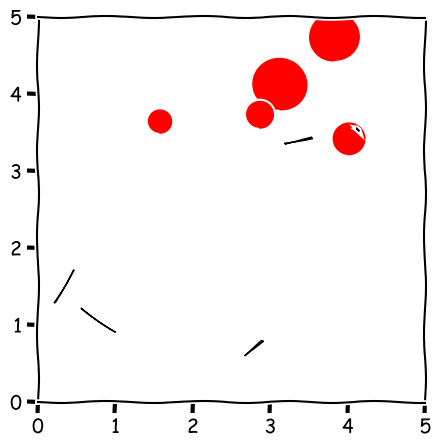

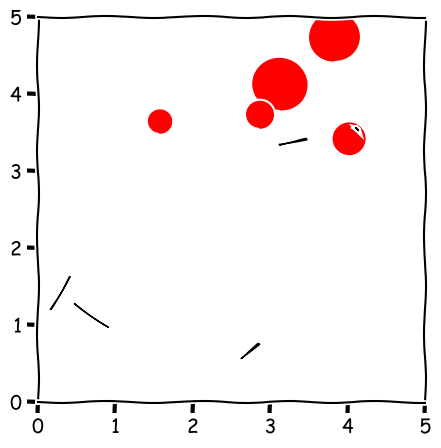

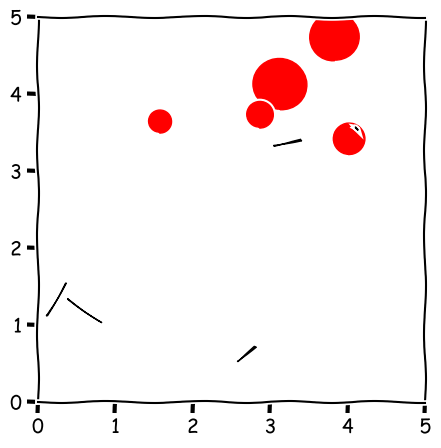

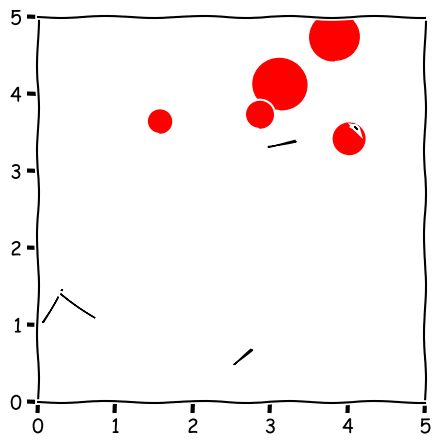

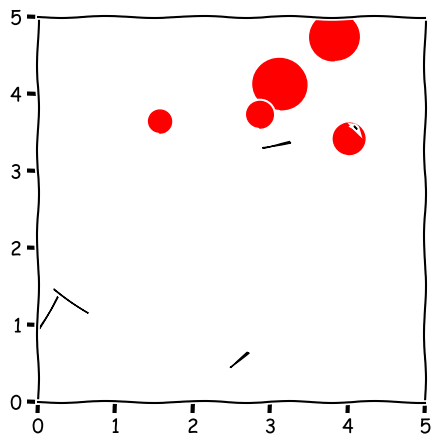

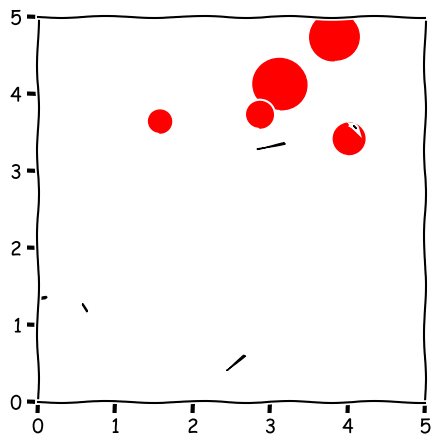

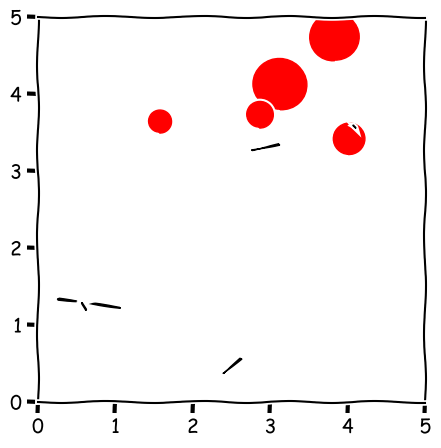

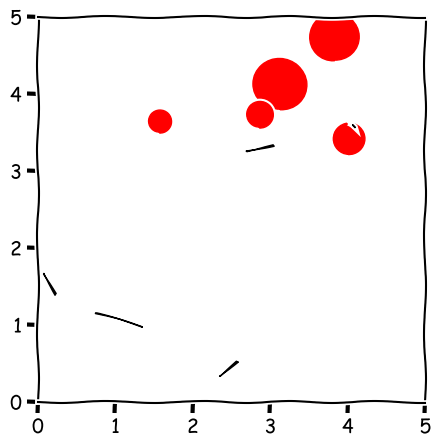

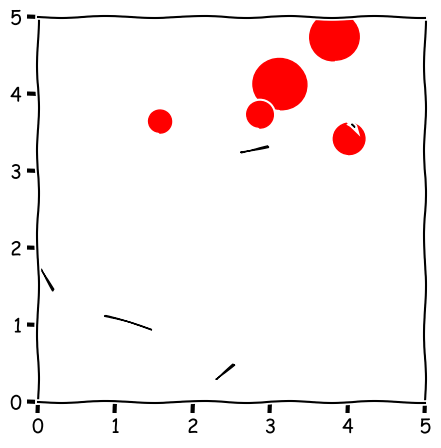

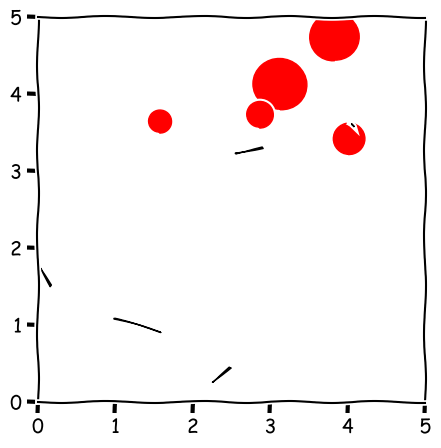

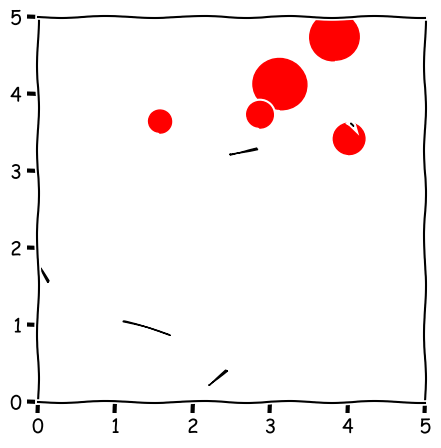

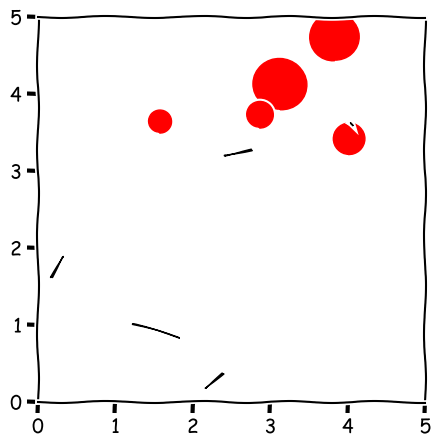

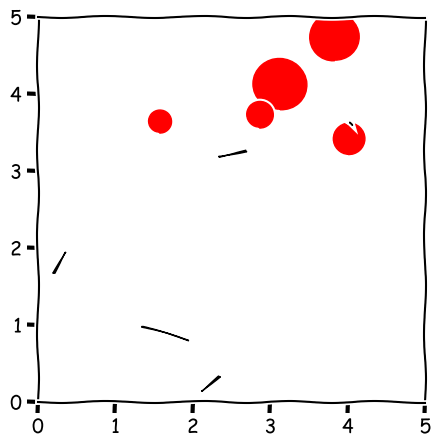

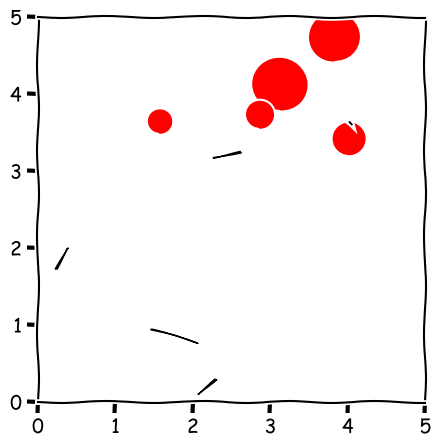

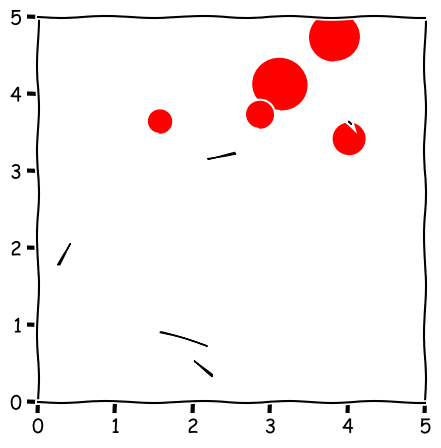

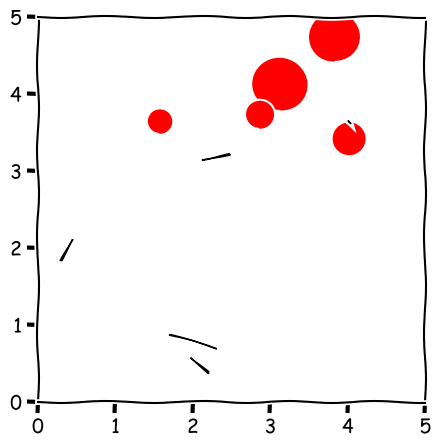

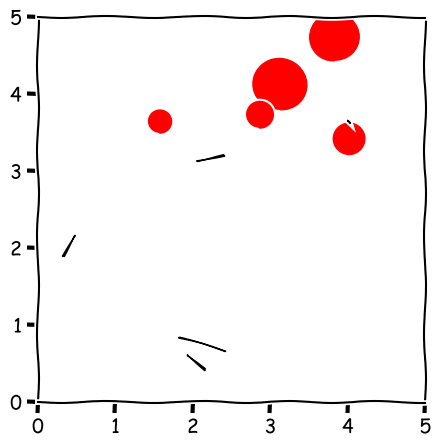

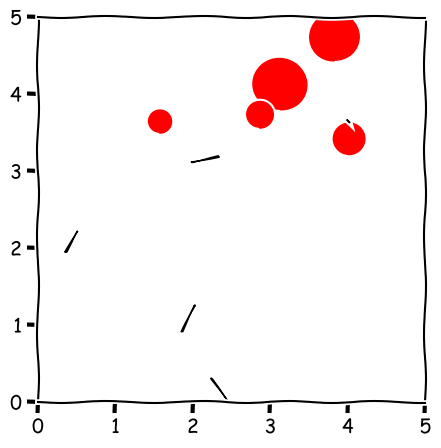

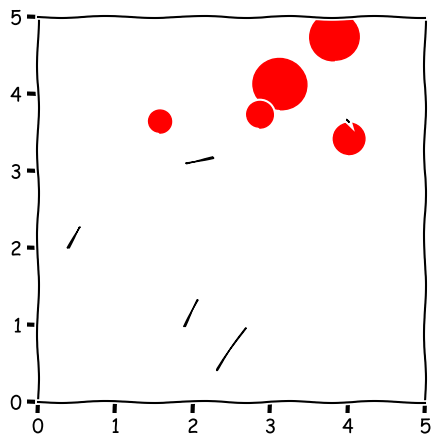

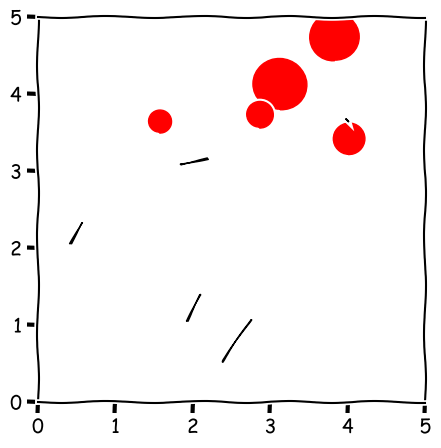

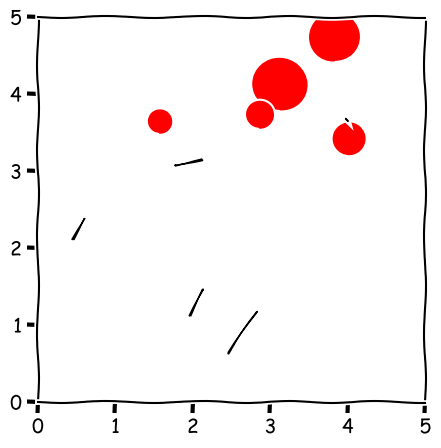

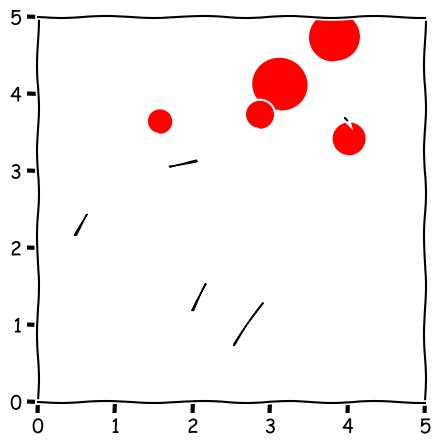

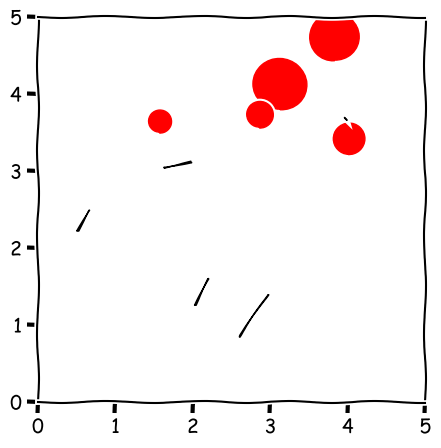

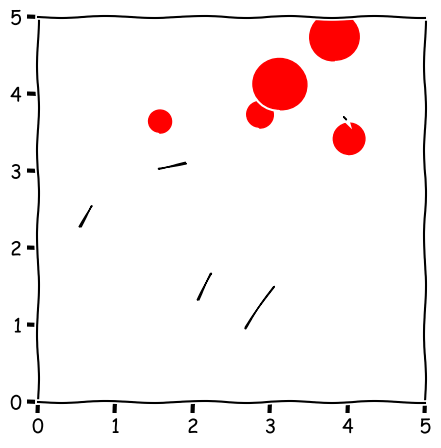

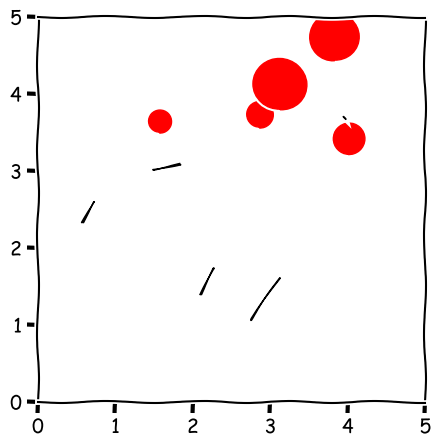

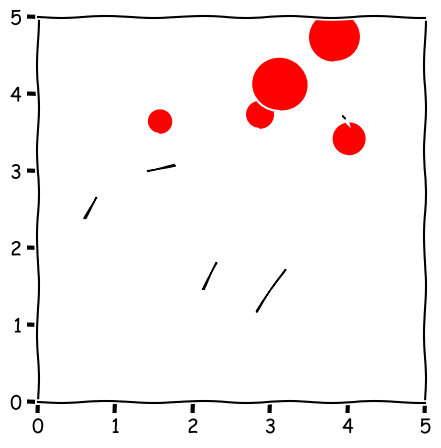

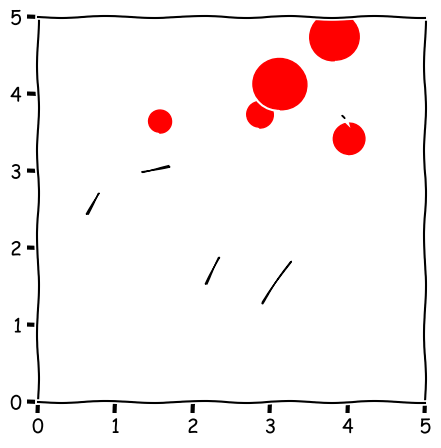

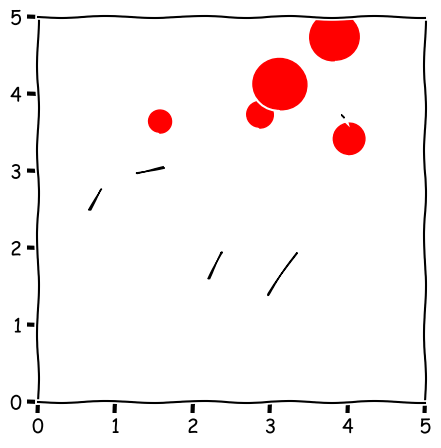

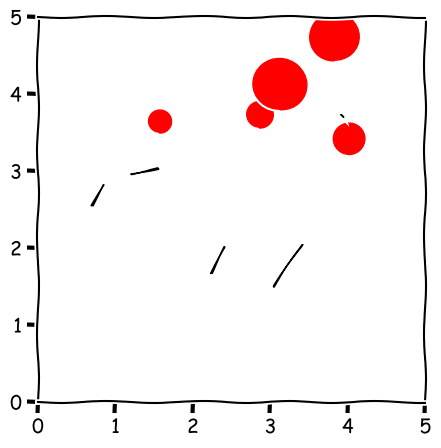

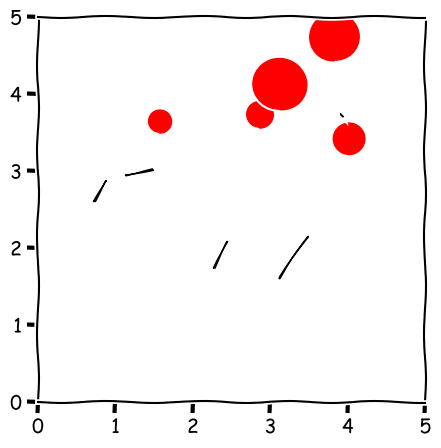

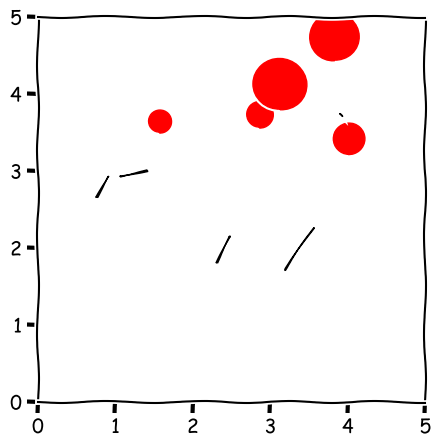

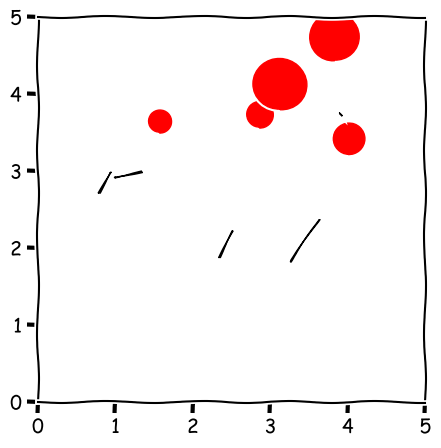

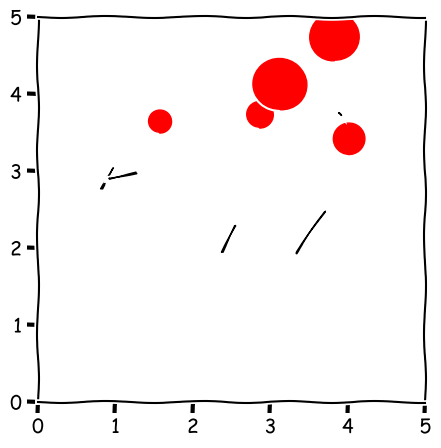

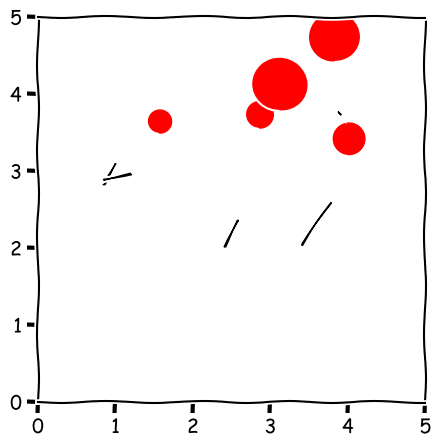

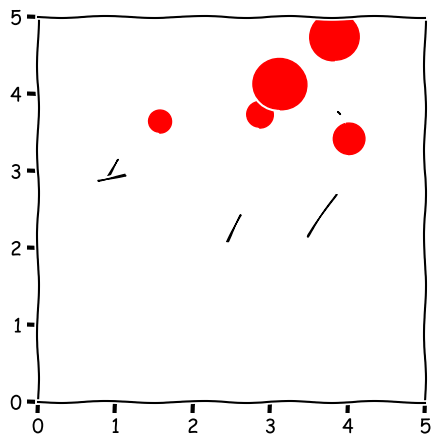

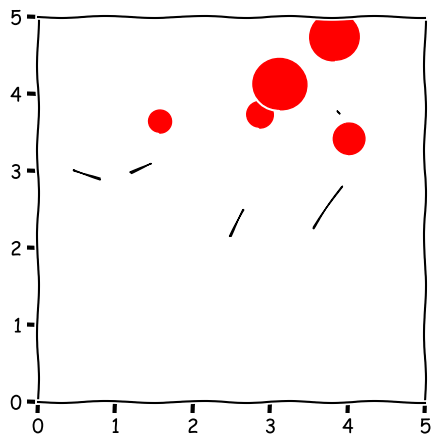

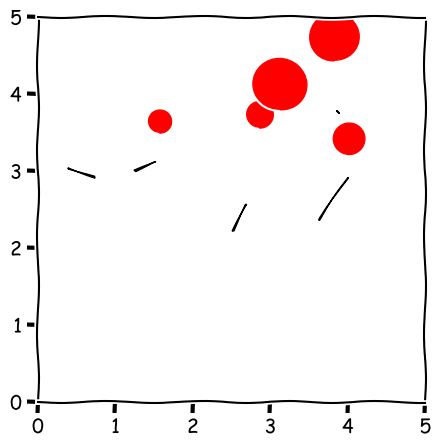

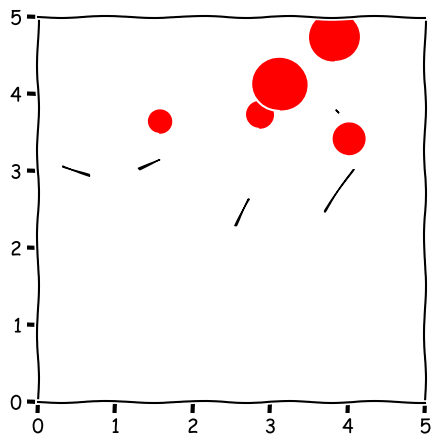

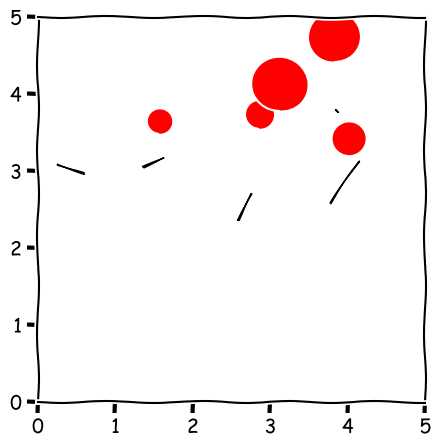

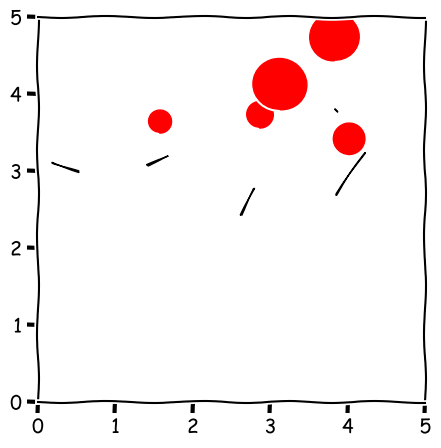

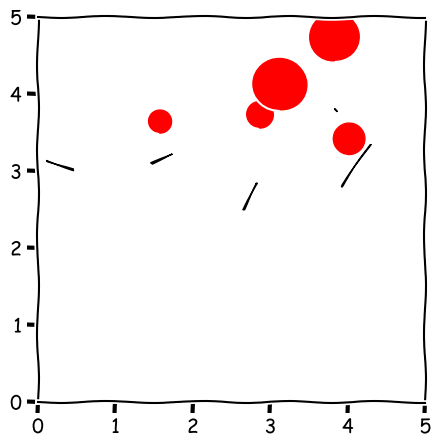

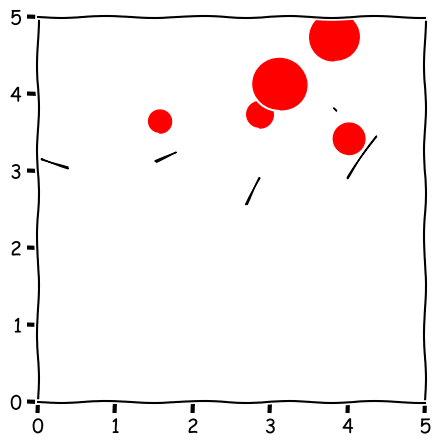

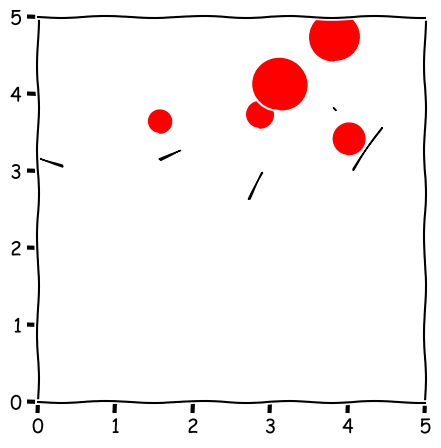

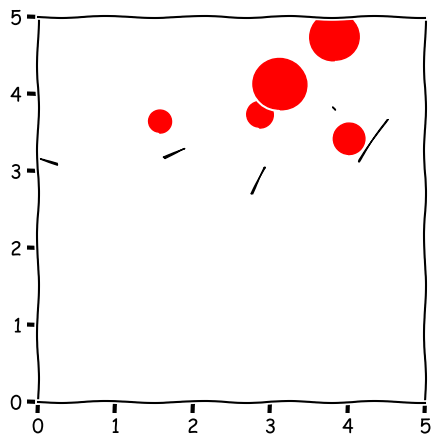

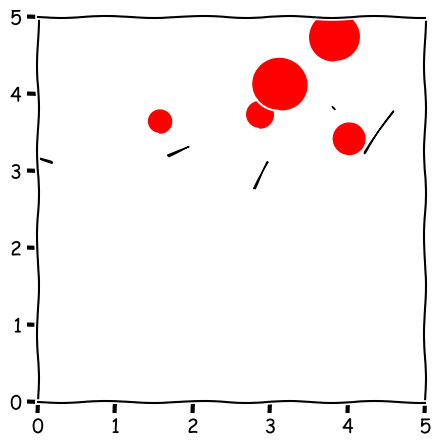

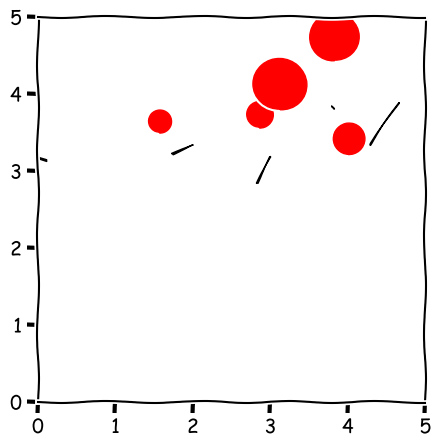

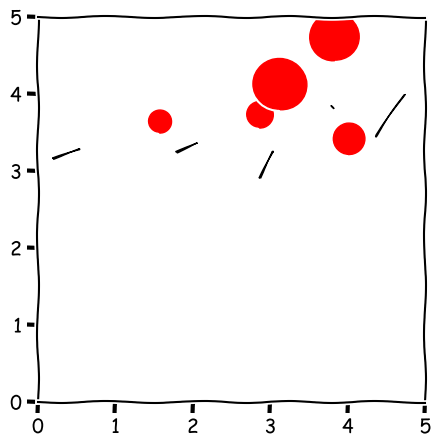

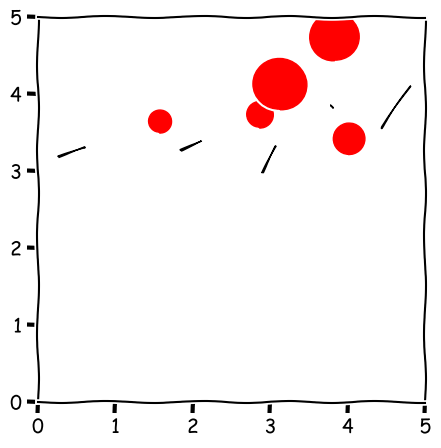

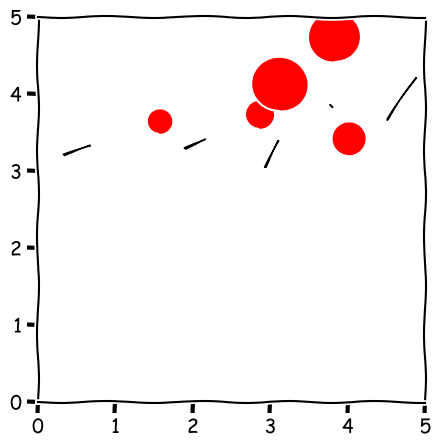

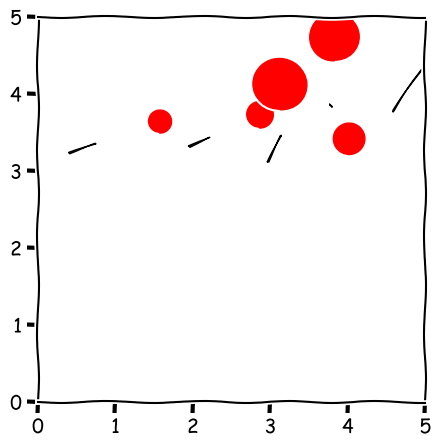

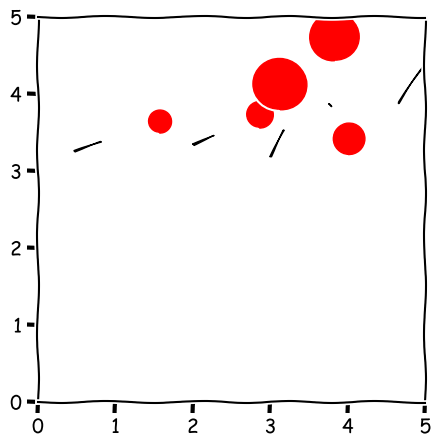

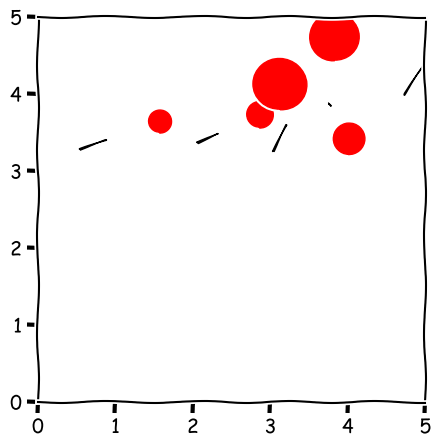

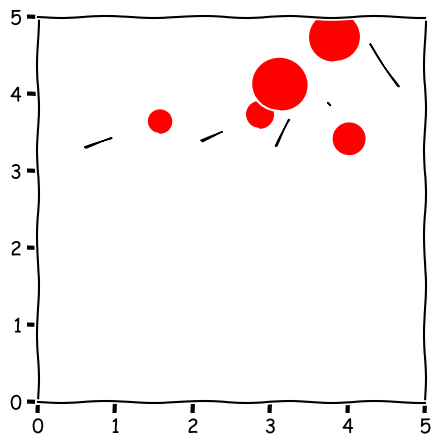

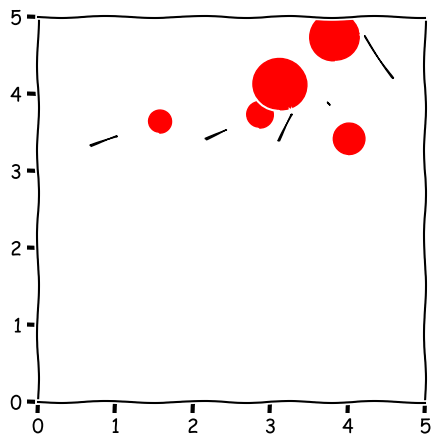

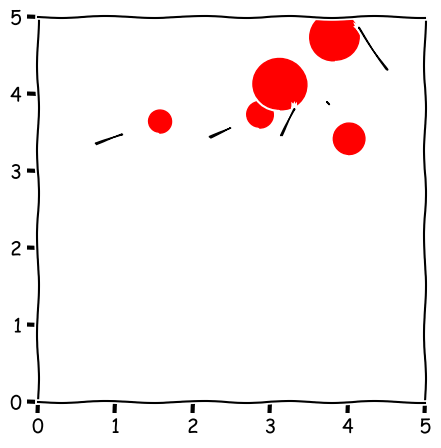

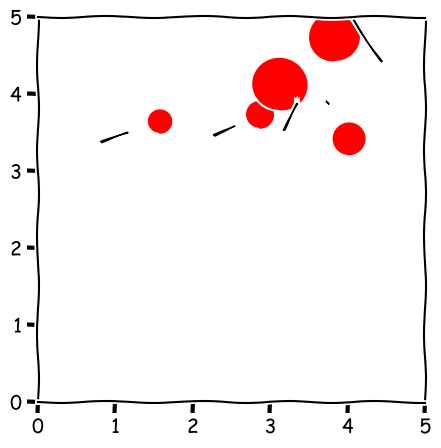

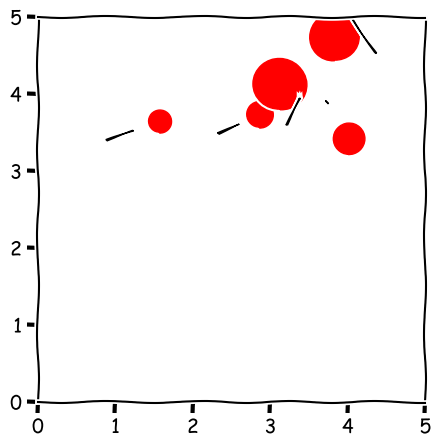

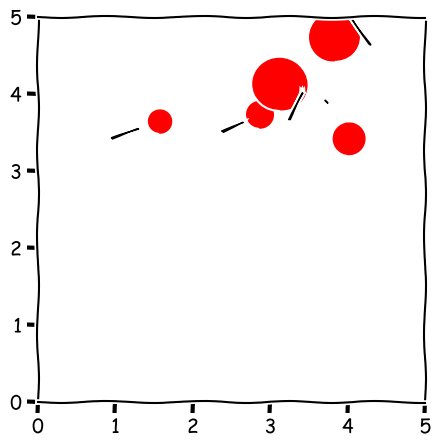

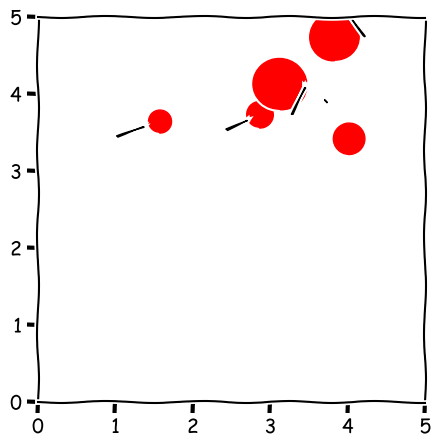

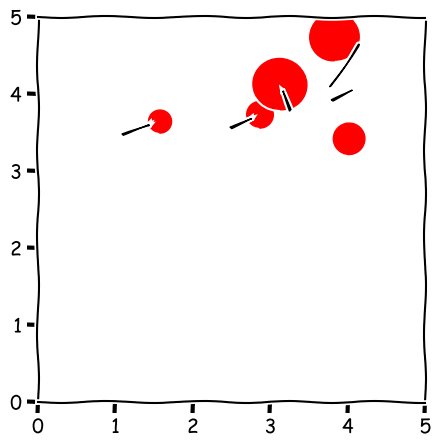

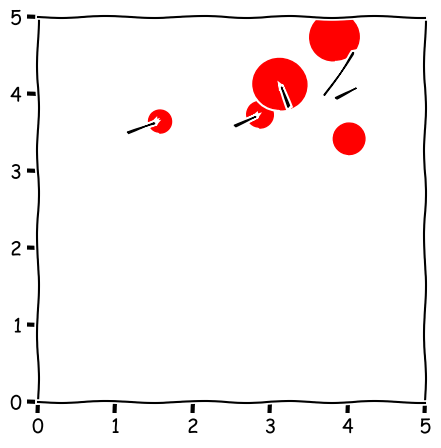

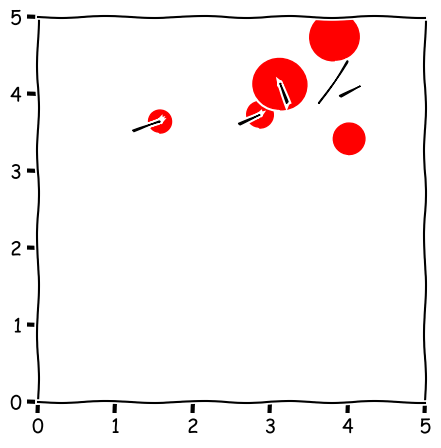

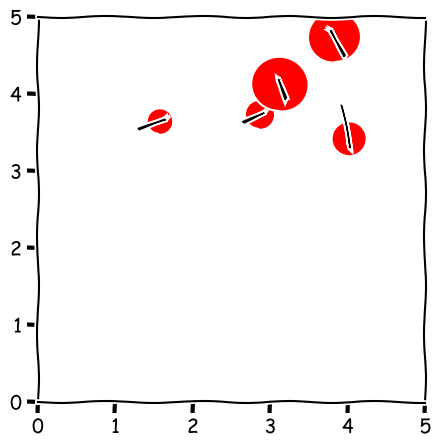

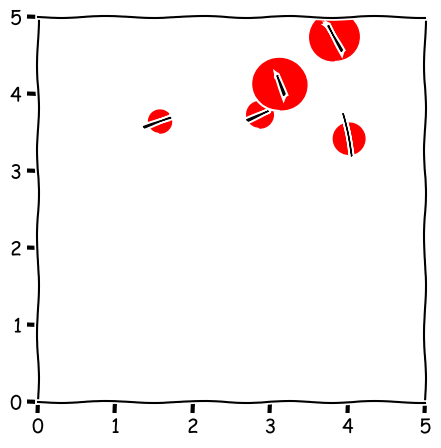

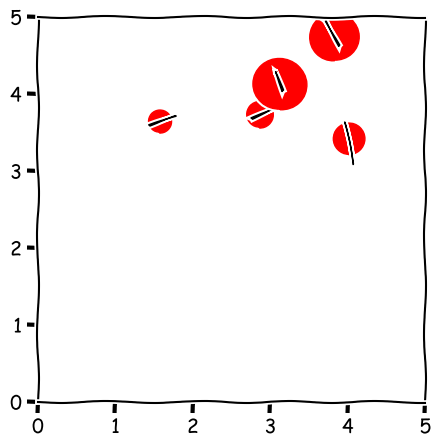

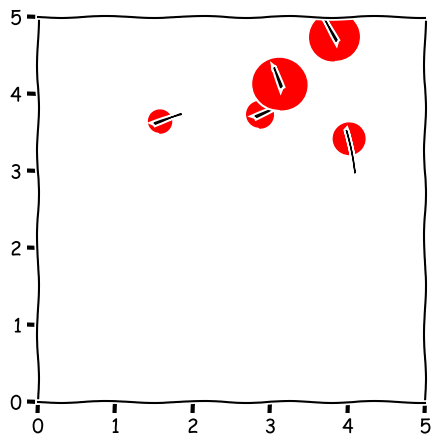

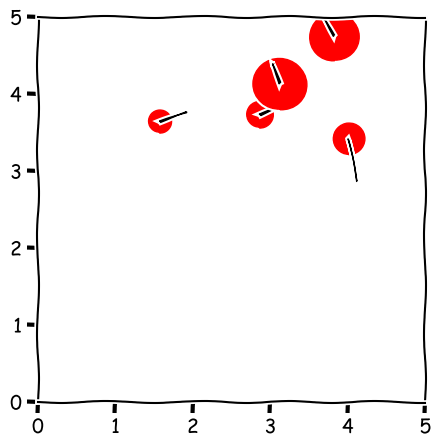

In [22]:
V1 = [0.5,0.5]
V2 = [-0.5,1]
R1 = 0.3
R2 = 0.2
C1 = [2,3]
C2 = [2.6,3]
M1 = 2
M2 = 3
WIDTH = 5
HEIGHT = 5
box = Box(WIDTH, HEIGHT)

def generate_ball():
    return Ball([np.random.uniform(0.4,4.6),np.random.uniform(0.4,4.6)],
                [np.random.uniform(-0.5,0.5),np.random.uniform(-0.5,0.5)], 
                np.random.uniform(1,4),
                np.random.uniform(0.1,0.4))

system = System(box, [generate_ball() for _ in range(5)],delta_t=0.2)
system.generate_gif(steps = 100, file_name="5_ball_system.gif")

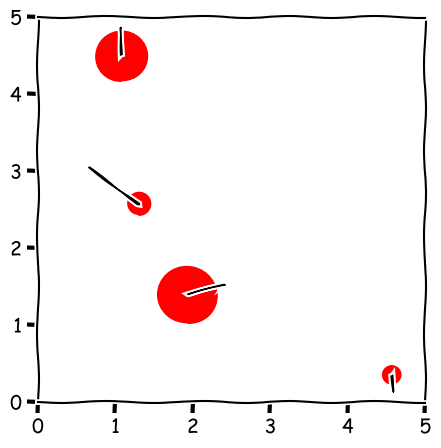

In [21]:
system.render()

### Check system's information

TODO: Can you format it for better reading experience?

In [23]:
system

System(box=Box(height=5, width=5), balls=[Ball(pos=[1.5685539904982406, 3.6374297258327304], vel=[0.34496412260982084, 0.11991301380167155], mass=2.281589658537508, radius=0.1443283255526105), Ball(pos=[2.858302592534696, 3.7259421237294896], vel=[0.2692797418175004, 0.12138477021764782], mass=1.8255504386092816, radius=0.16764944909255586), Ball(pos=[3.124869810801294, 4.134292289086715], vel=[-0.09521553213396272, 0.2527448927051682], mass=3.273700153126261, radius=0.33852327799251614), Ball(pos=[3.822233365839503, 4.753074221314956], vel=[-0.17235516217189573, 0.329026205634935], mass=2.3204188713125182, radius=0.31263498848036586), Ball(pos=[4.002027550611724, 3.417822604096478], vel=[0.10945481813652239, -0.5482437942132663], mass=2.9664665535296617, radius=0.2038519483610053)], acc=None, delta_t=0.2)

In [24]:
system.sweep_prune()

[(1, 2), (3, 4)]

In [25]:
system.update()
system

System(box=Box(height=5, width=5), balls=[Ball(pos=[1.6375468150202048, 3.6614123285930646], vel=[0.34496412260982084, 0.11991301380167155], mass=2.281589658537508, radius=0.1443283255526105), Ball(pos=[2.8996306658177495, 3.7310278212714088], vel=[0.20664036641526654, 0.025428487709594744], mass=1.8255504386092816, radius=0.16764944909255586), Ball(pos=[3.112812765033145, 4.195543105024347], vel=[-0.060285228840743194, 0.3062540796881632], mass=3.273700153126261, radius=0.33852327799251614), Ball(pos=[3.787762333405124, 4.6872689801879694], vel=[-0.17235516217189573, -0.329026205634935], mass=2.3204188713125182, radius=0.31263498848036586), Ball(pos=[4.023918514239028, 3.3081738452538247], vel=[0.10945481813652239, -0.5482437942132663], mass=2.9664665535296617, radius=0.2038519483610053)], acc=None, delta_t=0.2)